## 2.2 경진대회 주최자의 동기

고객을 만족시킬 수 있는 가장 좋은 제품 추천방법을 찾기위해서 머신러닝 알고리즘을 사용한다.

## 2.3 평가 척도

고객이 신규로 구매할 제품이 무엇인지 예측하는 경진대회다.

평가 척도는 MAP@&(Mean Average Precision @7)이다.


1.   예측 정확도의 평균은 정확도의 합을 정답의 개수만큼 나눈 숫자다. 정답의 개수인 4로 정확도의 합을 나눈다.

1.   (1/1+2/4+3/5+4/6)/4 = 0.69
2.   Mean Average Precision은 모든 예측 결과물의 Average Precision의 평균값을 의미한다. @7이 붙는 이유는 최대 7개의 금융상품을 예측 할 수 있다는 의미다.
2.  MAP @7은 예측 순서에 매우 민감한 평가 척도이다.
1.   7개중 첫 4개가 정답이면 (1/1+2/2+3/3+4/4)/4 =1.00
2.   마지막 4개가 정답이면 (1/4+2/5+3/6+4/7)/4 =0.43





In [ ]:
# 코드 2-1 MAP@7 평가 척도를 구하는 코드

import numpy as np

def apk(actual, predicted, k=7, default=0.0):
  # MAP@7 이므로 최대 7개만 사용한다.
  # actual = 손님이 선택한 상품의 갯수
  # predicted = 은행에서 예측한 상품의 갯수
  if len(predicted) > k:
    predicted = predicted[:k]

  score = 0.0
  num_hits = 0.0

  for i, p in enumerate(predicted):
    # 점수를 부여하는 조건은 다음과 같다:
    # 예측 값이 정답이 있고('p in actual')
    # 예측 값이 중복이 아니면('p not in predicted[:i]')3
    if p in actual and p not in predicted[:i]:
      num_hits +=1.0
      score += num_hits/(i+1.0)

  # 정답 값이 공백일 경우, 무조건 0.0을 반환한다
  if not actual:
    return default

  # 정답의 개수(len(actual))로 average precision을 구한다
  return score / min(len(actual),k)

def mapk(actual, predicted, k=7, default=0.0):
  # list of list 인 정답값과 예측값에서 고객별 평균만족도를 구하고 np.mean을 통해 평균계산
  return np.mean([apk(a,p,k,deafault) for a, p in ziq(actual, predicted)])

## 2.4 주요접근

시계열 데이터가 제공된다. 기본적으로 'A라는 시간에 B라는 고객이 C라는 제품을 구매했다.'라는 정보가 담긴 데이터를 의미하는데, 데이터에는 B, C에 대한 다양한 정보가 포함될수 있다. 정보가 많다고  무조건 좋은 데이터는 아니다.

### 데이터 전처리 작업이 필수

데이터 수집 과정에서 생길수 있는 데이터 노이즈가 그대로 반영되어 있기 때문에 결측값, 변수 분포를 따르지 않는 이상치(outlier), 실수로 잘못 입력된 값, 익명화된 변수 등 이러한 데이터를 처리해야한다.

### 피처 엔지니어링 필수

시계열 데이터를 다루는 데 유의미한 파생 변수를 생성하기 위한 몇가지 기술이 있다. 날짜/시간, 주중/주말, 공휴일, 아침/낮/밤, 봄/여름/가을/겨울, 학기/시험기간/방학 등 다양한 파생 변수를 생성할 수있다.

과거 데이터를 활용하는 lag데이터를 파생 변수로 생성할수있다. 한달 두달 전에 고객이 구매한 제품에 대한 데이터를 이번 달에 구매할 제품을 예측하는데 활용된다.

딥러닝 모델보다 트리 기반의 앙상블 모델이 더 좋은 성능을 낸다. XGBoost와 LightGBM를 사용한다.

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"hanw001","key":"5f5bfbf4e7a9a64e412146c486992d55"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
# Permission Warning 이 일어나지 않도록 
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle competitions download -c santander-product-recommendation

 98% 209M/214M [00:02<00:00, 71.7MB/s]
100% 214M/214M [00:02<00:00, 81.1MB/s]
 40% 5.00M/12.4M [00:00<00:00, 19.0MB/s]
100% 12.4M/12.4M [00:00<00:00, 35.6MB/s]
  0% 0.00/2.28M [00:00<?, ?B/s]
100% 2.28M/2.28M [00:00<00:00, 157MB/s]


In [ ]:
path_to_zip_file = '/content/train_ver2.csv.zip'
directory_to_extract_to = '/content/train.csv'

import zipfile
with zipfile.ZipFile(path_to_zip_file, 'r') as zip_ref:
     zip_ref.extractall(directory_to_extract_to)

In [ ]:
path_to_zip_file = '/content/test_ver2.csv.zip'
directory_to_extract_to = '/content/test.csv'

import zipfile
with zipfile.ZipFile(path_to_zip_file, 'r') as zip_ref:
    zip_ref.extractall(directory_to_extract_to)

In [ ]:
path_to_zip_file = '/content/sample_submission.csv.zip'
directory_to_extract_to = '/content/sample_submission.csv'

import zipfile
with zipfile.ZipFile(path_to_zip_file, 'r') as zip_ref:
    zip_ref.extractall(directory_to_extract_to)

## 2.6 탐색적 데이터 분석

In [ ]:
import pandas as pd
import numpy as np

trn = pd.read_csv('/content/train.csv/train_ver2.csv')

# 데이터 크기를 줄인다
cate_cols = [col for col in trn.columns[:49] if trn[col].dtype in ['int64','float64']]
for col in cate_cols:
    if trn[col].dtype == 'int64':
        trn[col] = trn[col].astype(np.int8)
    else:
        trn[col] = trn[col].astype(np.float32)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (5,8,11,15) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
#코드 2-2 데이터의크기 확인하는 .shape

trn.shape

(13647309, 48)

In [ ]:
trn.head()

,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,indrel,ult_fec_cli_1t,indrel_1mes,tiprel_1mes,indresi,indext,conyuemp,canal_entrada,indfall,tipodom,cod_prov,nomprov,ind_actividad_cliente,renta,segmento,ind_ahor_fin_ult1,ind_aval_fin_ult1,ind_cco_fin_ult1,ind_cder_fin_ult1,ind_cno_fin_ult1,ind_ctju_fin_ult1,ind_ctma_fin_ult1,ind_ctop_fin_ult1,ind_ctpp_fin_ult1,ind_deco_fin_ult1,ind_deme_fin_ult1,ind_dela_fin_ult1,ind_ecue_fin_ult1,ind_fond_fin_ult1,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
0,2015-01-28,98,N,ES,H,35,2015-01-12,0.0,6,1.0,NaN,1,A,S,N,NaN,KHL,N,1.0,29.0,MALAGA,1.0,87218.101562,02 - PARTICULARES,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
1,2015-01-28,-13,N,ES,V,23,2012-08-10,0.0,35,1.0,NaN,1,I,S,S,NaN,KHE,N,1.0,13.0,CIUDAD REAL,0.0,35548.738281,03 - UNIVERSITARIO,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
2,2015-01-28,-12,N,ES,V,23,2012-08-10,0.0,35,1.0,NaN,1,I,S,N,NaN,KHE,N,1.0,13.0,CIUDAD REAL,0.0,122179.109375,03 - UNIVERSITARIO,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
3,2015-01-28,-11,N,ES,H,22,2012-08-10,0.0,35,1.0,NaN,1,I,S,N,NaN,KHD,N,1.0,50.0,ZARAGOZA,0.0,119775.539062,03 - UNIVERSITARIO,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
4,2015-01-28,-10,N,ES,V,23,2012-08-10,0.0,35,1.0,NaN,1,A,S,N,NaN,KHE,N,1.0,50.0,ZARAGOZA,1.0,NaN,03 - UNIVERSITARIO,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0


In [ ]:
for col in trn.columns:
  print('{}\n'.format(trn[col].head()))

0    2015-01-28
1    2015-01-28
2    2015-01-28
3    2015-01-28
4    2015-01-28
Name: fecha_dato, dtype: object

0    98
1   -13
2   -12
3   -11
4   -10
Name: ncodpers, dtype: int8

0    N
1    N
2    N
3    N
4    N
Name: ind_empleado, dtype: object

0    ES
1    ES
2    ES
3    ES
4    ES
Name: pais_residencia, dtype: object

0    H
1    V
2    V
3    H
4    V
Name: sexo, dtype: object

0     35
1     23
2     23
3     22
4     23
Name: age, dtype: object

0    2015-01-12
1    2012-08-10
2    2012-08-10
3    2012-08-10
4    2012-08-10
Name: fecha_alta, dtype: object

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: ind_nuevo, dtype: float32

0          6
1         35
2         35
3         35
4         35
Name: antiguedad, dtype: object

0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: indrel, dtype: float32

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
Name: ult_fec_cli_1t, dtype: object

0    1
1    1
2    1
3    1
4    1
Name: indrel_1mes, dtype: object

0    A
1    I
2    I
3

훈련 데이터에 날짜변수, 수치형 변수, 범주형 문자열 변수, 결측값 등 다양한 유형의 변수가 존재한다.

In [ ]:
# 2-4 for loop로 모든 변수의 첫 5줄 미리보기

for col in trn.columns:
  print('{}\n'.format(trn[col].head()))

0    2015-01-28
1    2015-01-28
2    2015-01-28
3    2015-01-28
4    2015-01-28
Name: fecha_dato, dtype: object

0    98
1   -13
2   -12
3   -11
4   -10
Name: ncodpers, dtype: int8

0    N
1    N
2    N
3    N
4    N
Name: ind_empleado, dtype: object

0    ES
1    ES
2    ES
3    ES
4    ES
Name: pais_residencia, dtype: object

0    H
1    V
2    V
3    H
4    V
Name: sexo, dtype: object

0     35
1     23
2     23
3     22
4     23
Name: age, dtype: object

0    2015-01-12
1    2012-08-10
2    2012-08-10
3    2012-08-10
4    2012-08-10
Name: fecha_alta, dtype: object

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: ind_nuevo, dtype: float32

0          6
1         35
2         35
3         35
4         35
Name: antiguedad, dtype: object

0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: indrel, dtype: float32

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
Name: ult_fec_cli_1t, dtype: object

0    1
1    1
2    1
3    1
4    1
Name: indrel_1mes, dtype: object

0    A
1    I
2    I
3



*   fecha_dato: 날짜 기록, 변수는 object

*   age: object라서 전처리 과정에서 정수값으로 변환이 필요하다.
*   renta: 가구 총수입, 소수값을 가진다, Nan값을 가진다, 결측값을 전처리과정에서 변환 해야한다.




In [ ]:
# 2-5 훈련데이터를 자세하게 분석

trn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13647309 entries, 0 to 13647308
Data columns (total 48 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   fecha_dato             object 
 1   ncodpers               int8   
 2   ind_empleado           object 
 3   pais_residencia        object 
 4   sexo                   object 
 5   age                    object 
 6   fecha_alta             object 
 7   ind_nuevo              float32
 8   antiguedad             object 
 9   indrel                 float32
 10  ult_fec_cli_1t         object 
 11  indrel_1mes            object 
 12  tiprel_1mes            object 
 13  indresi                object 
 14  indext                 object 
 15  conyuemp               object 
 16  canal_entrada          object 
 17  indfall                object 
 18  tipodom                float32
 19  cod_prov               float32
 20  nomprov                object 
 21  ind_actividad_cliente  float32
 22  renta           

### 데이터 크기

훈련 데이터에는 13만개의 고객 데이터가 있으며 고객마다 48개의 변수가 존재한다.

### 변수

총 24개의 고객 관련변수 (1\~24), 24개의 금융 제품 변수(25~48)로 구성되어있다.

### 데이터 타입

object(주로 string값이 포함된 변수),int64(64비트 정수), float64(64비트 소수)

머신러닝 모델 학습을 위해서는 데이터 타입이 모두 int 혹은 float 이 되어야 한다.

### 메모리

pandas를 통해 읽어오면 4.9g까지 가능하다.

### 수치형/범주형 변수

첫 24개 고격 변수중 [int,float]데이터 타입을 갖는 수치형변수를 num_cols로 추출한다.

In [ ]:
#2-6 .describe()를 통해 수치형 변수 살펴보기

num_cols = [col for col in trn.columns[:24] if trn[col].dtype in ['int8', 'float32']]
trn[num_cols].describe()

,ncodpers,ind_nuevo,indrel,tipodom,cod_prov,ind_actividad_cliente,renta
count,1.364731e+07,1.361958e+07,1.361958e+07,13619574.0,1.355372e+07,1.361958e+07,1.085293e+07
mean,-5.369637e-01,5.956184e-02,1.178399e+00,1.0,2.671408e+01,4.578106e-01,1.349816e+05
std,7.394781e+01,2.315397e-01,4.173512e+00,0.0,1.276545e+01,5.012422e-01,2.261467e+05
min,-1.280000e+02,0.000000e+00,1.000000e+00,1.0,1.000000e+00,0.000000e+00,1.202730e+03
25%,-6.500000e+01,0.000000e+00,1.000000e+00,1.0,1.500000e+01,0.000000e+00,6.871098e+04
50%,-1.000000e+00,0.000000e+00,1.000000e+00,1.0,2.800000e+01,0.000000e+00,1.018500e+05
75%,6.400000e+01,0.000000e+00,1.000000e+00,1.0,3.500000e+01,1.000000e+00,1.559560e+05
max,1.270000e+02,1.000000e+00,9.900000e+01,1.0,5.200000e+01,1.000000e+00,2.889440e+07


In [ ]:
#2-7 .describe()를 통해 범주형 변수 살펴보기

cat_cols = [col for col in trn.columns[:24] if trn[col].dtype in ['object']]
trn[cat_cols].describe()

,fecha_dato,ind_empleado,pais_residencia,sexo,age,fecha_alta,antiguedad,ult_fec_cli_1t,indrel_1mes,tiprel_1mes,indresi,indext,conyuemp,canal_entrada,indfall,nomprov,segmento
count,13647309,13619575,13619575,13619505,13647309,13619575,13647309,24793,13497528.0,13497528,13619575,13619575,1808,13461183,13619575,13553718,13457941
unique,17,5,118,2,235,6756,507,223,13.0,5,2,2,2,162,2,52,3
top,2016-05-28,N,ES,V,23,2014-07-28,0,2015-12-24,1.0,I,S,N,N,KHE,N,MADRID,02 - PARTICULARES
freq,931453,13610977,13553710,7424252,542682,57389,134335,763,7277607.0,7304875,13553711,12974839,1791,4055270,13584813,4409600,7960220




*   count: 해당 변수의 유효한 데이터 개수를 의미한다.
*   unique: 해당 범주형 변수의 고유값 개수를 의미한다.


*   top: 가장 빈도가 높은 데이터가 표시된다.
*   freq: top에서 표시된 최빈 데이터의 빈도수를 의미한다.





'age'변수가 수치형이 아닌 범주형으로 분류되어있다. 그외 누적 거래 기간을 나타내는 'antiguedad'도 수치형으로 분류되어야 한다.

In [ ]:
# 2-8 범주형 변수의 고유값을 직접 출력해보기

for col in cat_cols:
  uniq = np.unique(trn[col].astype(str))
  print('-'*50)
  print('# col {}, n_uniq {}, uniq {}'.format(col, len(uniq), uniq))

--------------------------------------------------
# col fecha_dato, n_uniq 17, uniq ['2015-01-28' '2015-02-28' '2015-03-28' '2015-04-28' '2015-05-28'
 '2015-06-28' '2015-07-28' '2015-08-28' '2015-09-28' '2015-10-28'
 '2015-11-28' '2015-12-28' '2016-01-28' '2016-02-28' '2016-03-28'
 '2016-04-28' '2016-05-28']
--------------------------------------------------
# col ind_empleado, n_uniq 6, uniq ['A' 'B' 'F' 'N' 'S' 'nan']
--------------------------------------------------
# col pais_residencia, n_uniq 119, uniq ['AD' 'AE' 'AL' 'AO' 'AR' 'AT' 'AU' 'BA' 'BE' 'BG' 'BM' 'BO' 'BR' 'BY'
 'BZ' 'CA' 'CD' 'CF' 'CG' 'CH' 'CI' 'CL' 'CM' 'CN' 'CO' 'CR' 'CU' 'CZ'
 'DE' 'DJ' 'DK' 'DO' 'DZ' 'EC' 'EE' 'EG' 'ES' 'ET' 'FI' 'FR' 'GA' 'GB'
 'GE' 'GH' 'GI' 'GM' 'GN' 'GQ' 'GR' 'GT' 'GW' 'HK' 'HN' 'HR' 'HU' 'IE'
 'IL' 'IN' 'IS' 'IT' 'JM' 'JP' 'KE' 'KH' 'KR' 'KW' 'KZ' 'LB' 'LT' 'LU'
 'LV' 'LY' 'MA' 'MD' 'MK' 'ML' 'MM' 'MR' 'MT' 'MX' 'MZ' 'NG' 'NI' 'NL'
 'NO' 'NZ' 'OM' 'PA' 'PE' 'PH' 'PK' 'PL' 'PR' 'PT' 'PY' 'Q

### 시각화로 데이터 살펴보기

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
# %matplotlib inline 
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


--------------------------------------------------
col :  fecha_dato


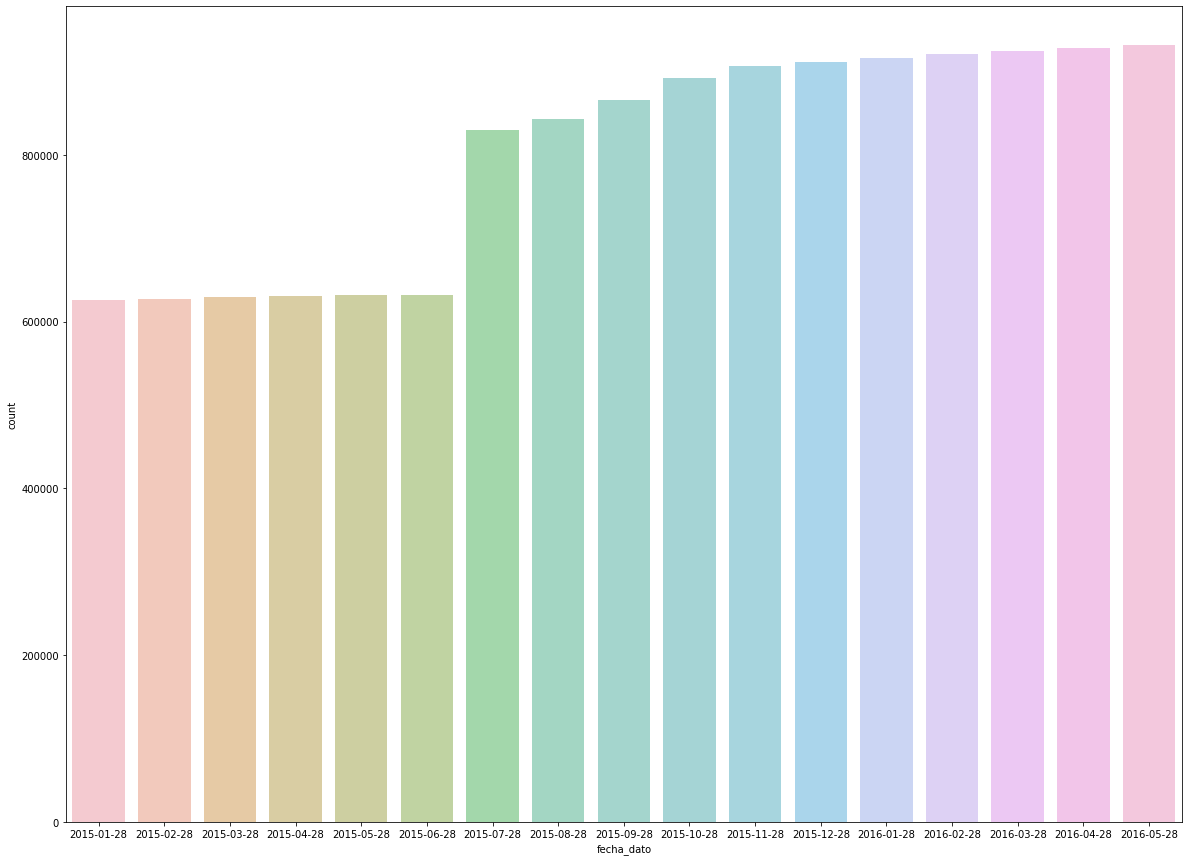

--------------------------------------------------
col :  ind_empleado


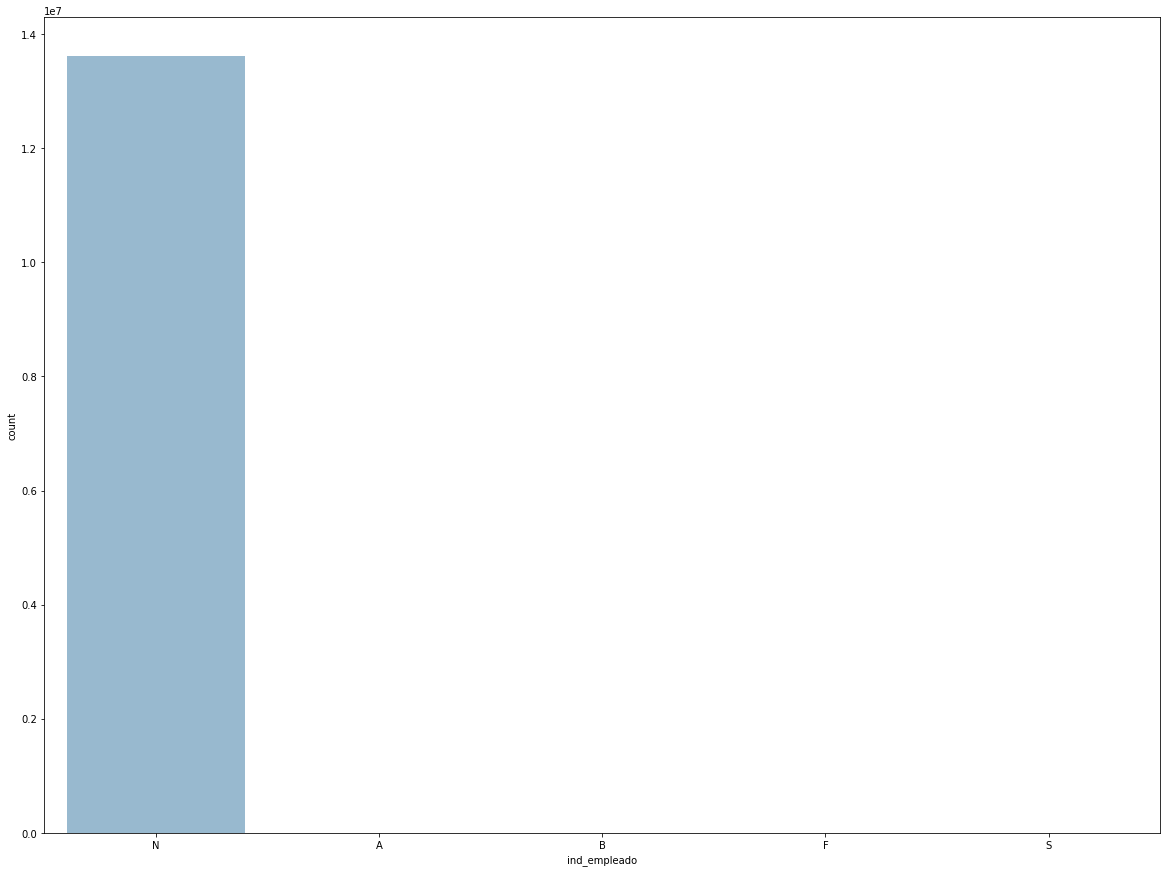

--------------------------------------------------
col :  pais_residencia


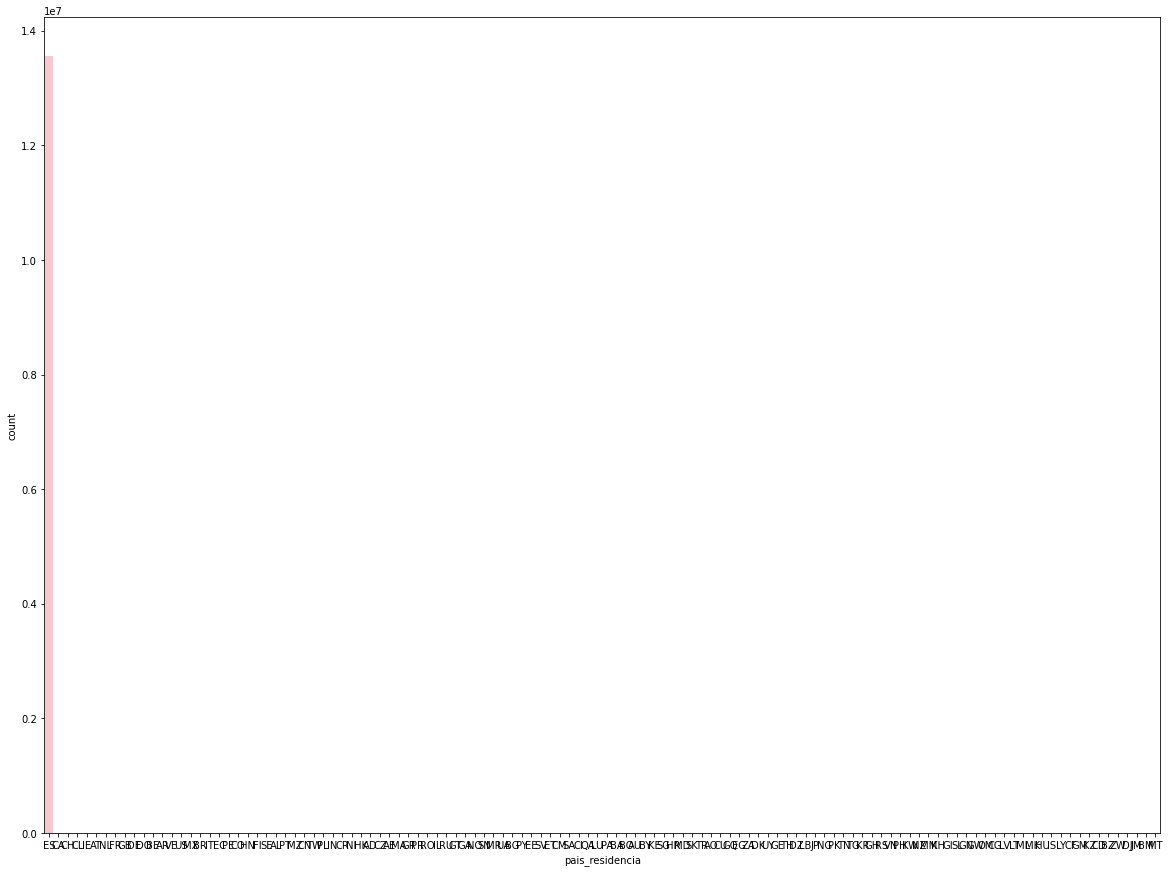

--------------------------------------------------
col :  sexo


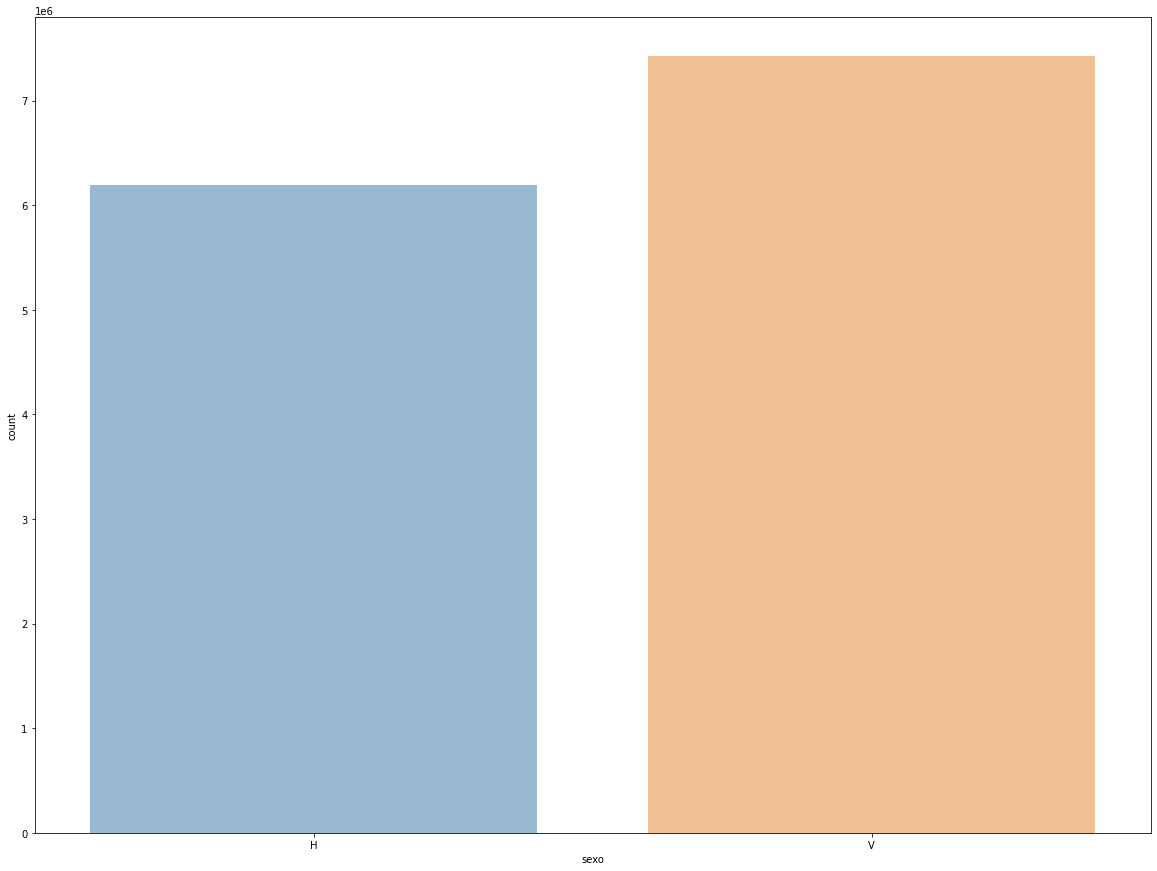

--------------------------------------------------
col :  age


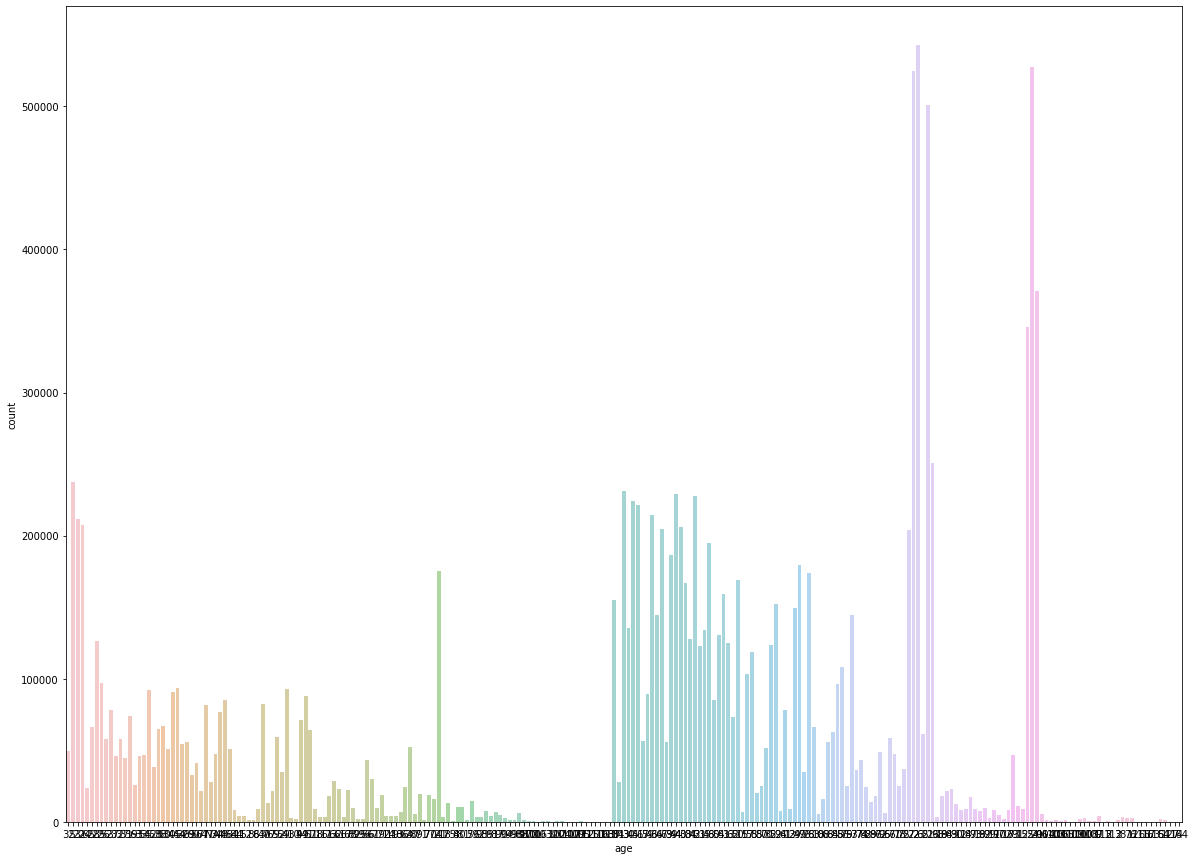

--------------------------------------------------
col :  fecha_alta


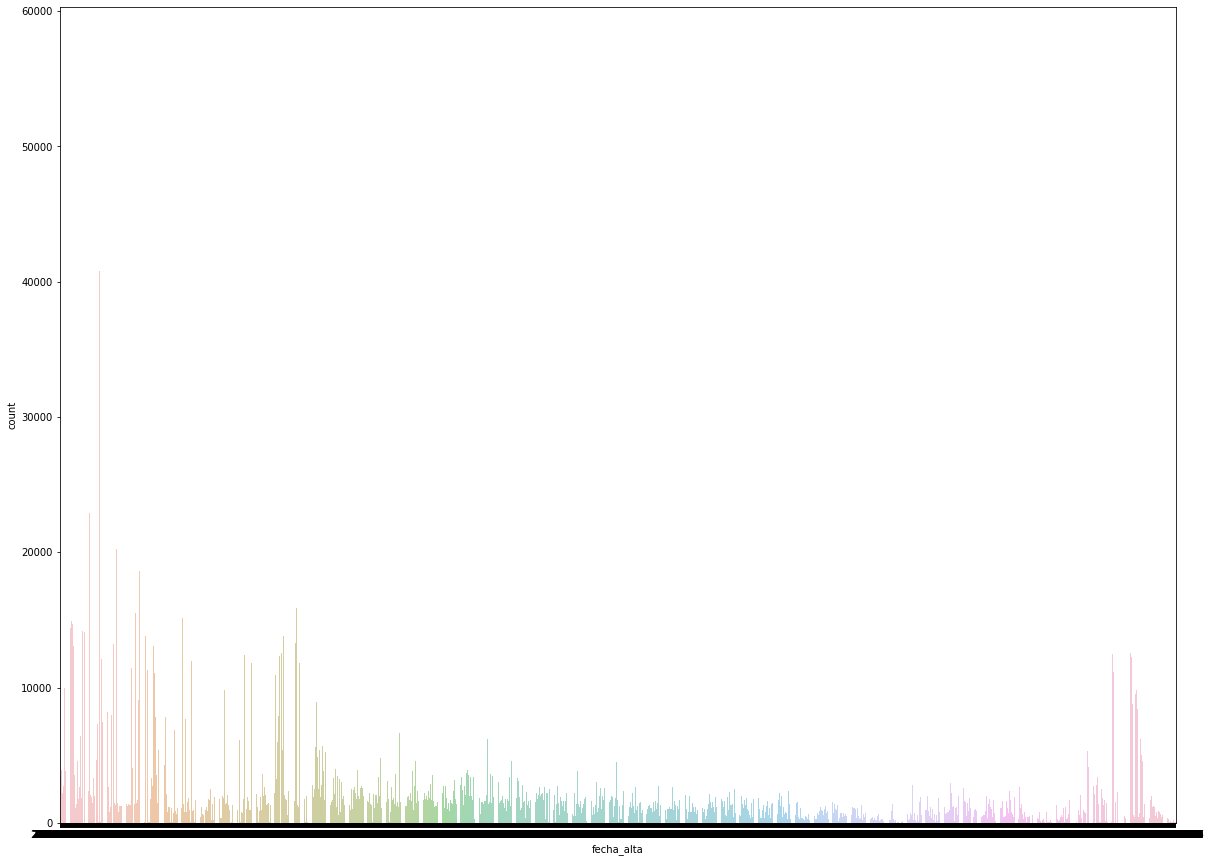

--------------------------------------------------
col :  ind_nuevo


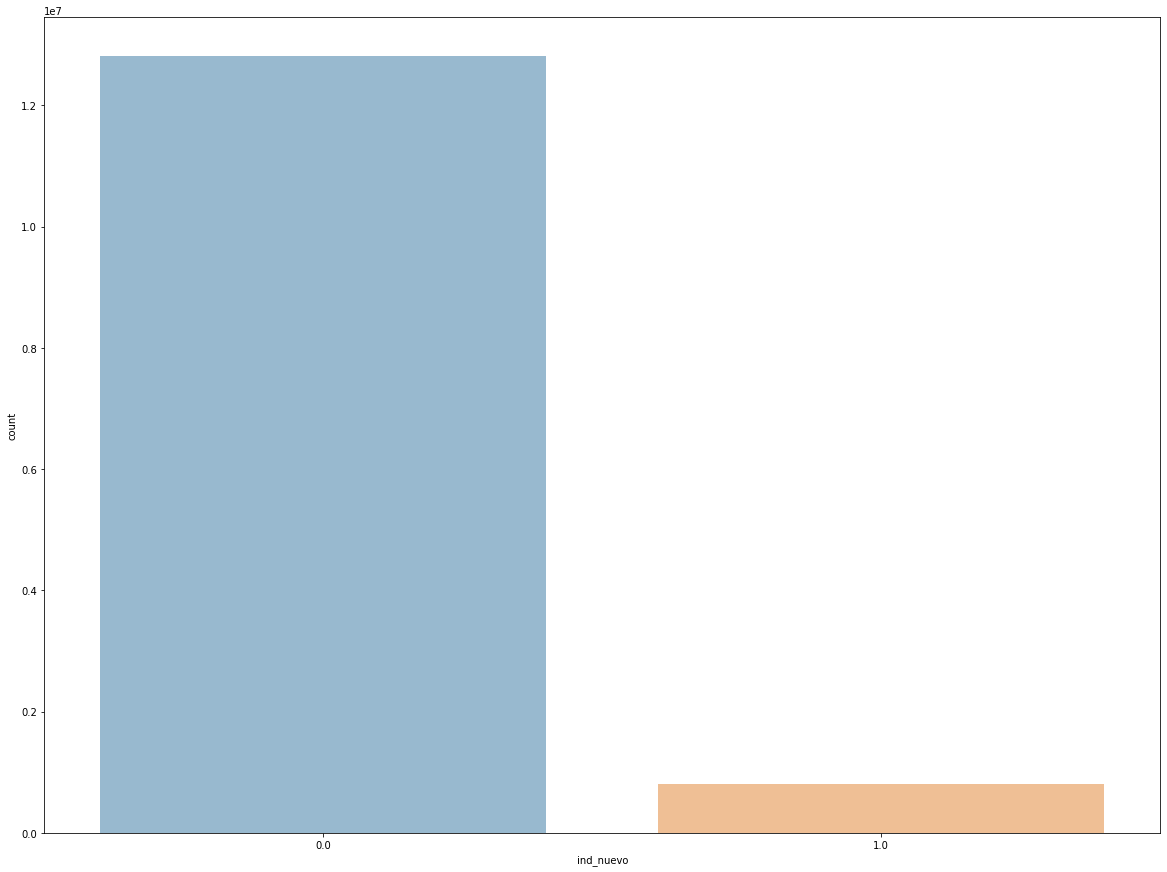

--------------------------------------------------
col :  antiguedad


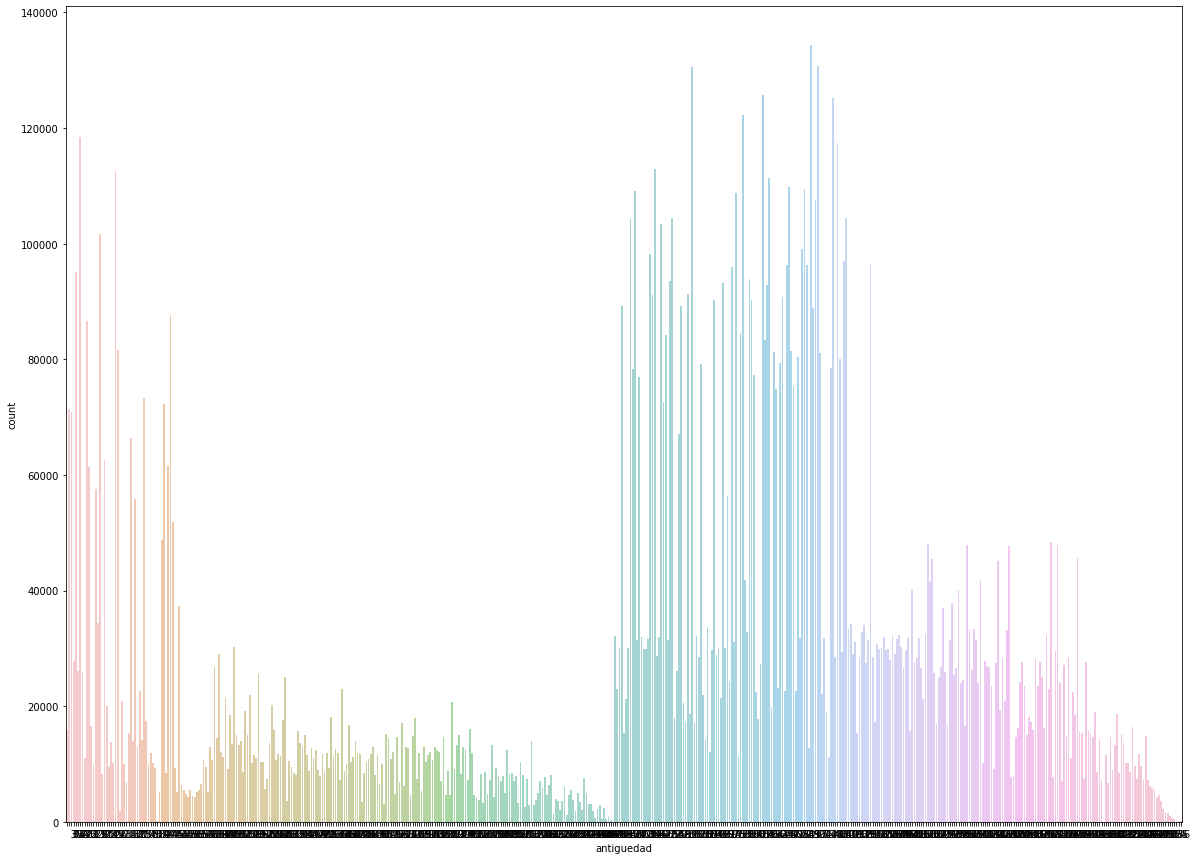

--------------------------------------------------
col :  indrel


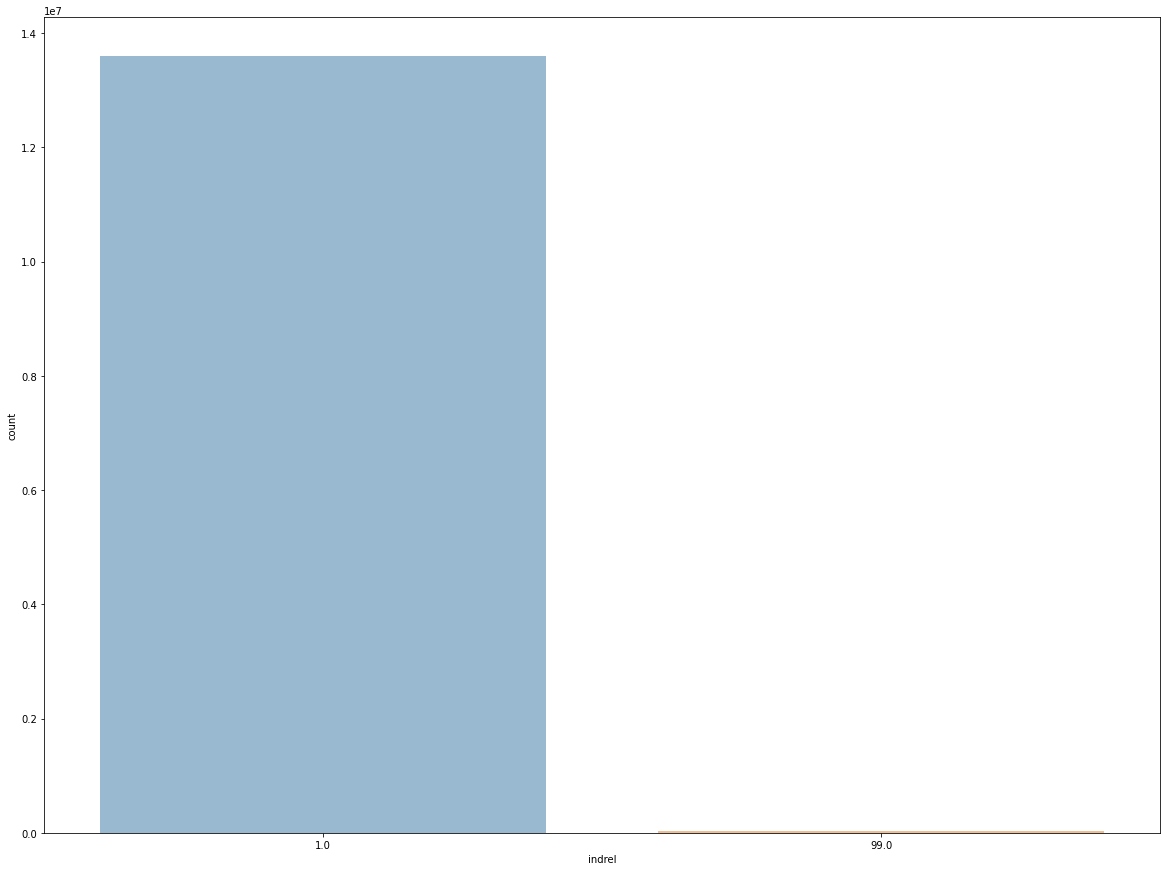

--------------------------------------------------
col :  ult_fec_cli_1t


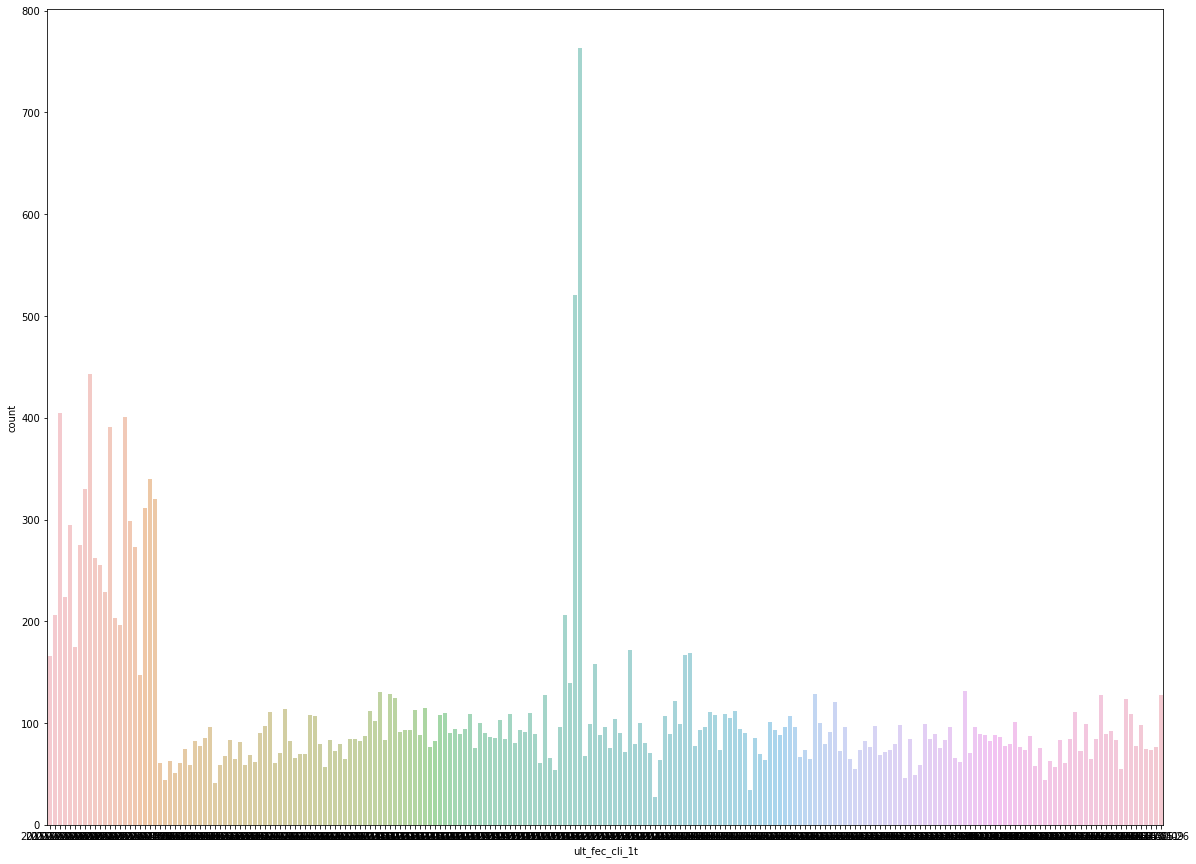

--------------------------------------------------
col :  indrel_1mes


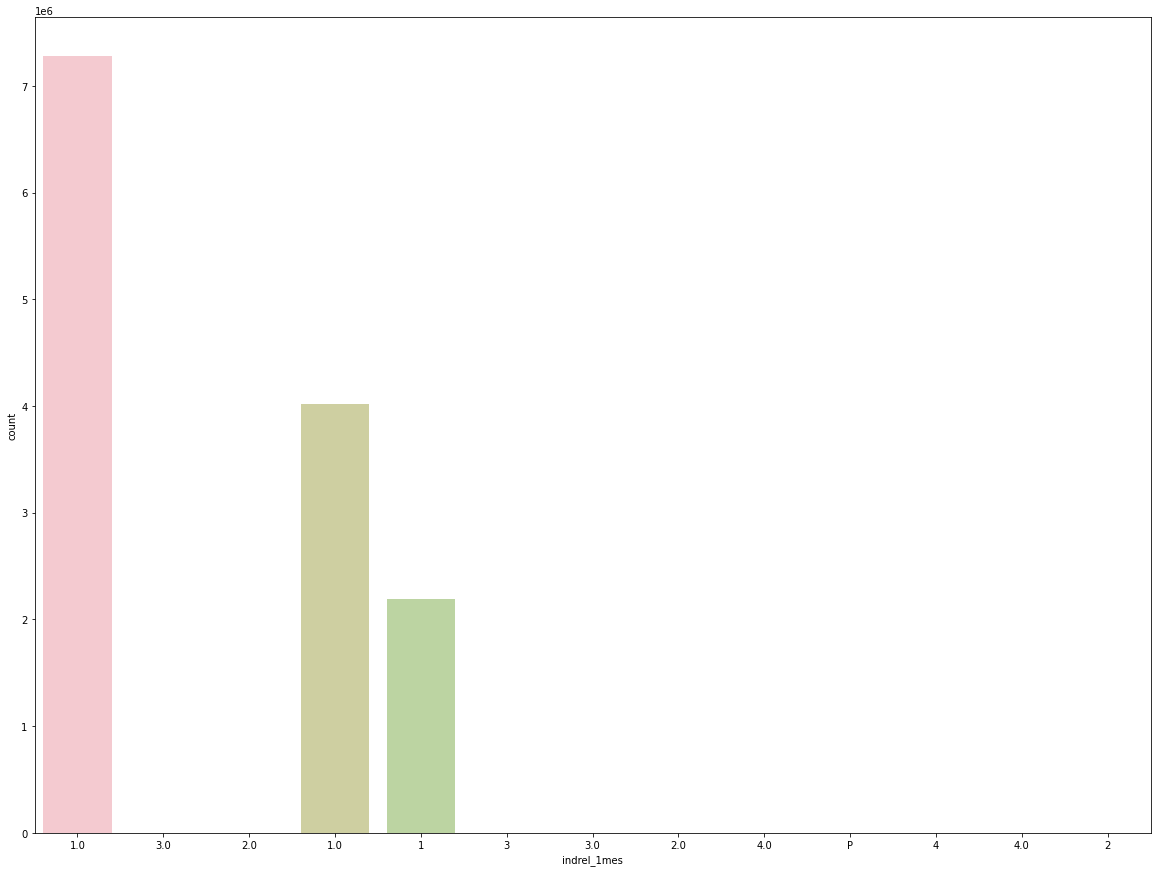

--------------------------------------------------
col :  tiprel_1mes


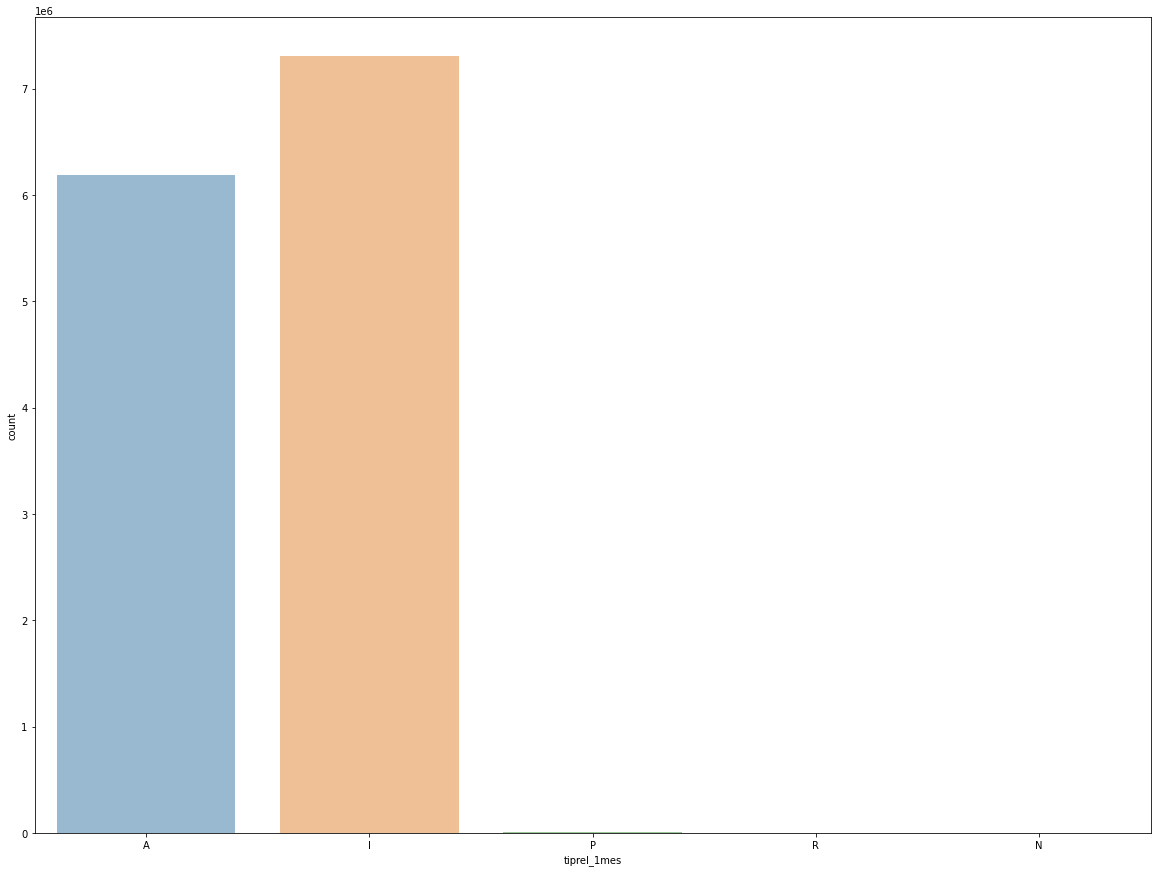

--------------------------------------------------
col :  indresi


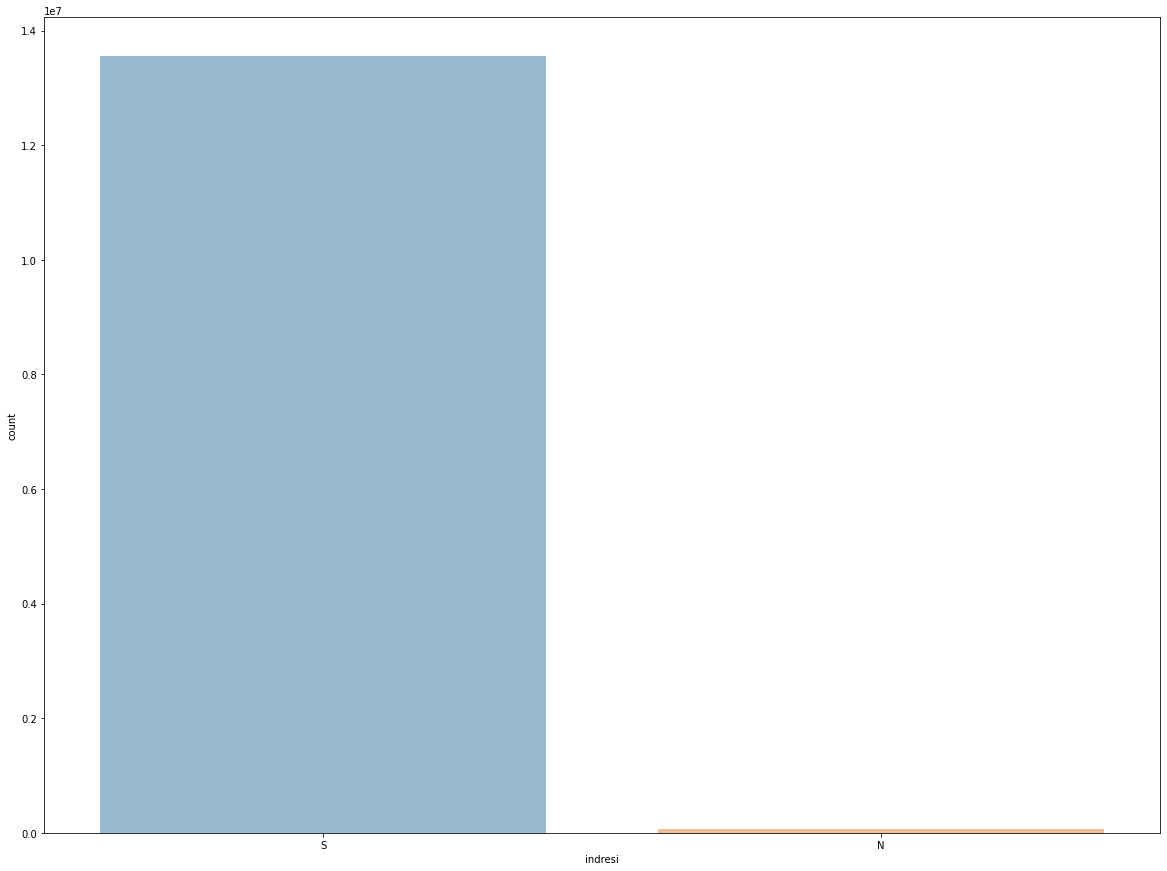

--------------------------------------------------
col :  indext


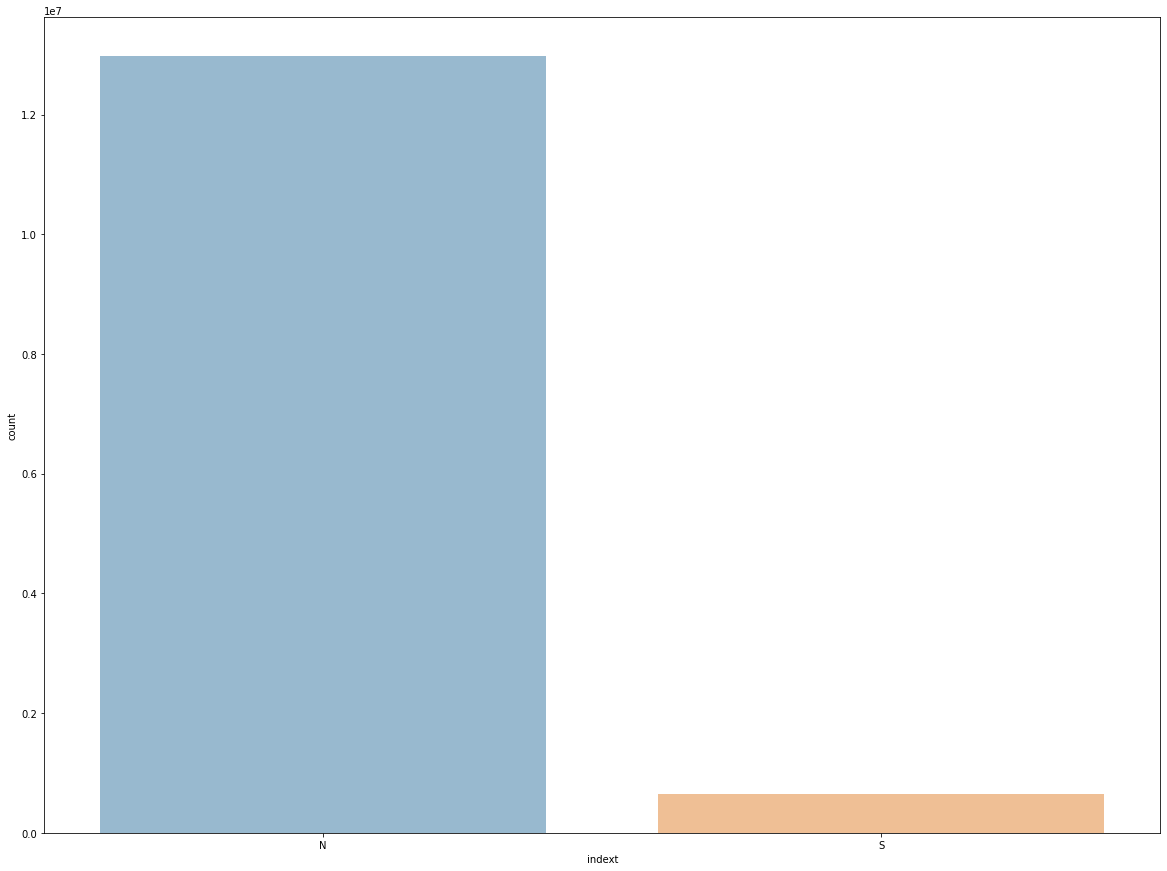

--------------------------------------------------
col :  conyuemp


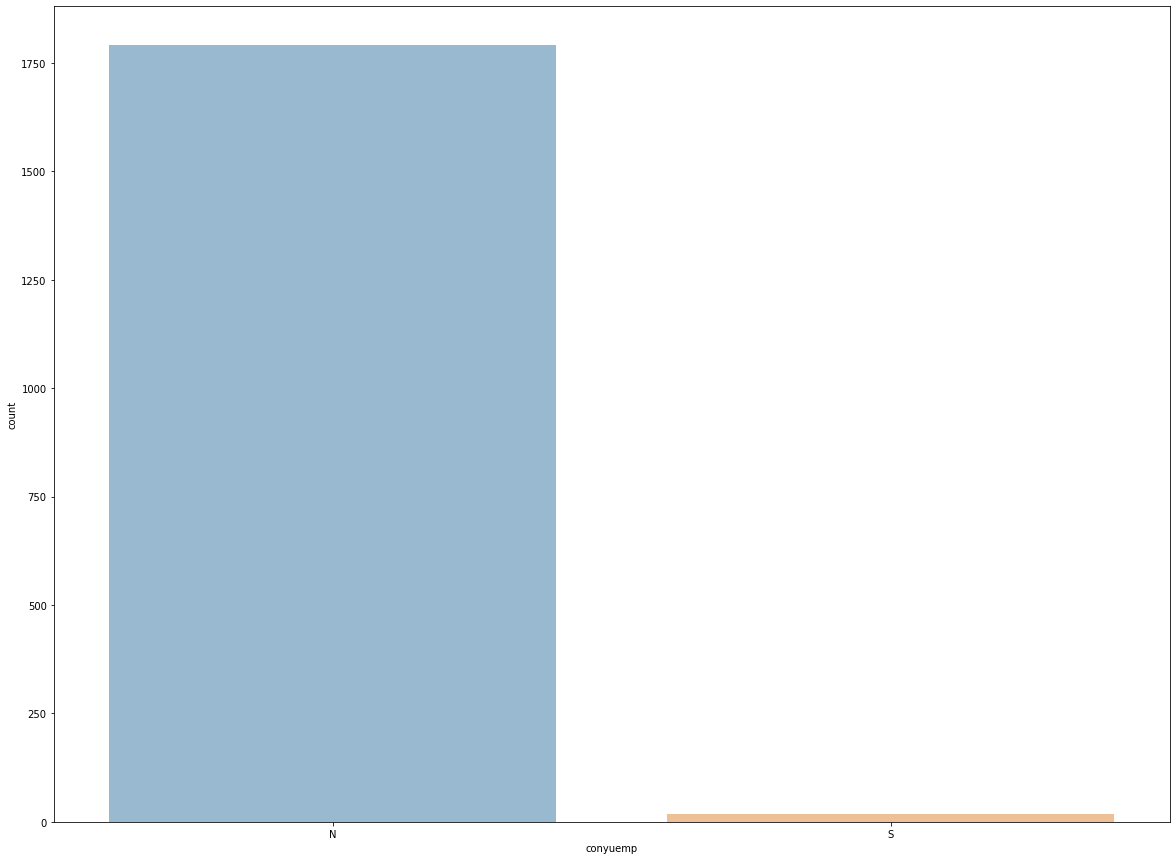

--------------------------------------------------
col :  canal_entrada


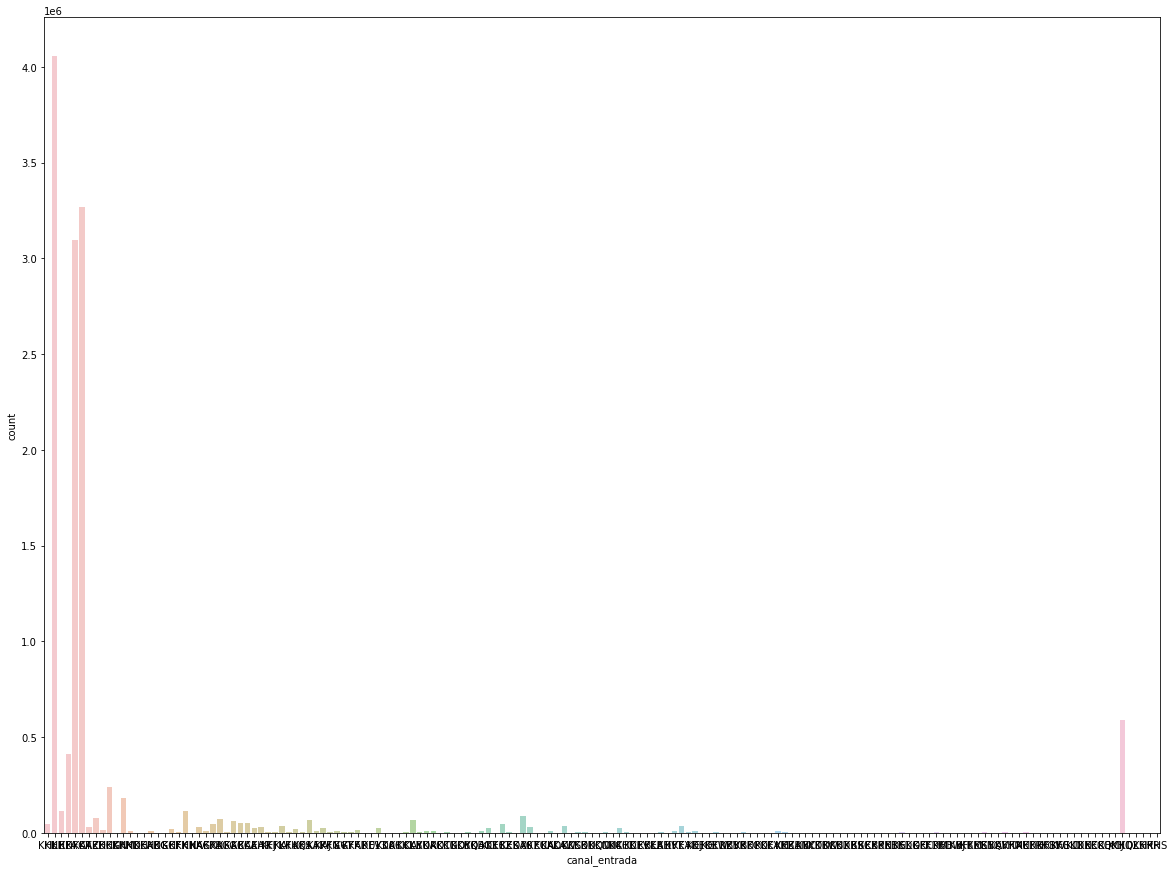

--------------------------------------------------
col :  indfall


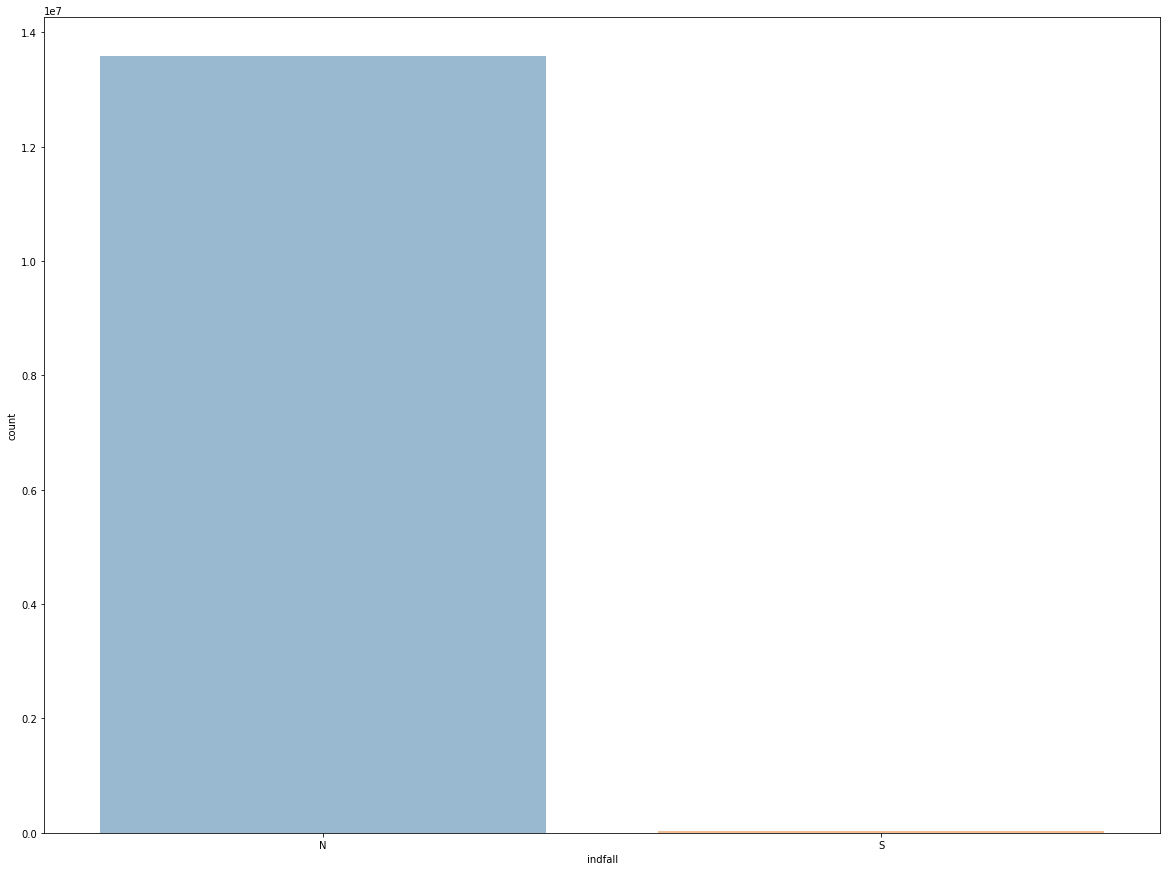

--------------------------------------------------
col :  tipodom


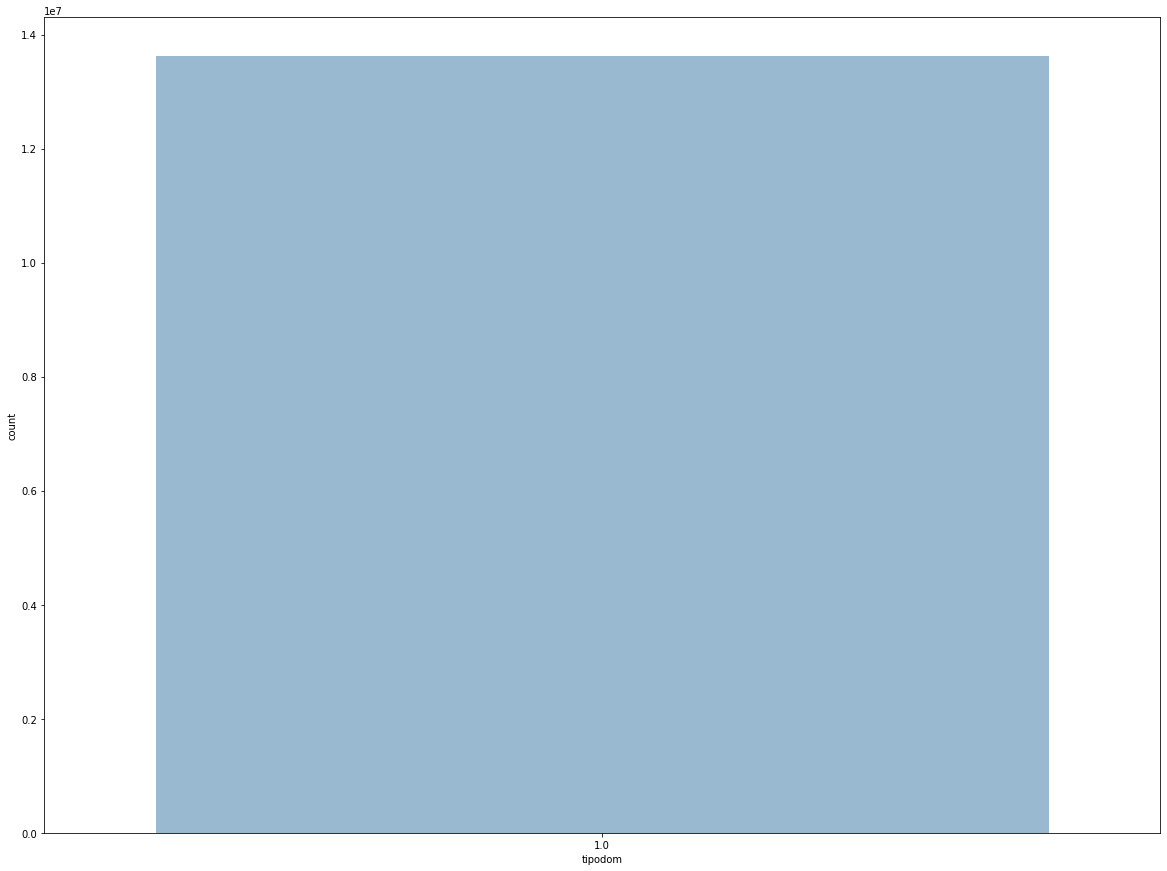

--------------------------------------------------
col :  cod_prov


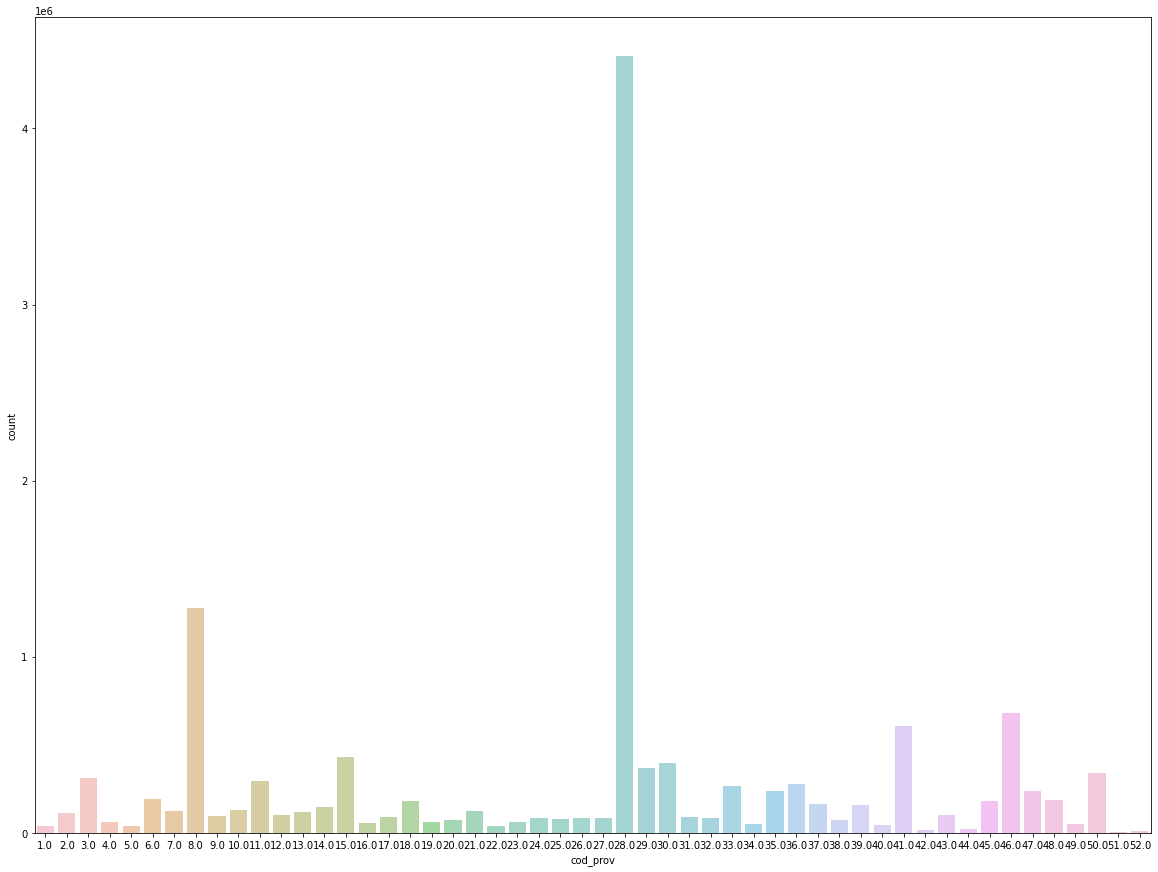

--------------------------------------------------
col :  nomprov


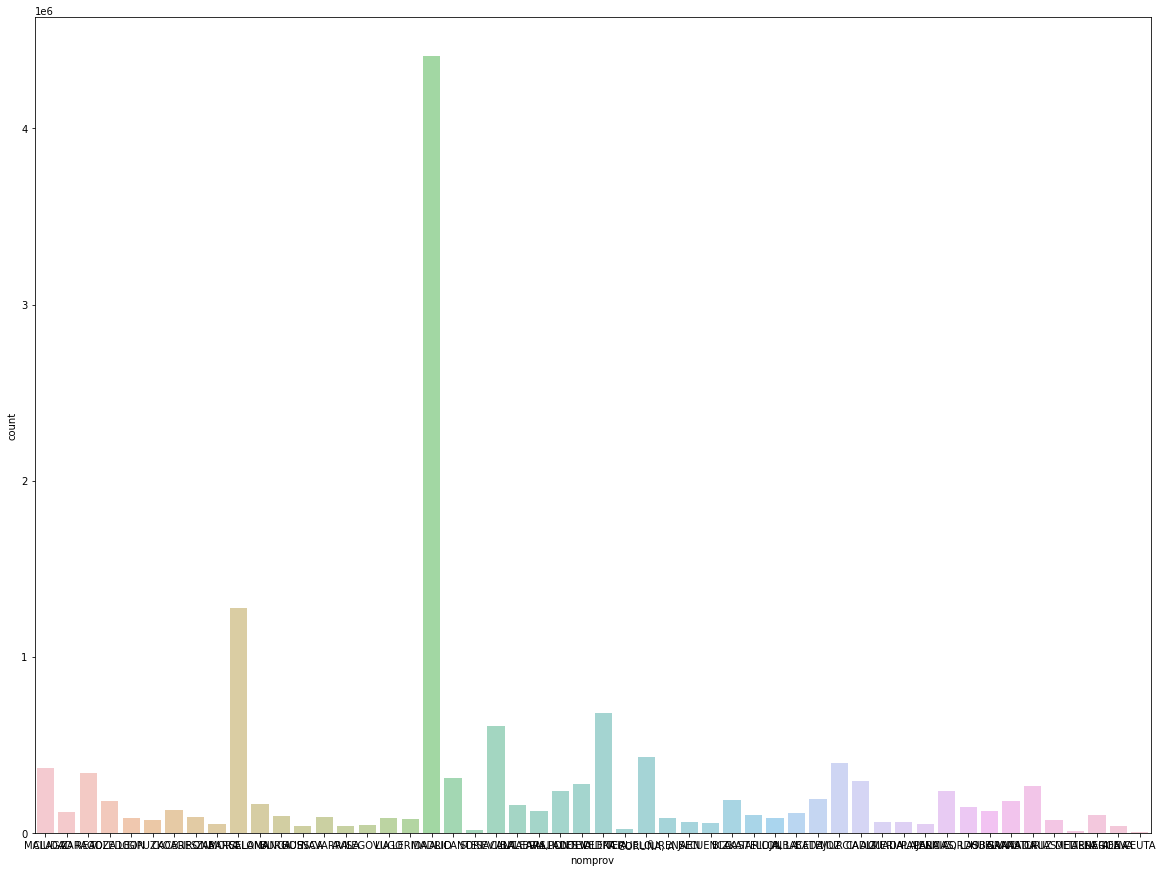

--------------------------------------------------
col :  ind_actividad_cliente


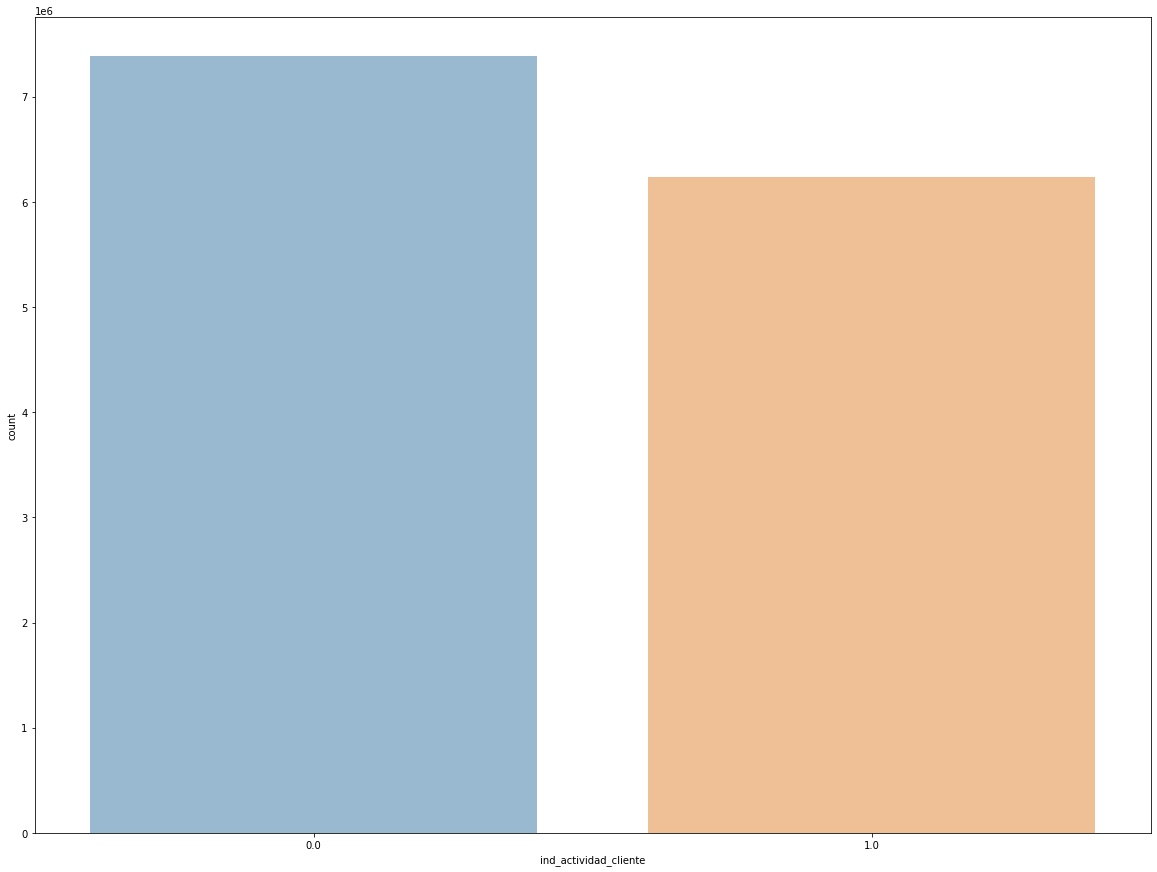

--------------------------------------------------
col :  segmento


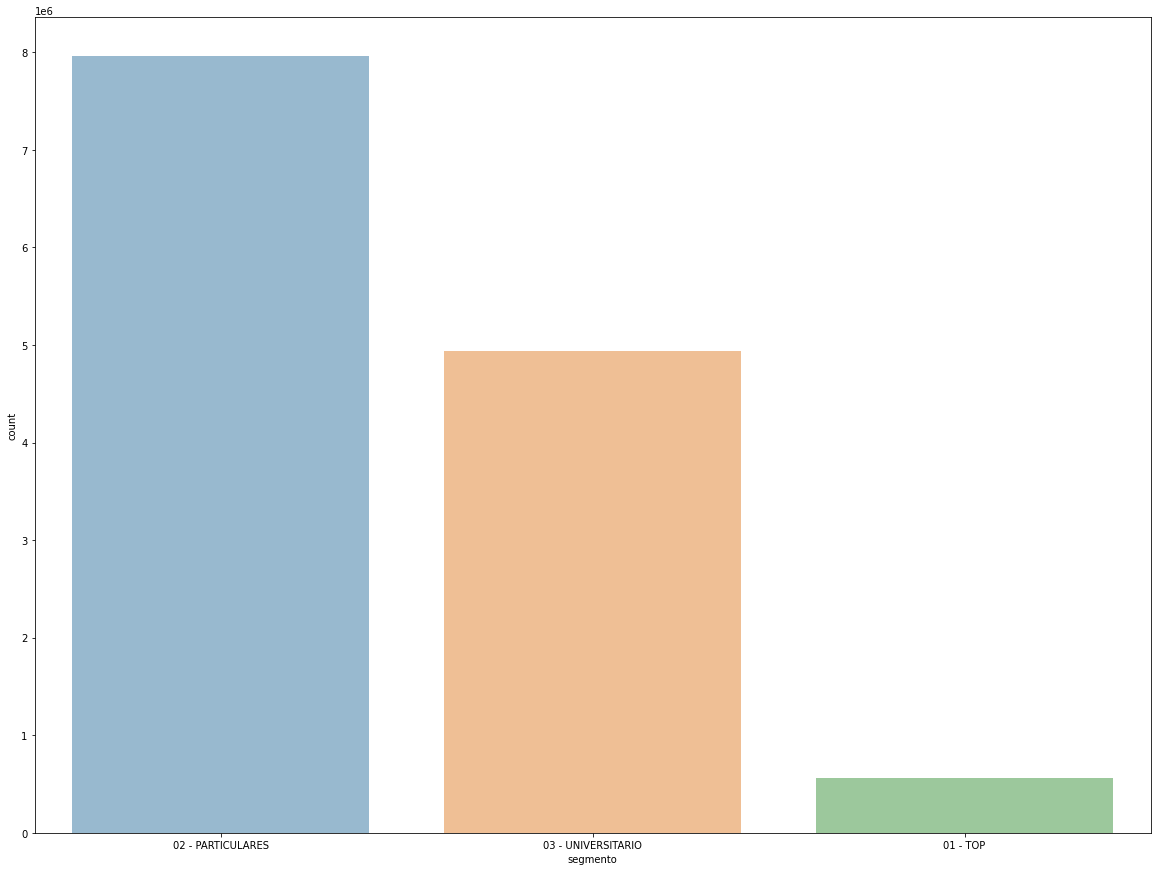

--------------------------------------------------
col :  ind_ahor_fin_ult1


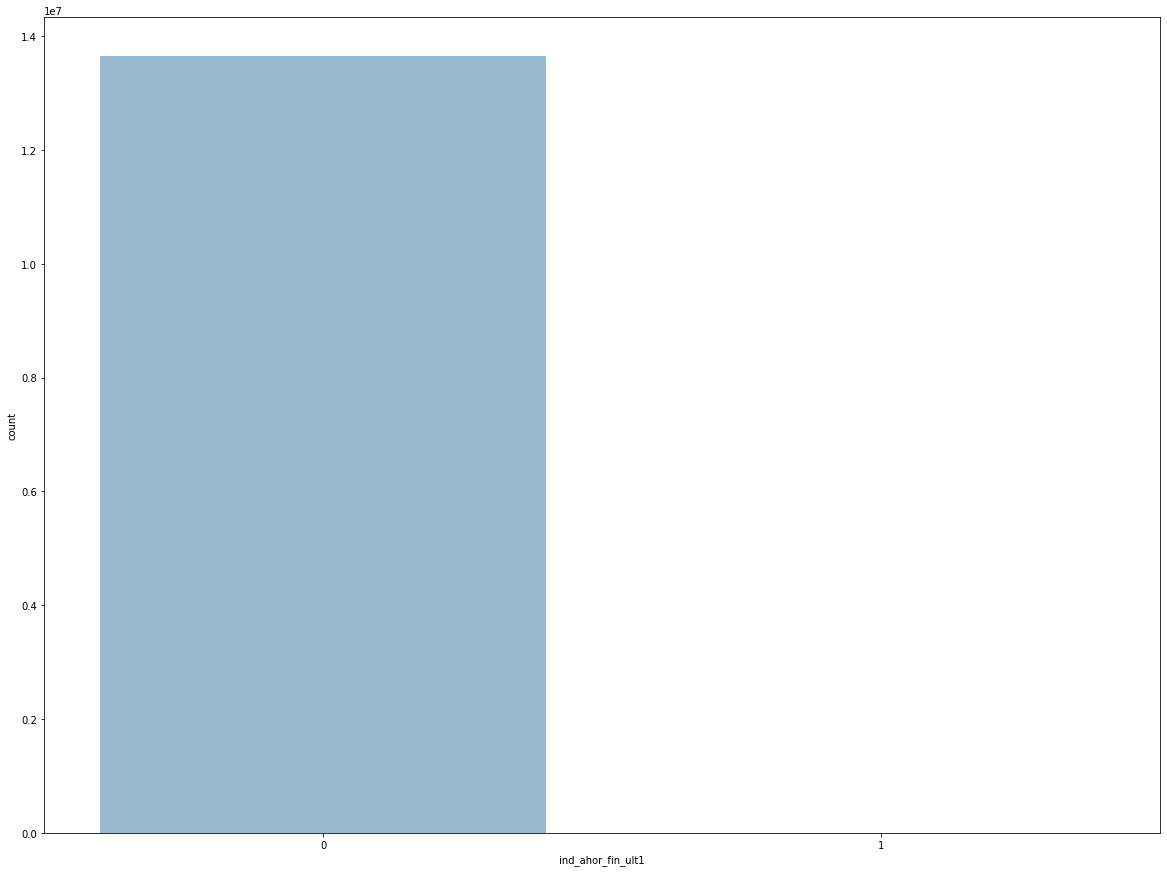

--------------------------------------------------
col :  ind_aval_fin_ult1


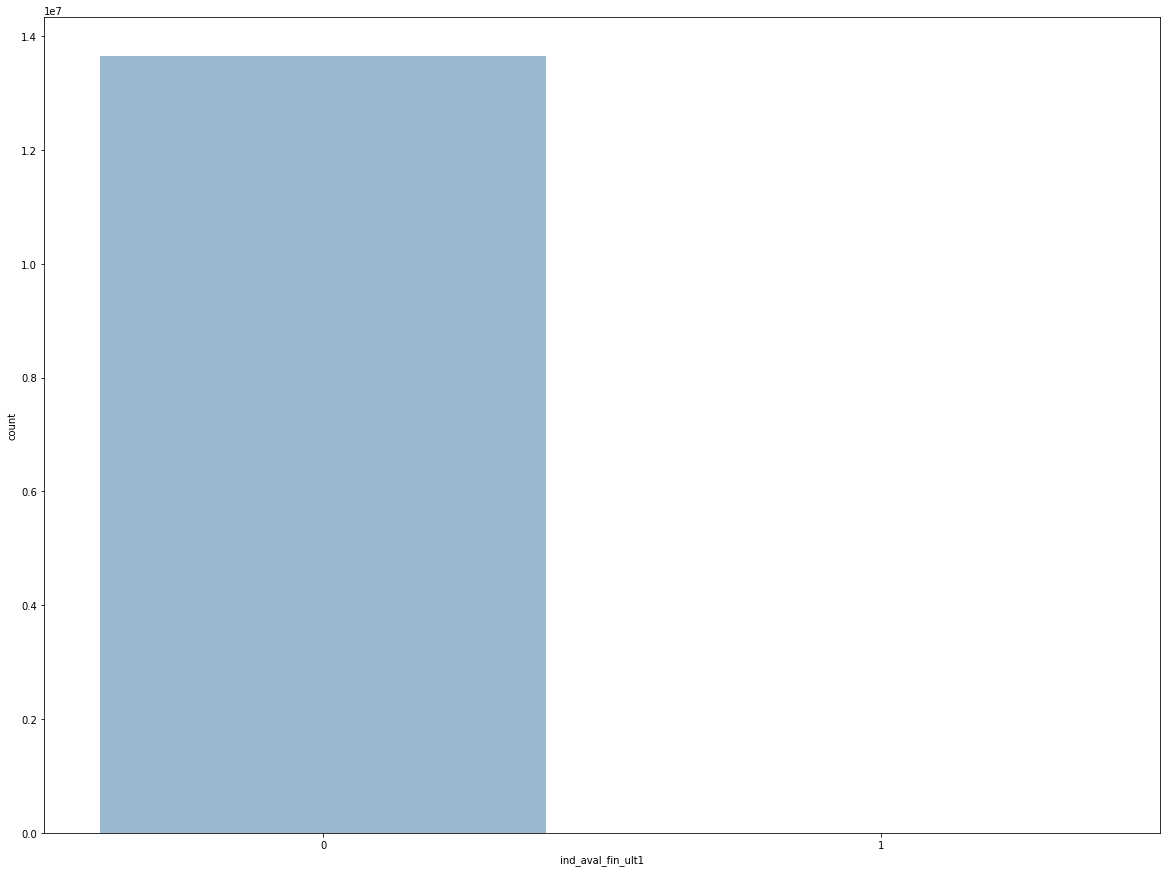

--------------------------------------------------
col :  ind_cco_fin_ult1


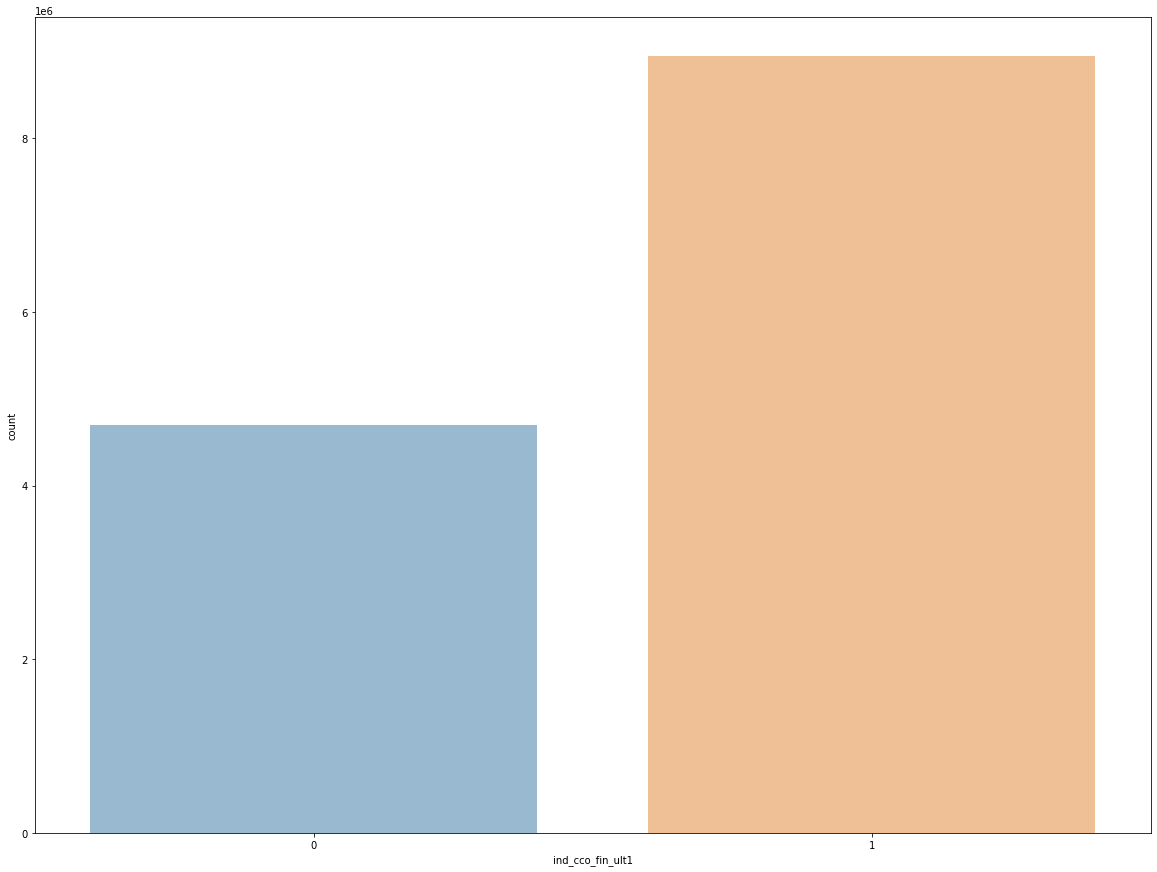

--------------------------------------------------
col :  ind_cder_fin_ult1


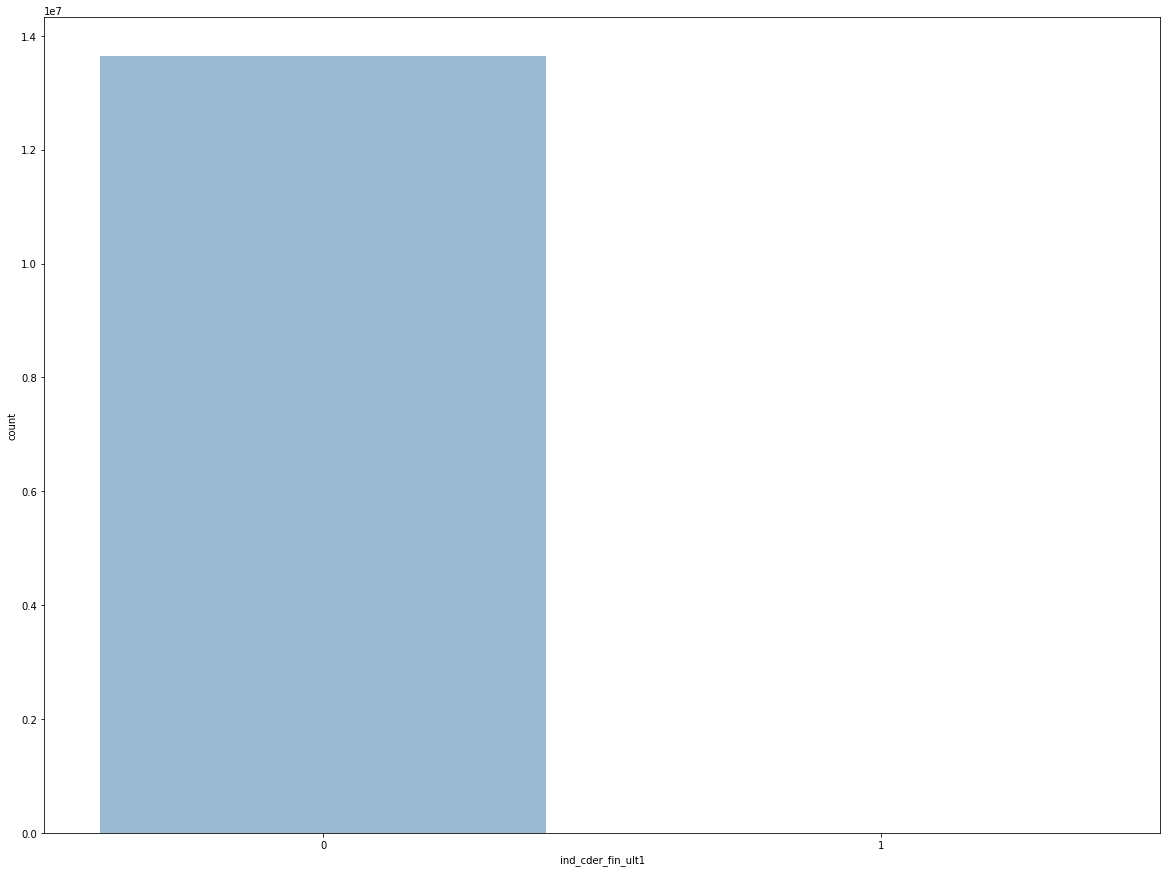

--------------------------------------------------
col :  ind_cno_fin_ult1


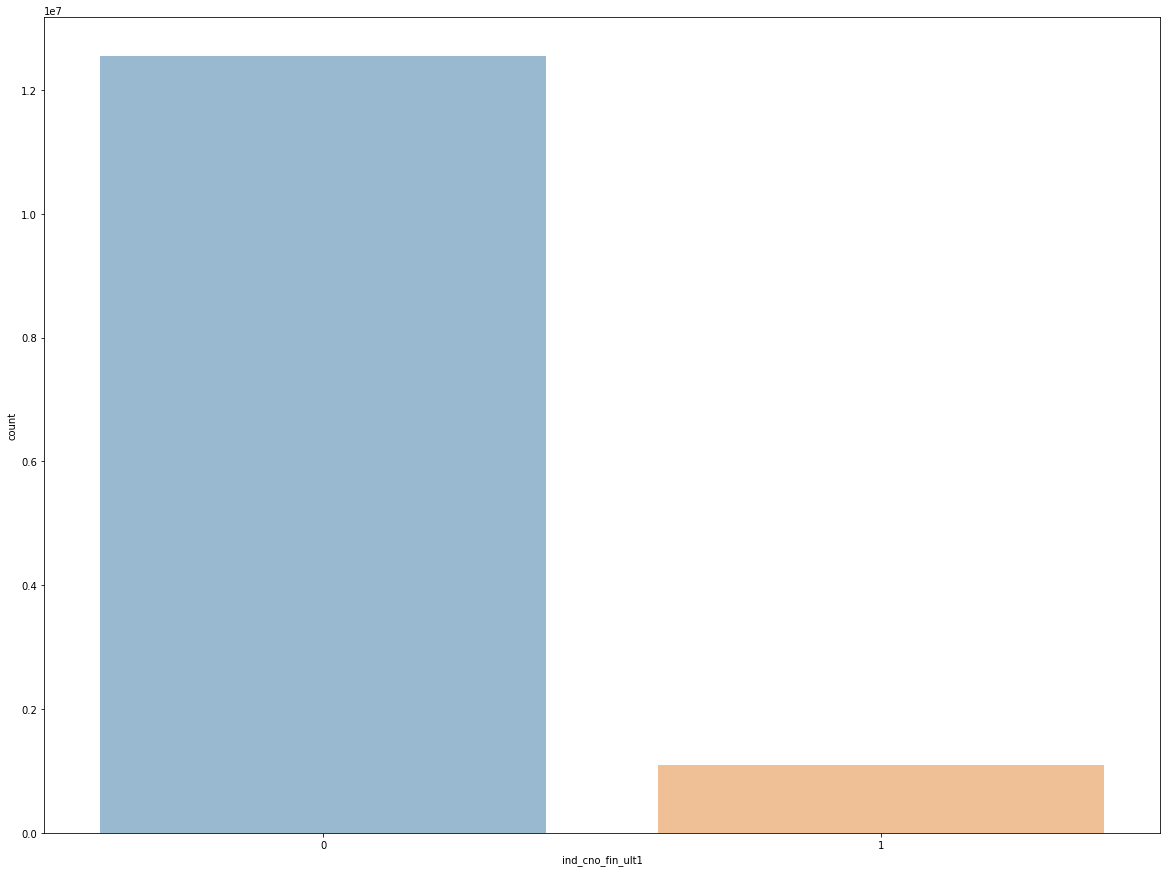

--------------------------------------------------
col :  ind_ctju_fin_ult1


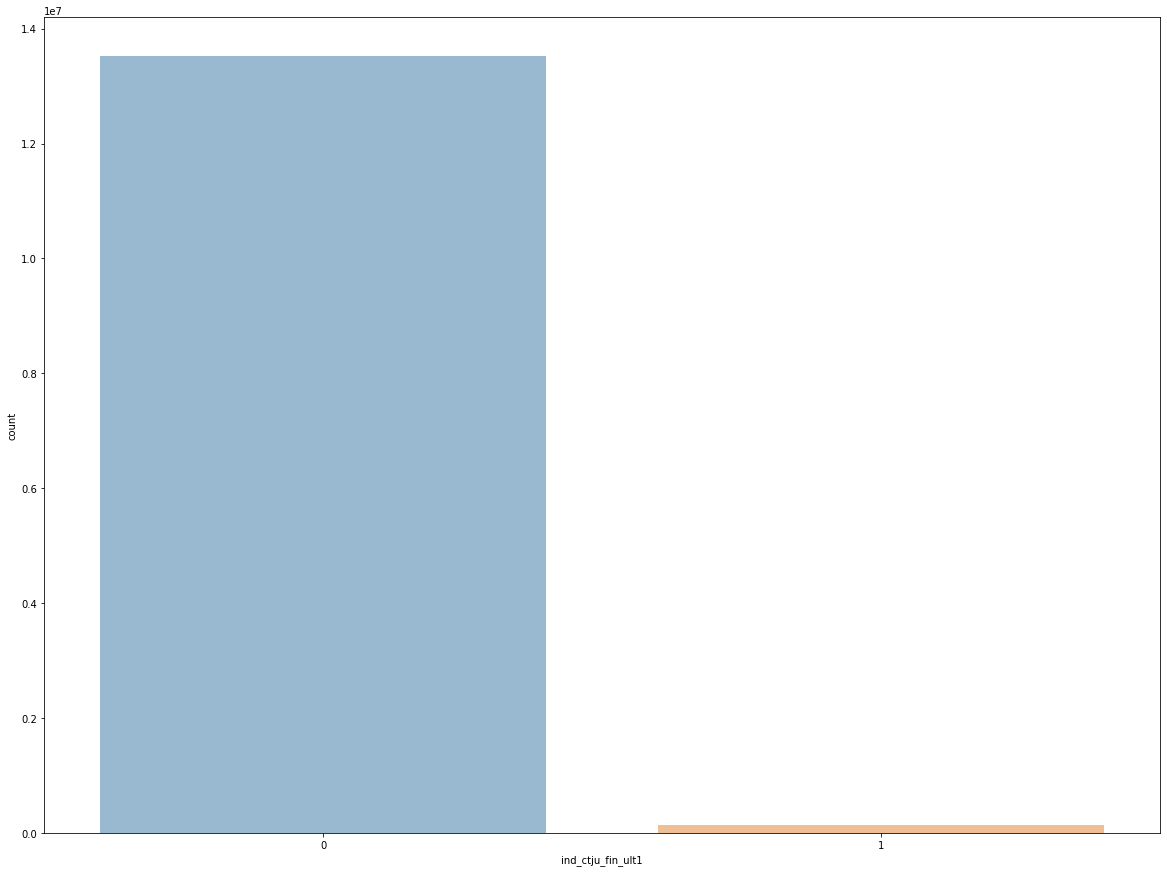

--------------------------------------------------
col :  ind_ctma_fin_ult1


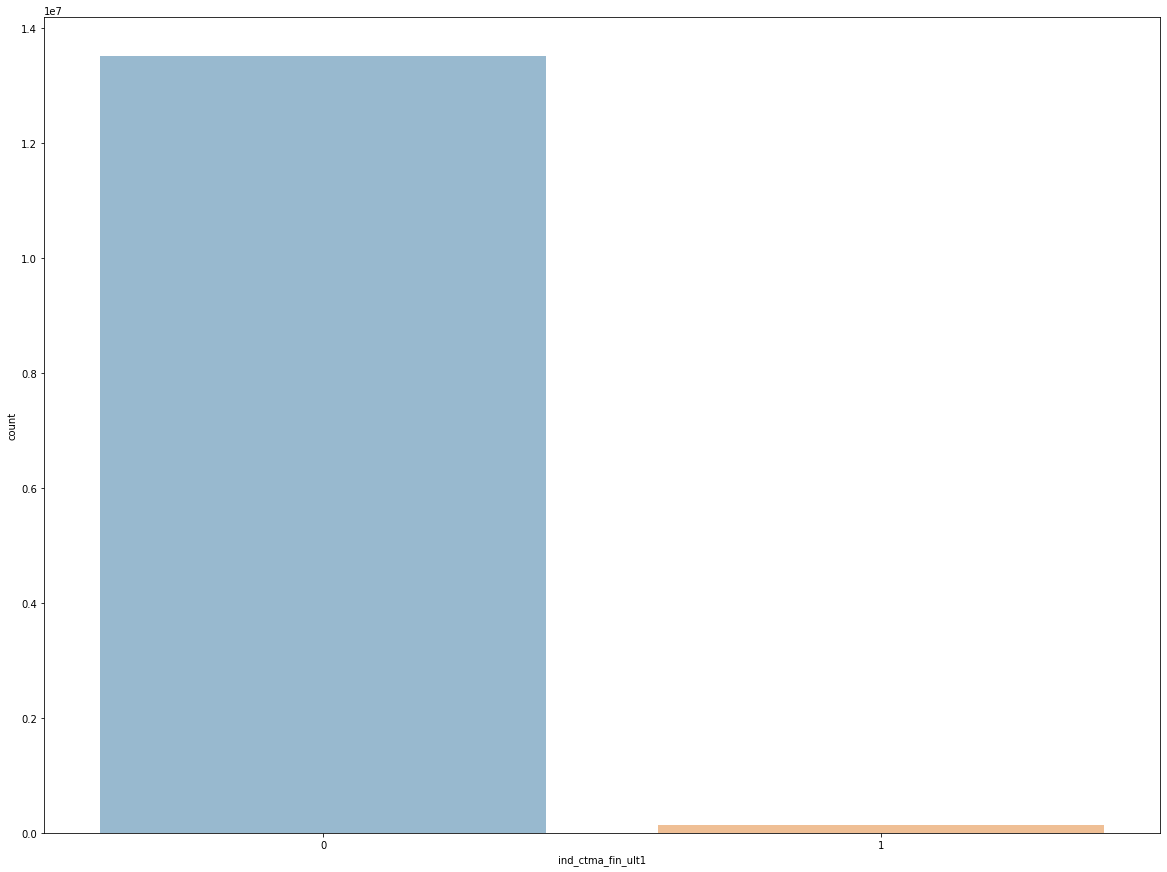

--------------------------------------------------
col :  ind_ctop_fin_ult1


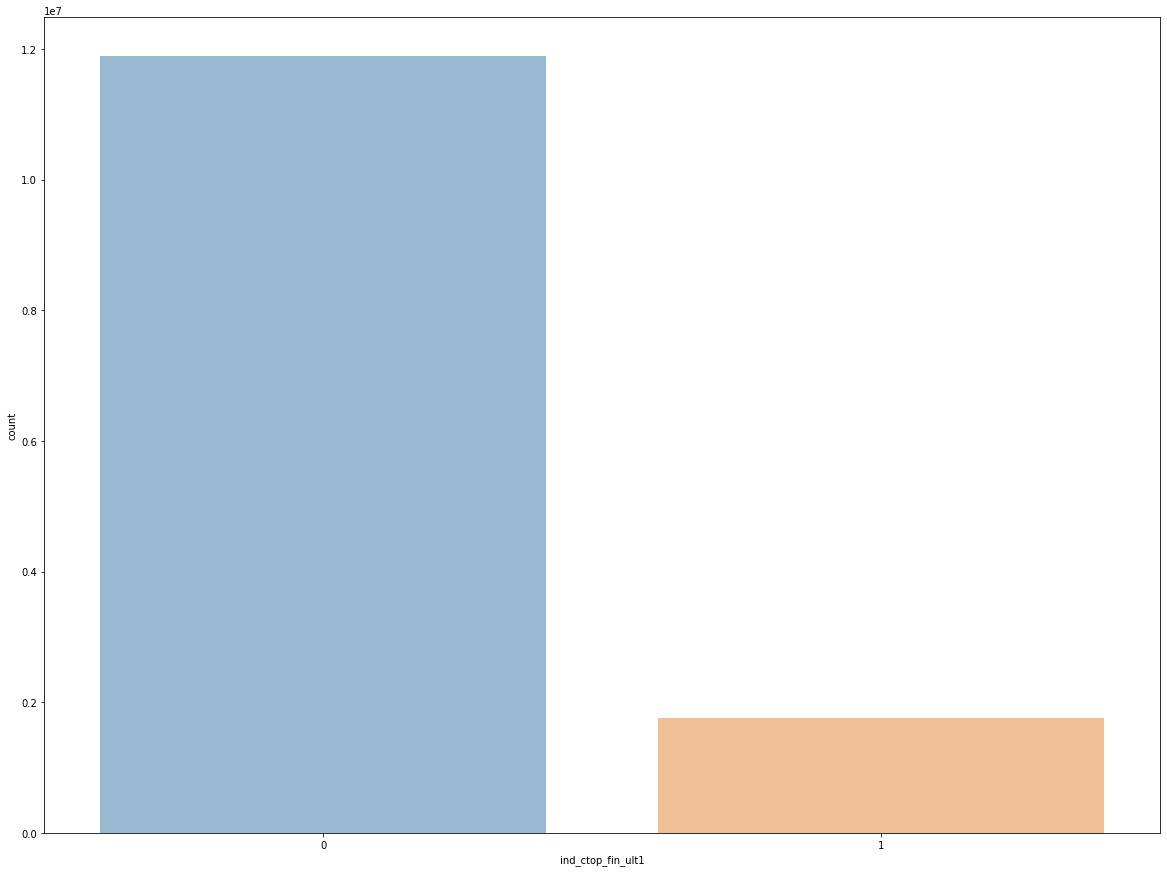

--------------------------------------------------
col :  ind_ctpp_fin_ult1


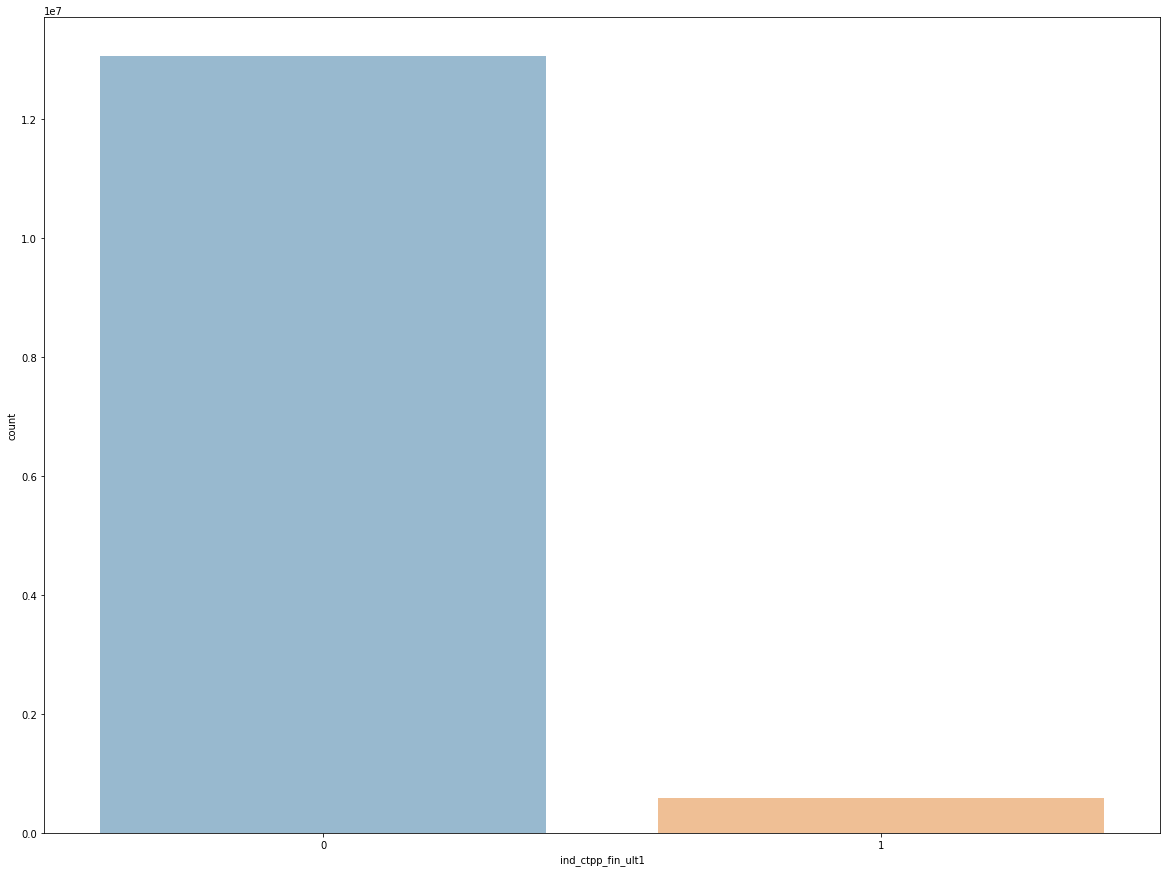

--------------------------------------------------
col :  ind_deco_fin_ult1


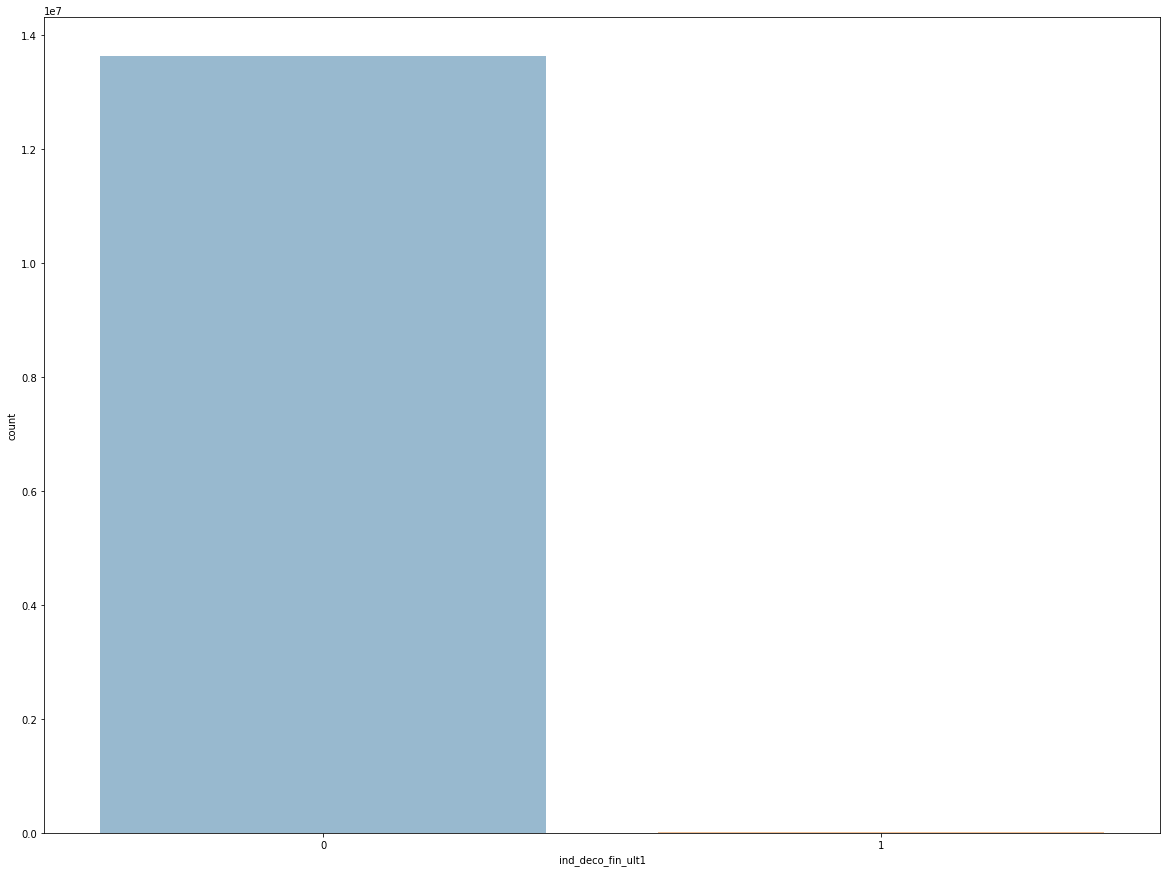

--------------------------------------------------
col :  ind_deme_fin_ult1


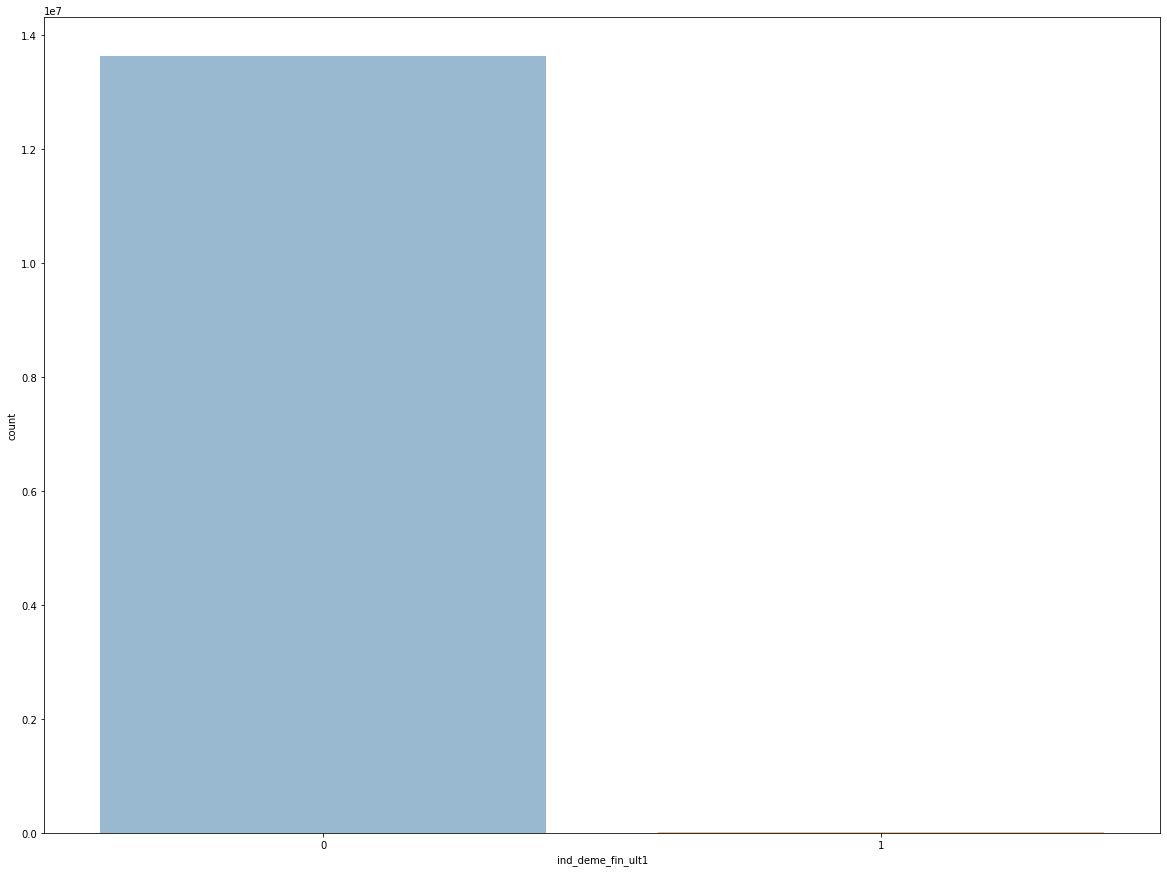

--------------------------------------------------
col :  ind_dela_fin_ult1


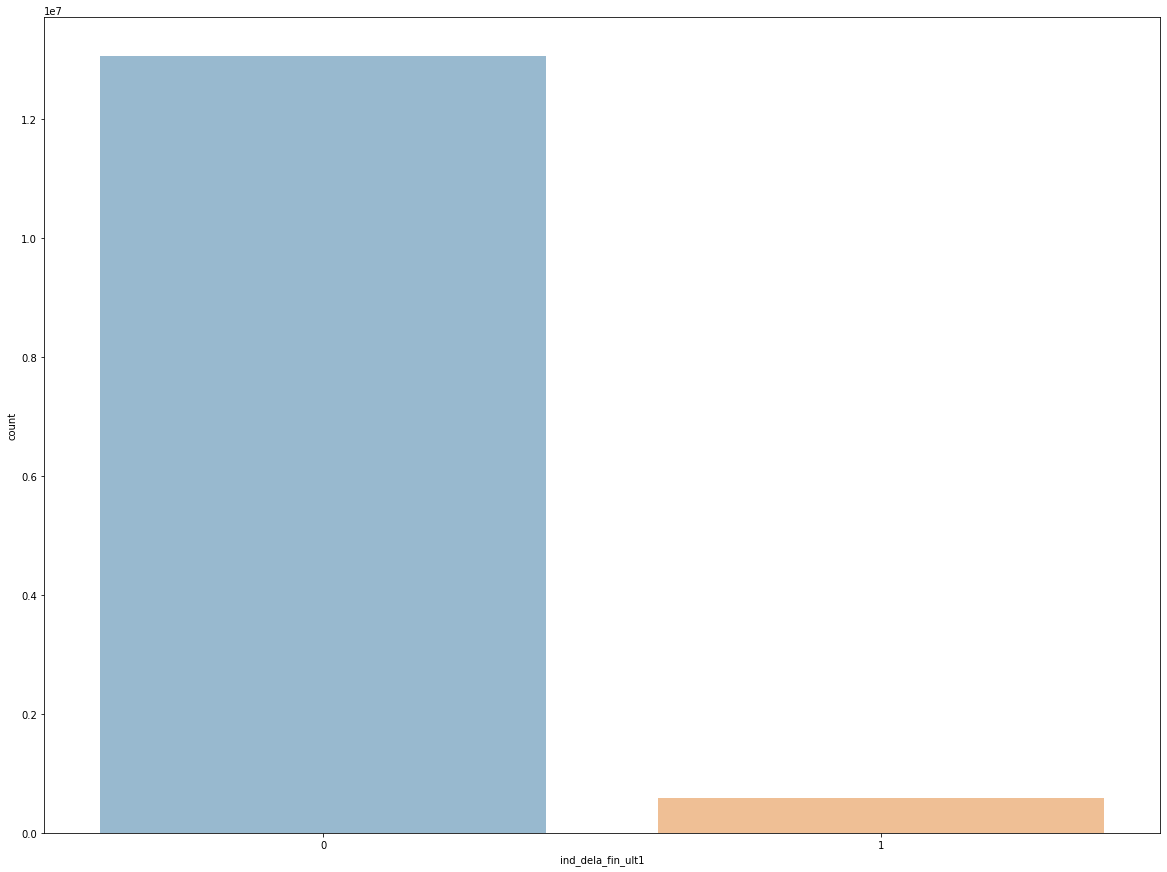

--------------------------------------------------
col :  ind_ecue_fin_ult1


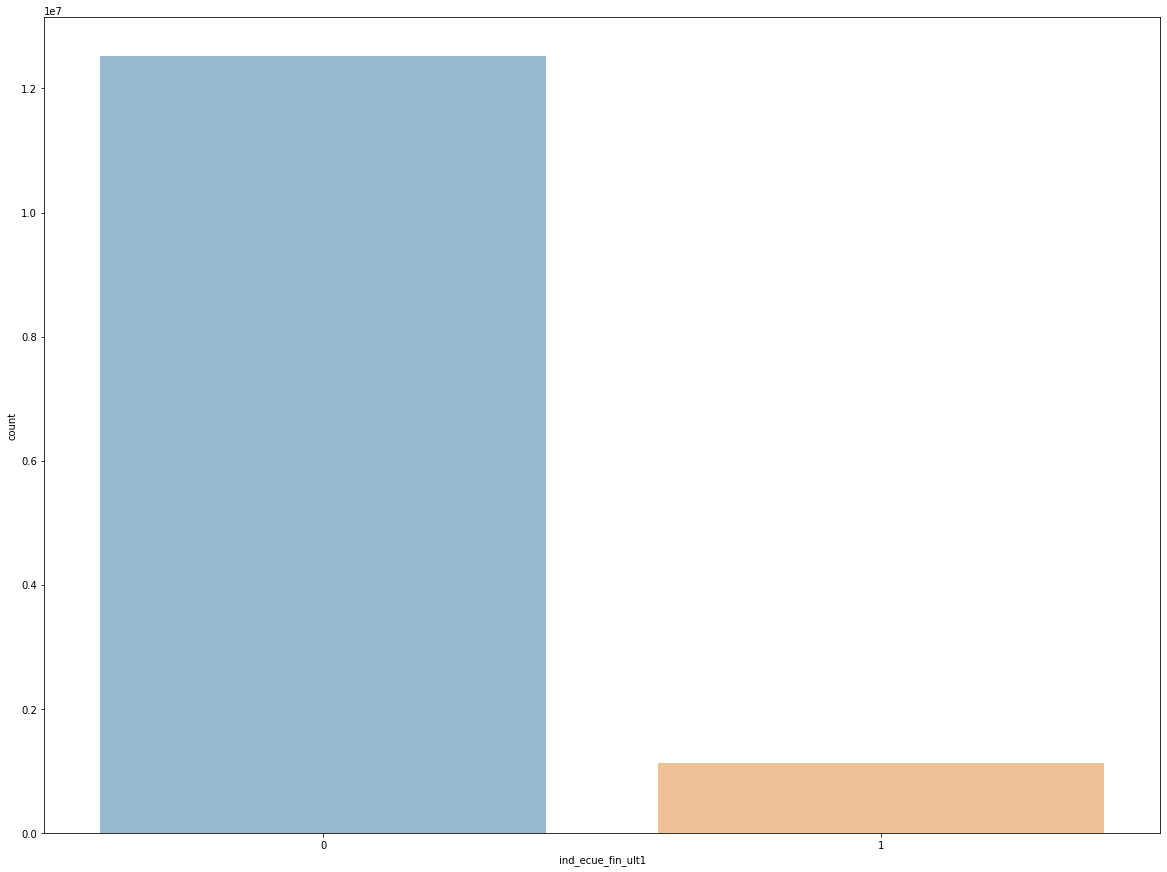

--------------------------------------------------
col :  ind_fond_fin_ult1


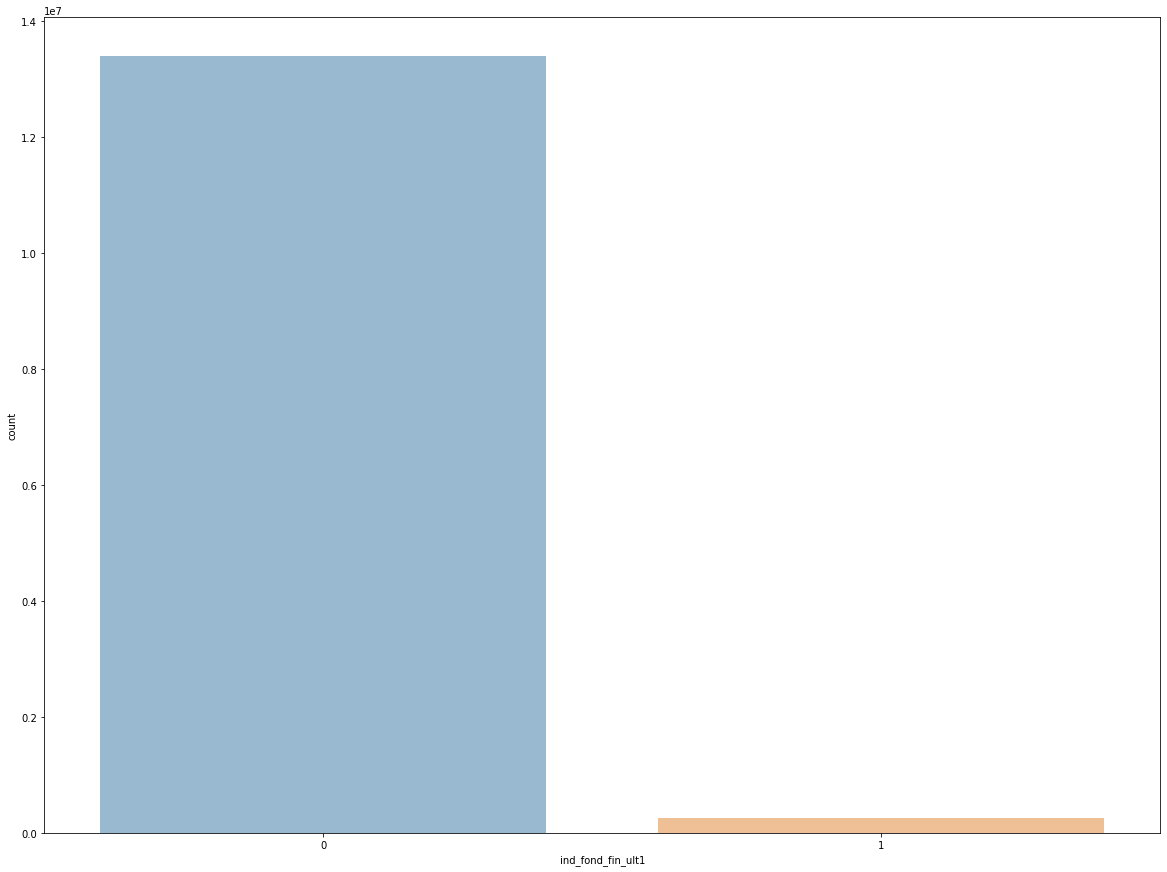

--------------------------------------------------
col :  ind_hip_fin_ult1


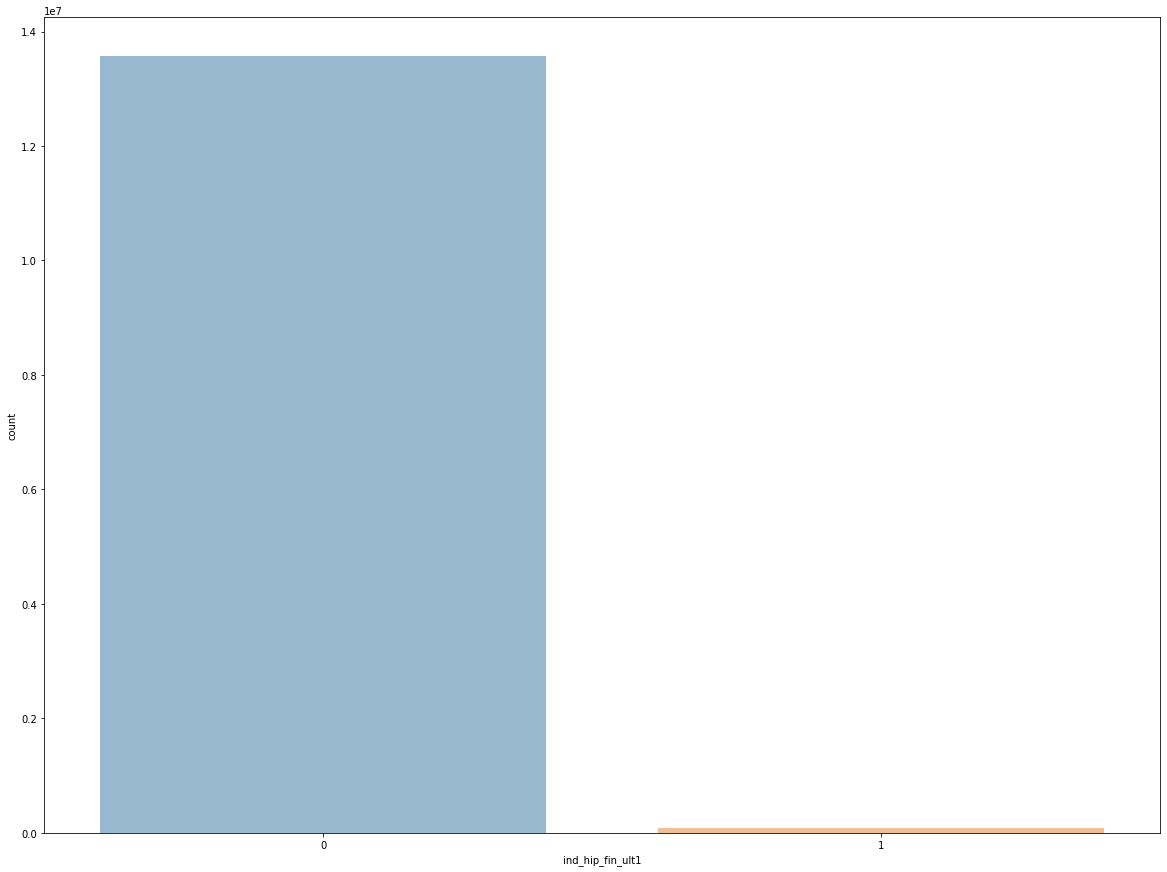

--------------------------------------------------
col :  ind_plan_fin_ult1


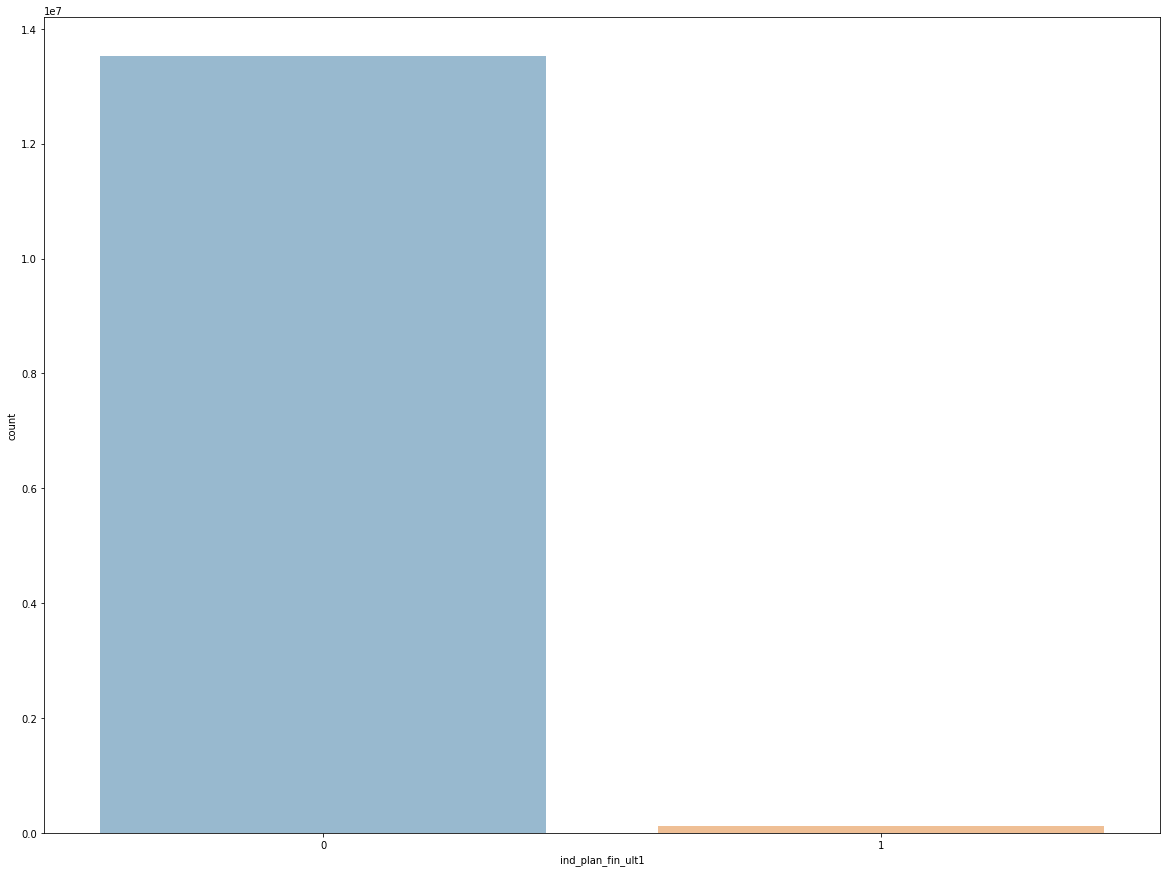

--------------------------------------------------
col :  ind_pres_fin_ult1


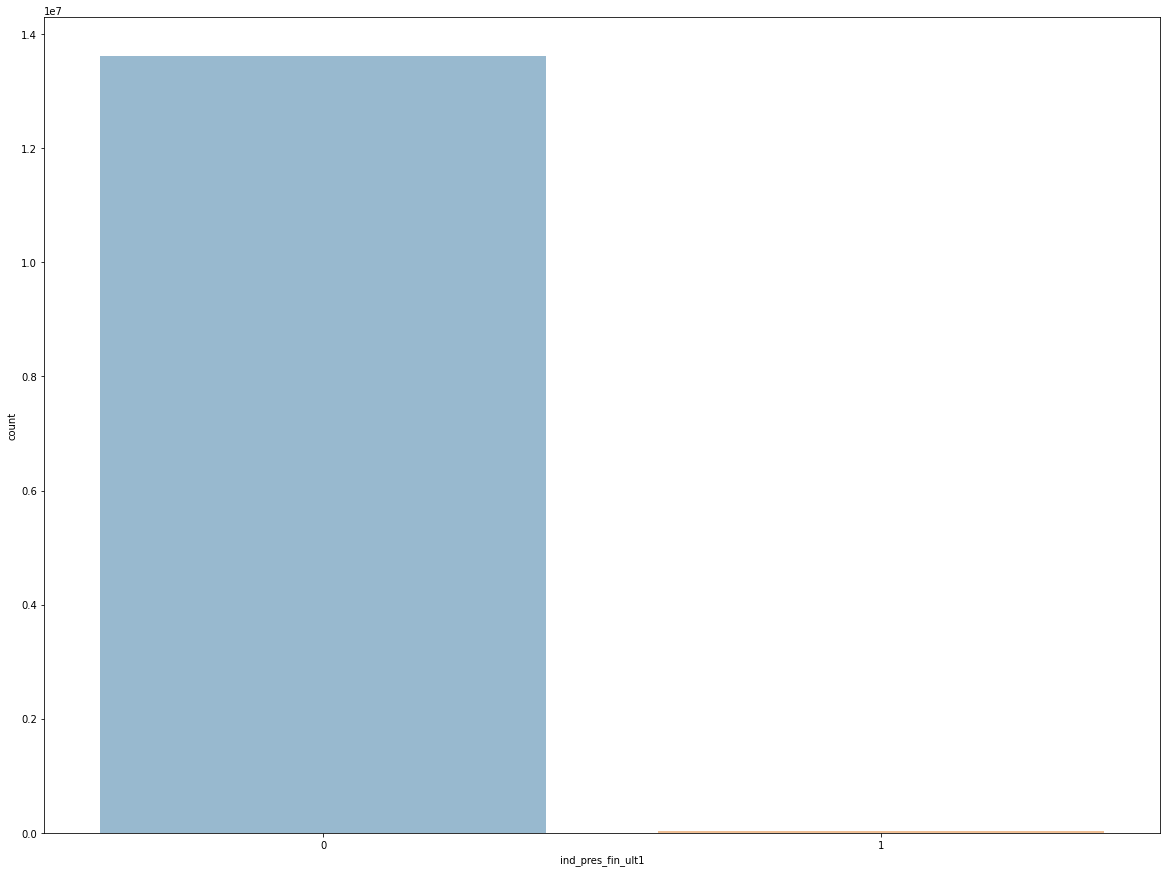

--------------------------------------------------
col :  ind_reca_fin_ult1


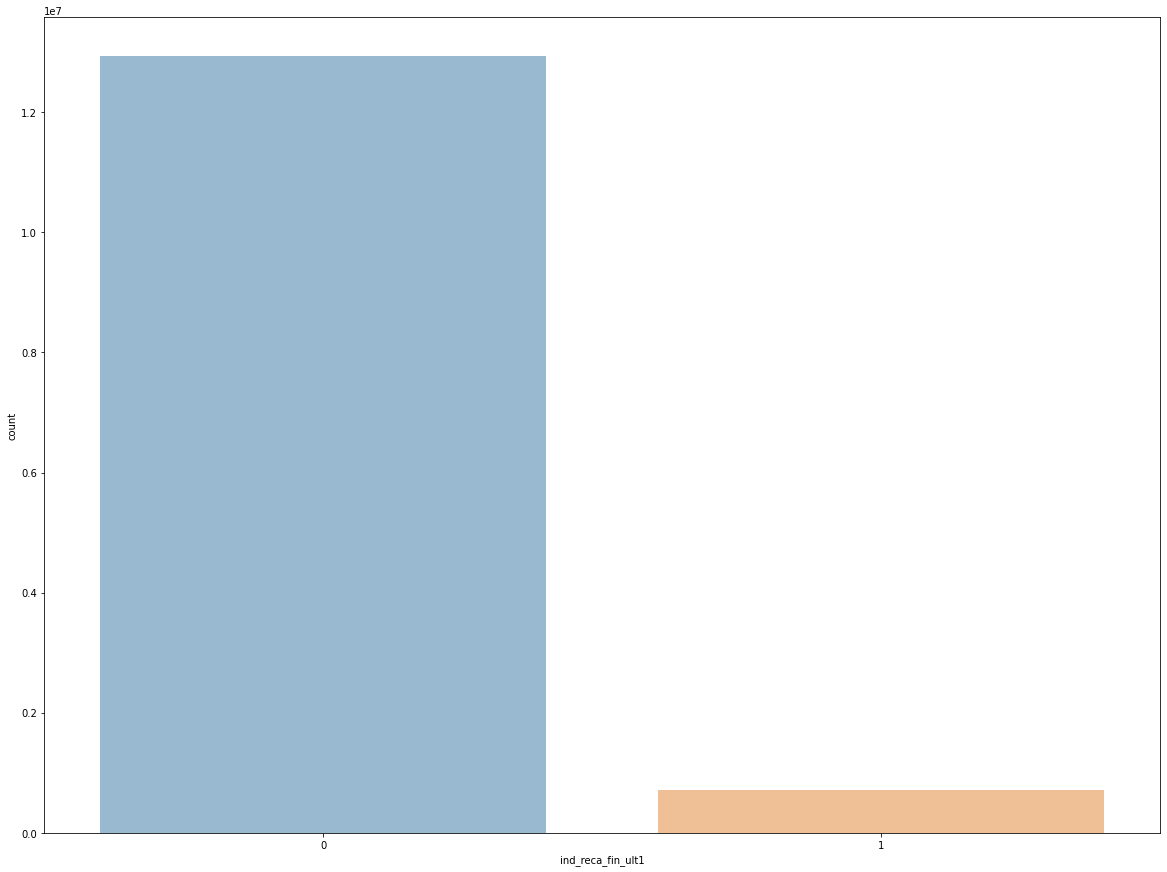

--------------------------------------------------
col :  ind_tjcr_fin_ult1


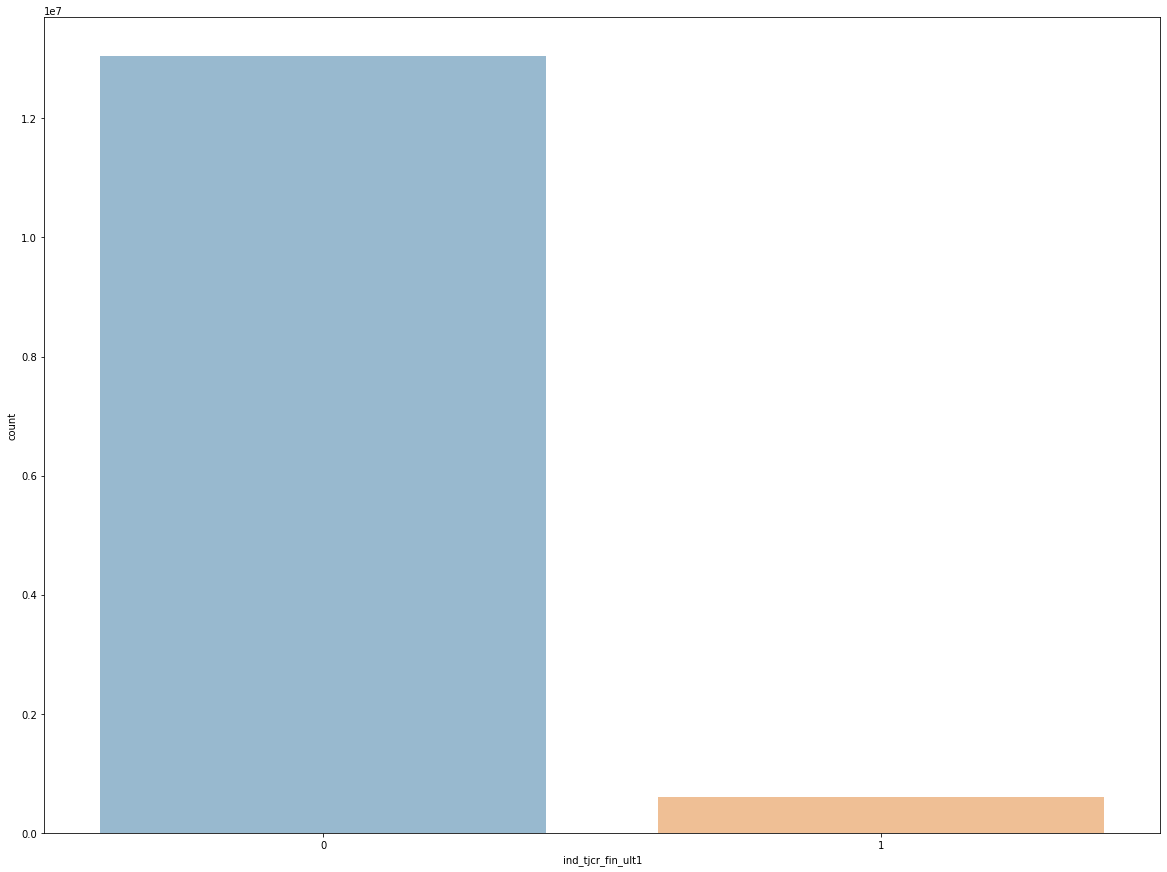

--------------------------------------------------
col :  ind_valo_fin_ult1


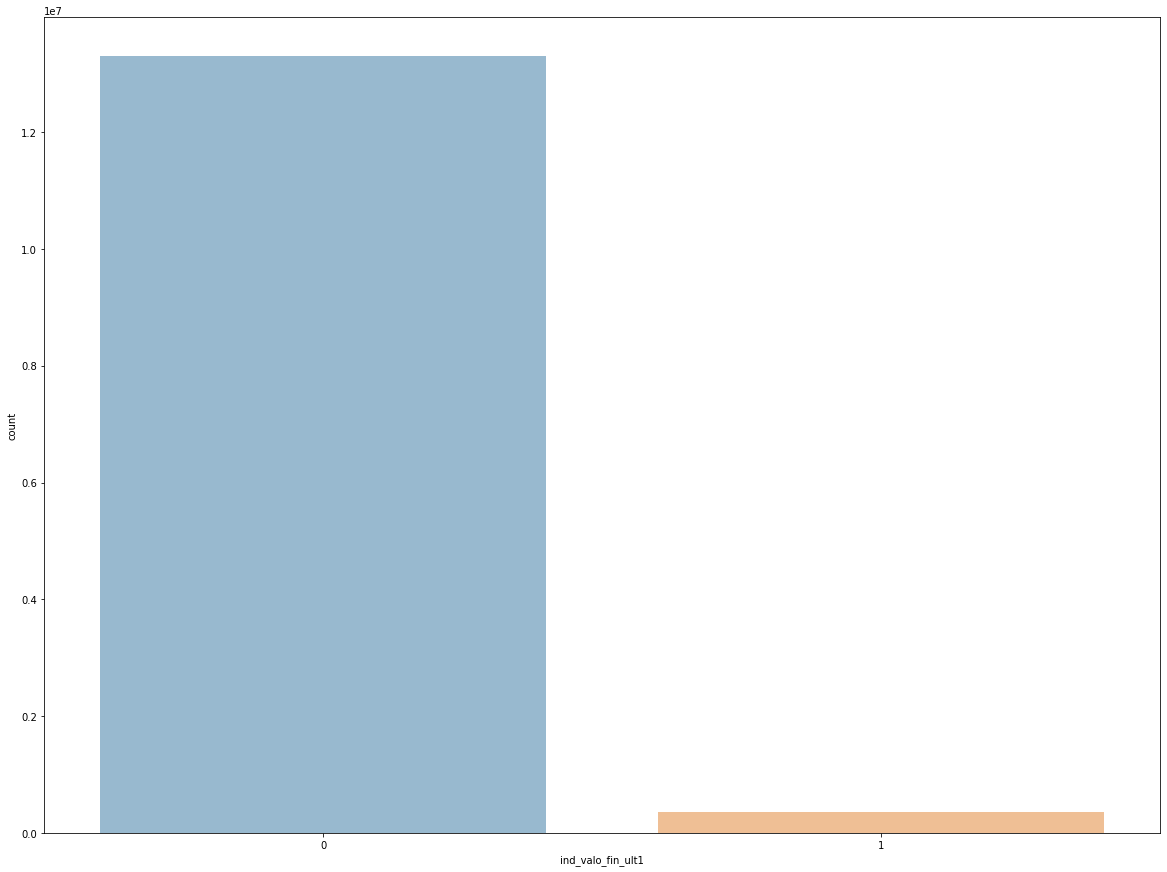

--------------------------------------------------
col :  ind_viv_fin_ult1


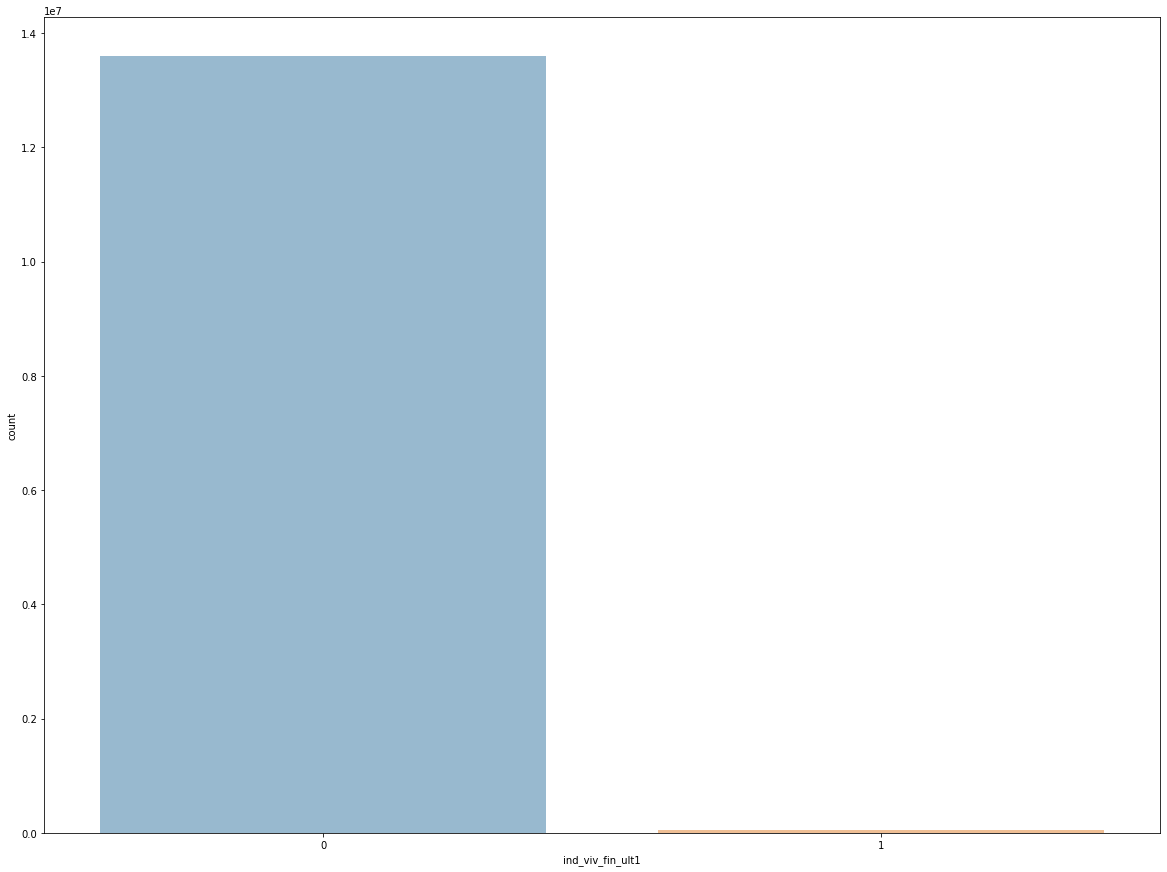

--------------------------------------------------
col :  ind_nomina_ult1


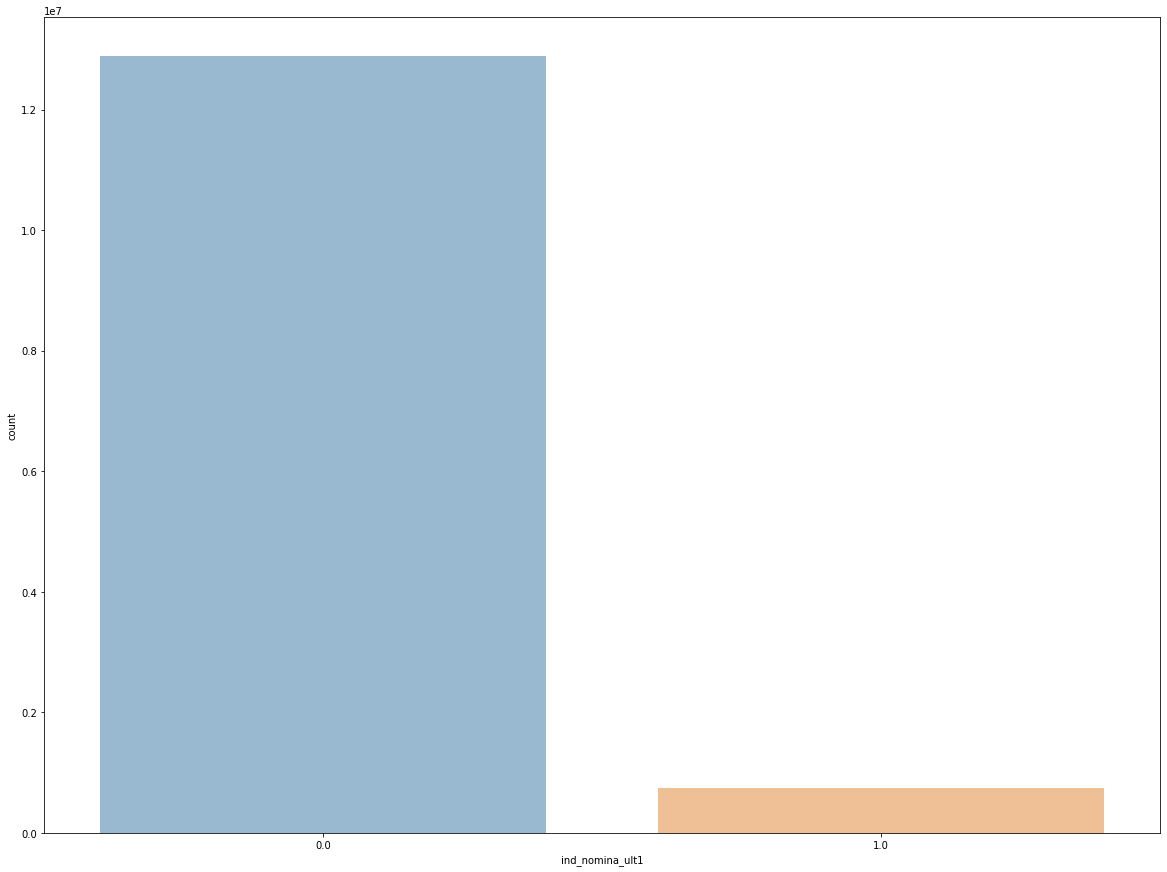

--------------------------------------------------
col :  ind_nom_pens_ult1


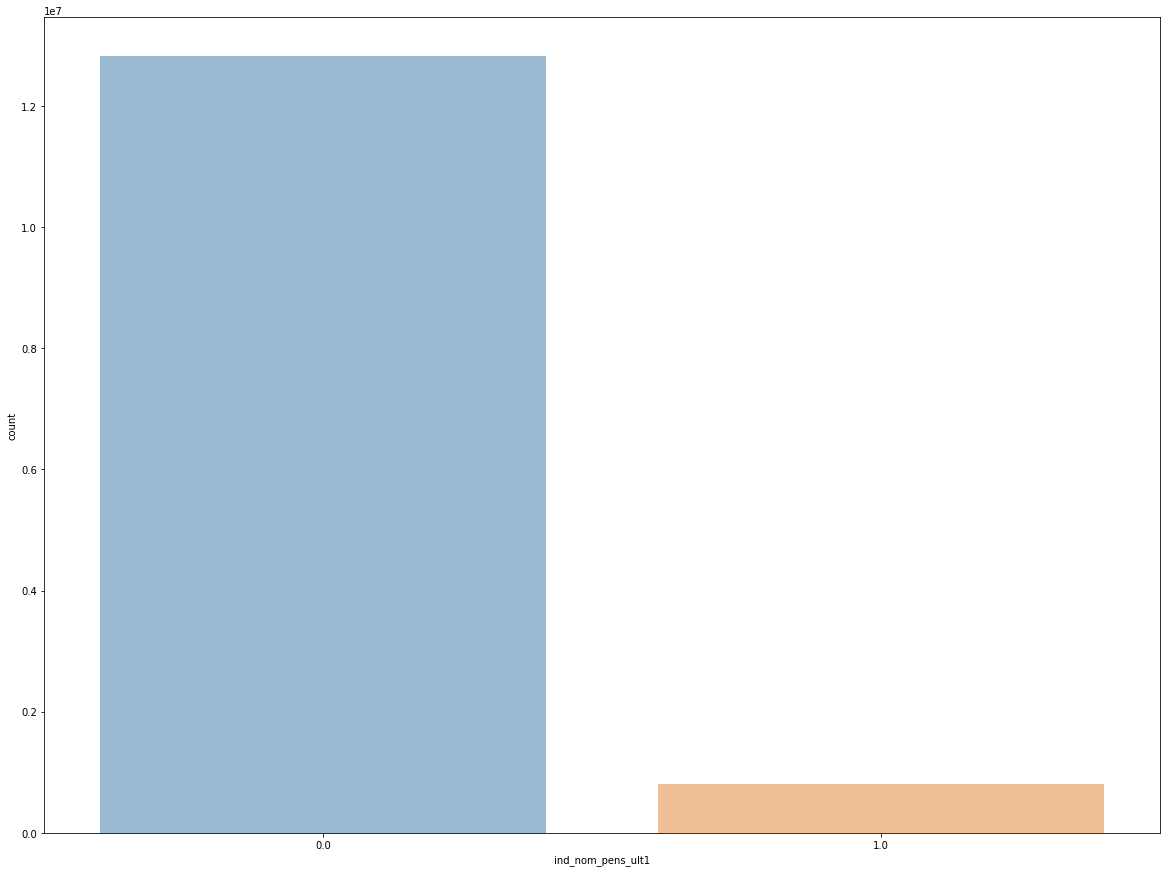

--------------------------------------------------
col :  ind_recibo_ult1


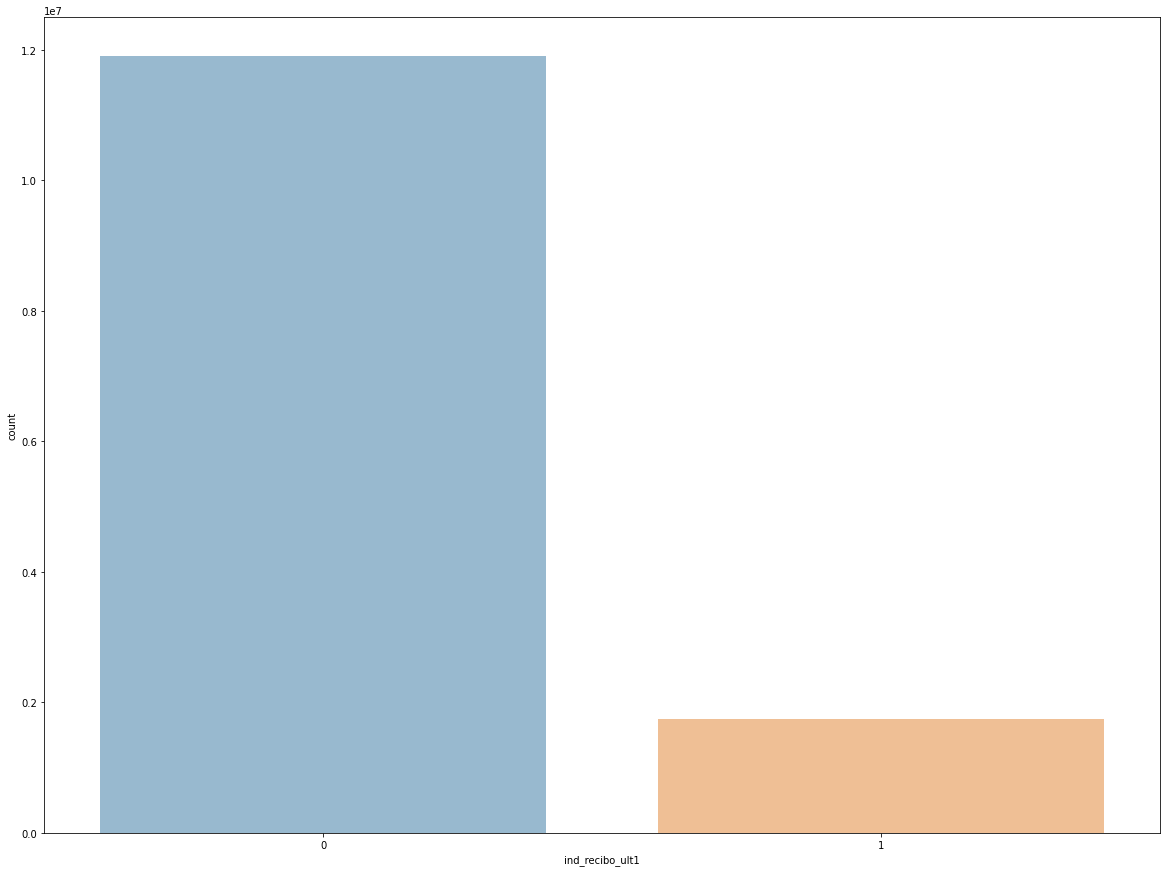

In [ ]:
# 2-9 변수를 막대 그래프로 시각화 하기

skip_cols = ['ncodpers', 'renta']
for col in trn.columns:
  if col in skip_cols:
    continue

  #보기 편하게 영역 구분고 변수명을 출력한다.
  print('-'* 50)
  print('col : ',col)

  f, ax = plt.subplots(figsize=(20,15))
  # seaborn
  sns.countplot(x=col, data=trn, alpha=0.5) #alpha =투명도 0-1사이
  plt.show()

### 시계열 데이터 시각화

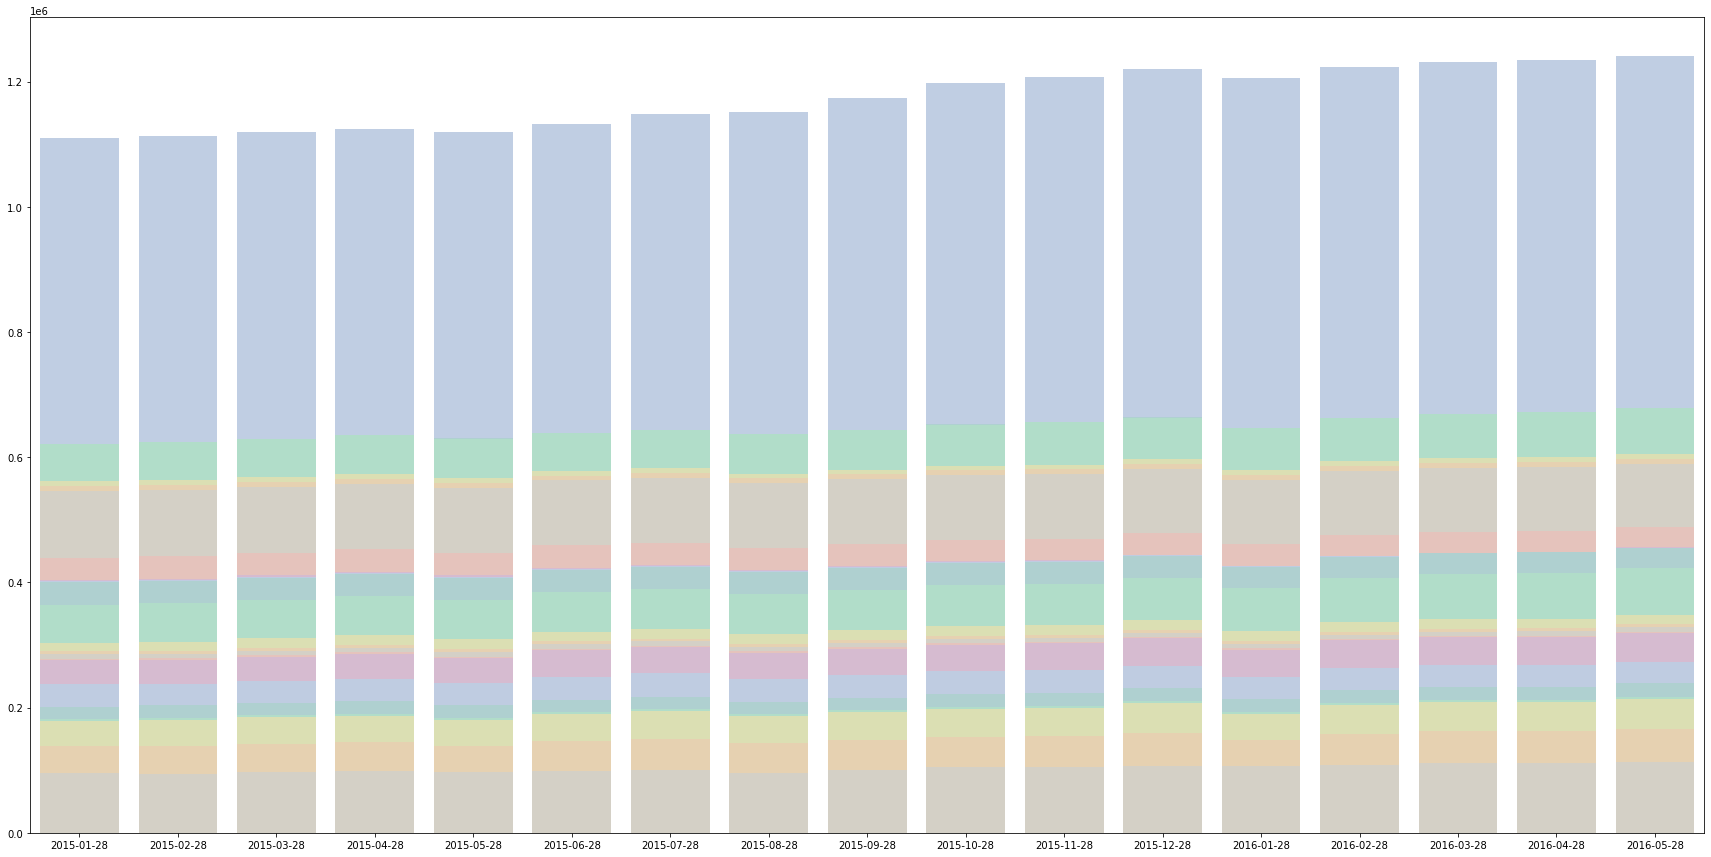

In [ ]:
# 2-10 월별 금융 제품 보유 데이터를 누적 막대 그래프로 시각화하기

#날짜 데이터를 기준으로 분석하기 위하여, 날짜 데이터를 별도로 추출한다.
months = trn['fecha_dato'].unique().tolist()
#제품 변수 24개 추출
label_cols = trn.columns[24:].tolist()

label_over_time = []
for i in range(len(label_cols)):
  #매월, 각 제품의 총합을 groupby().agg('sum')으로 계산하여, label_sum에 저장한다.
  label_sum = trn.groupby(['fecha_dato'])[label_cols[i]].agg('sum')## agg=집계 라벨의 총합을 구하기 위해서 만듬
  label_over_time.append(label_sum.tolist())

label_sum_over_time = []
for i in range(len(label_cols)):
  #누적 막대 그래프를 시각화하기 위해서, n번째 제품의 총합을 1~n번째 제품의 총합으로 만든다.
  label_sum_over_time.append(np.asarray(label_over_time[i:]).sum(axis=0))

color_list = ['#F5B7B1', '#D2B4DE', '#AED6F1','#A2D9CE', '#ABEBC6', '#F9E79F', '#F5CBA7', '#CCD1D1']

# 그림 크기를 사전에 정의한다.
f , ax = plt.subplots(figsize=(30,15))
for i in range(len(label_cols)):
  #x축에는 월 데이터, y축에는 누적 총합, 색깔은 8개를 번갈아 가며 사용하며, 그림의 alpha값은 0.7로 지정한다.
  sns.barplot(x=months, y=label_sum_over_time[i], color = color_list[i%8], alpha=0.7)

#우측 상단에 legend를 추가한다


총 제품 보유 수량이 매달마다 조금씩 상승한다. 고객 숫자가 꾸준이 증가하기 때문이다.

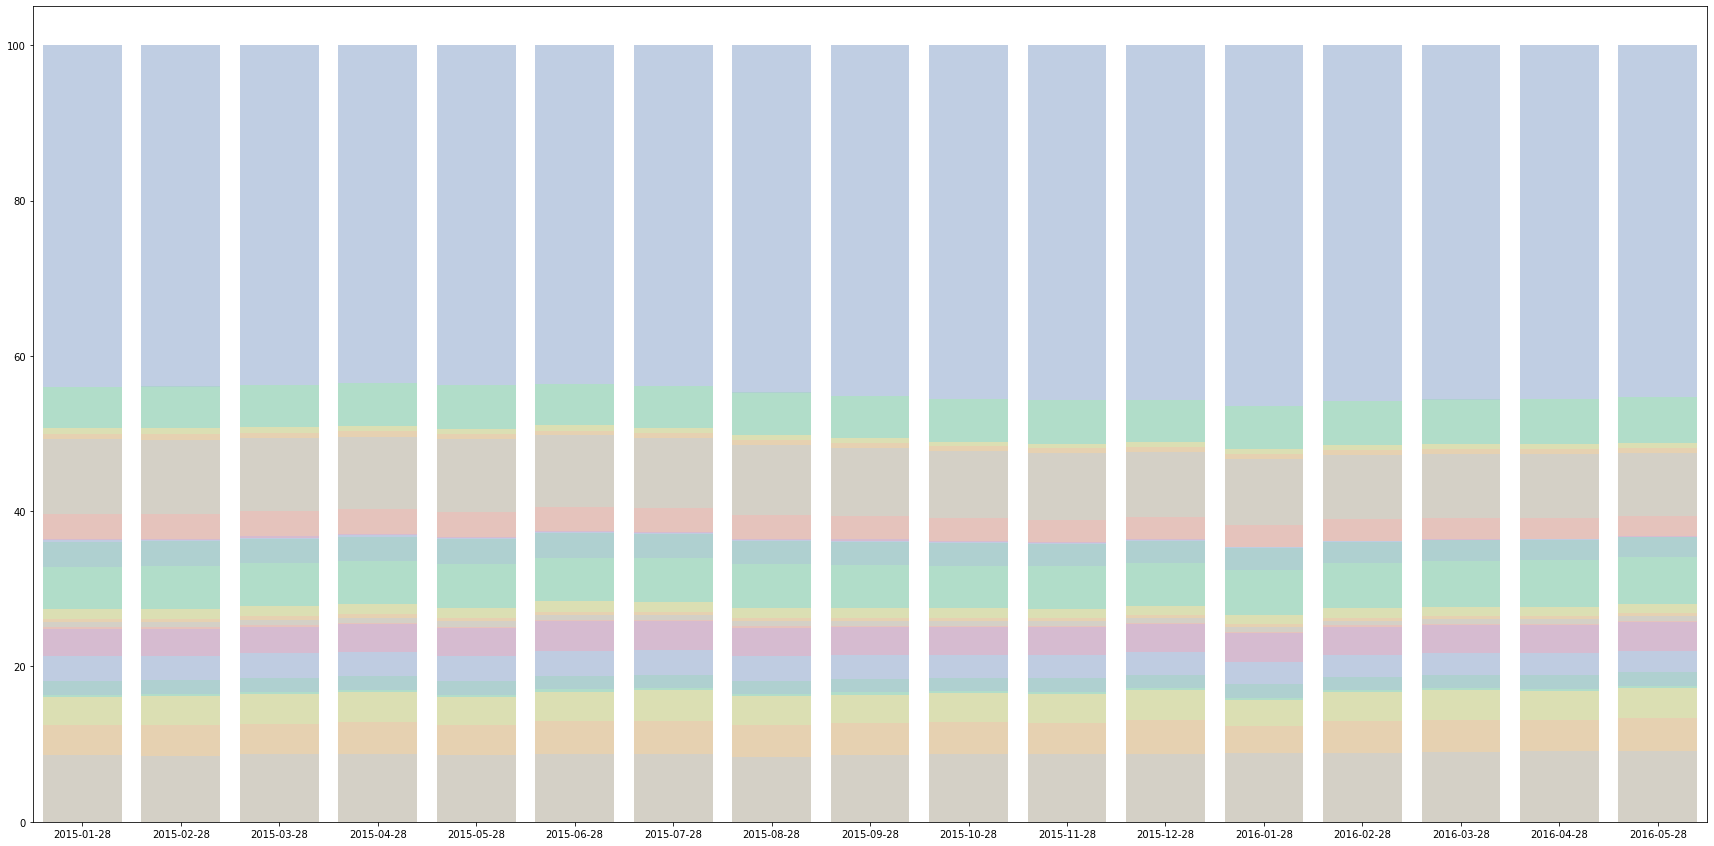

In [ ]:
# 2-11

#label time 을 퍼센트 단위로 변환한다. 월마다 최댓값으로 나누고 100을 곱해준다.

label_sum_percent = (label_sum_over_time / (1.*np.asarray(label_sum_over_time).max(axis=0)))*100

# 앞선 코드와 동일한 시각화 실행코드다.......
f , ax = plt.subplots(figsize=(30,15))
for i in range(len(label_cols)):
  sns.barplot(x=months, y=label_sum_percent[i], color = color_list[i%8], alpha=0.7)

당좌예금은 (ind_cco_fin_ult1)의 보유량은 계절에 상관없이 꾸준히 높다.

예측을 위해 제공되는 변수(24개의 고객변수)보다는 실제로 예측해야하는 변수(24개의 금융제품변수)를 올바르게 분석하여 이해도를 높이는 것이 도움이 된다

1.   데이터 기초 통계와 시각화를 통해 데이터를 직접 눈으로 보기
2.   변수 아이디어를 찾아내기
1.   예측 변수 24개에 대한 특징 찾아내기






예측해야 되는 값은 고객이 신규로 구매할 제품이다. 보유 여부가 0에서 1로 변하는 그 순간에 관심이 잇는것이지 구매 후 지속적으로 해당 제품을 보유하고 있는지에 대해서는 관심이 없다. 앞선 누적 막대 그래프는 제품의 총 보유량을 나타내고 있을뿐, 울별 추이를 나타내고 있지 않다.

In [ ]:
# # 2-12 24개 금융 제품에 대한 '신규구매' 데이터 생성하기

# import pandas as pd
# import numpy as np

# trn = pd.read_csv('/content/train.csv/train_ver2.csv')

# frac = 1./100
# trn = trn.sample(frac=frac, random_state=42)

# cate_cols = [col for col in trn.columns if trn[col].dtype in ['int64','float64']]
# for col in cate_cols:
#     if trn[col].dtype == 'int64':
#         trn[col] = trn[col].astype(np.int8)
#     else:
#         trn[col] = trn[col].astype(np.float32)

# prods = trn.columns[24:].tolist()

# def date_to_int(str_date):
#     Y, M, D = [int(a) for  a in str_date.strip().split('-')]
#     int_date = (int(Y) - 2015)*12 + int(M)
#     return int_date

# trn['int_date'] = trn['fecha_dato'].map(date_to_int).astype(np.int8)

# trn_lag = trn.copy()
# trn_lag['int_date'] += 1
# trn_lag.columns = [col + '_prev' if col not in ['ncodpers', 'int_date'] else col for col in trn.columns]

# df_trn = pd.merge(trn,trn_lag, on=['ncodpers','int_date'], how='left')

# #제품 변수를 prds에 list형태로 저장한다
# # prods = trn.columns[24:].tolist()

# # # 날짜를 숫자로 변환하는 함수다. 15-01-28은 1, 16-06-28은 18로 변환된다. 왜???
# # def date_to_int(str_date):
# #   Y, M, D = [int(a) for a in str_date.strip().split("-")]
# #   int_date = (int(Y)- 2015)*12 +int(M)
# #   return int_date

# # # 날짜를 숫자로 변화하여 int_date에 저장한다
# # trn['int_date'] = trn['fecha_dato'].map(date_to_int).astype(np.int8)

# # # 데이터를 복사하고, int_date 날짜에 1을 더해서 lag를 생성한다. 변수명에 _prev를 추가한다. 왜???
# # trn_lag = trn.copy()
# # trn_lag['int_date'] +=1
# # trn_lag.columns = [col +'_prev' if col not in ['ncodpers', 'int_date'] else col for col in trn.columns]

# # # 원본 데이터와 lag 데이터를 ncodper와 int_date 기준으로 합친다. lag 데이터의 int_date는 1 밀려있기 때문에 저반달의 제품정보가 삽입된다.
# # df_trn = trn.merge(trn_lag, on=['ncodpers', 'int_date'], how = 'left') #????

# # 효율을 위해 불필요한 변수 제거
# del trn, trn_lag

# # 저번달의 제품 정보가 존재하지 않을 경우를 대비해 0으로 대체한다.
# for prod in prods:
#   prev = prod+'_prev'
#   df_trn[prev].fillna(0, inplace = True)

# # 원본 데이터에서의 제품 보유여부 - lag데이터에서의 제품 보유 여부를 비고하여 신규 구매 변수 padd를 구한다
# for prod in prods:
#   padd = prod + '_add' ### _가 뭐임
#   prev = prod + '_prev'
#   df_trn[padd] = ((df_trn[prod]==1)& (df_trn[prev] ==0)).astype(np.int8)

# # 신규 구매 변수만을 추출하여 labels에 저장한다.
# add_cols = [prod + '_add' for prod in prods]
# labels = df_trn[add_cols].copy()
# labels.columns = prods
# labels.to_csv('/content/labels.csv', index= False)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (5,8,11,15) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (5,8,11,15) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


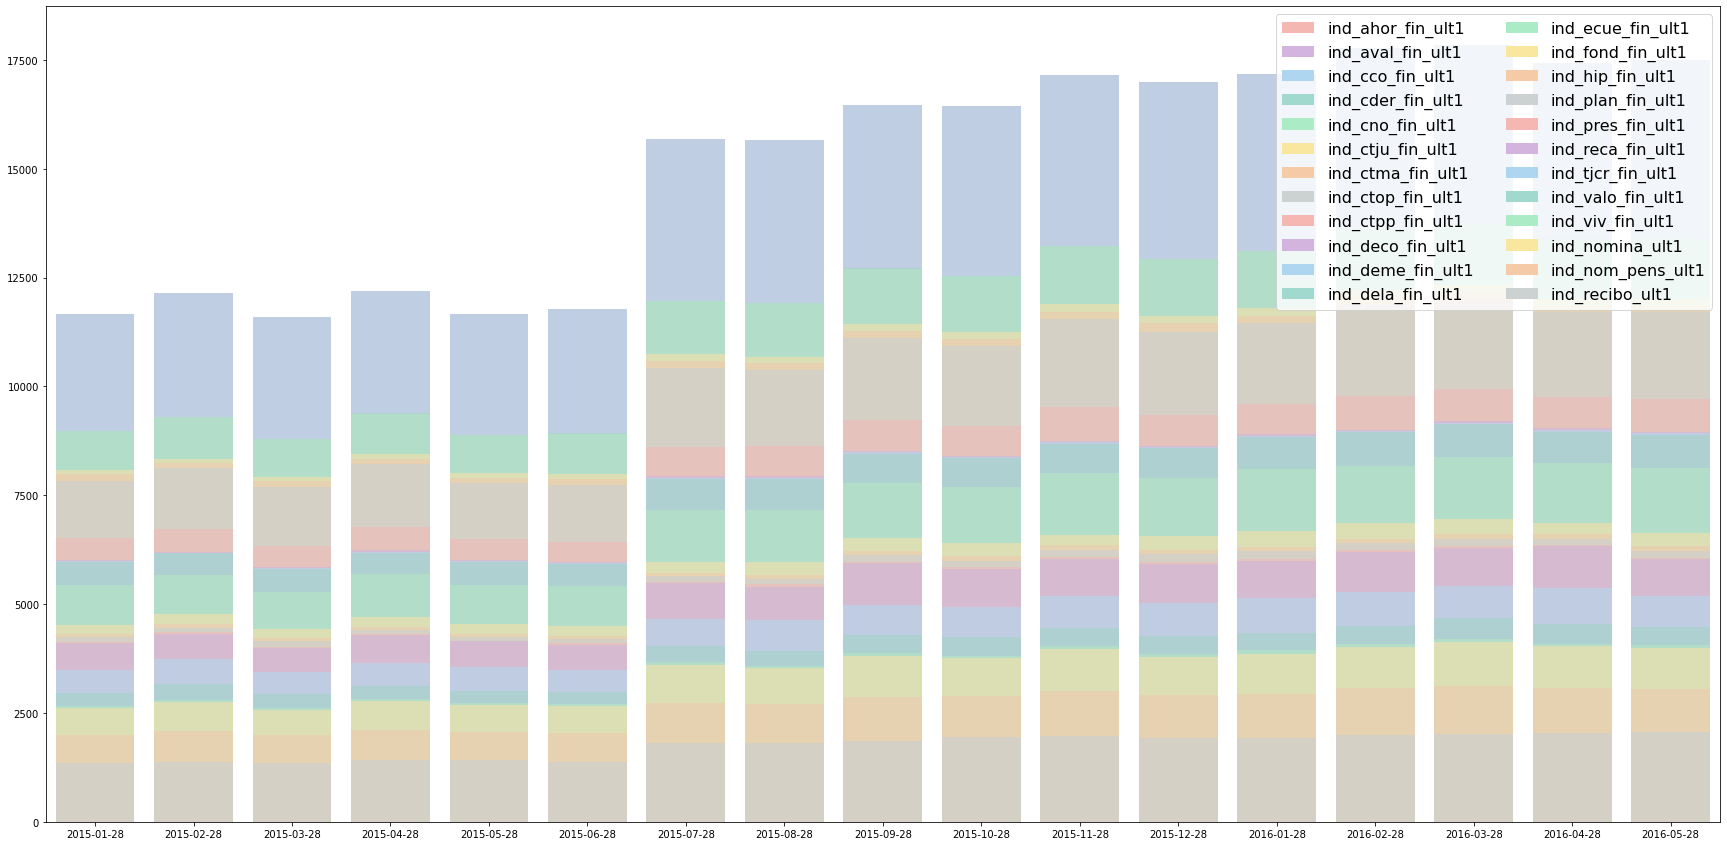

In [ ]:
# 24개 금융 제품에 대한 '신규 구매' 데이터를 생성하기

import pandas as pd
import numpy as np

# 훈련 데이터를 읽어온다

trn = pd.read_csv('/content/train.csv/train_ver2.csv')

# 데이터 크기를 줄인다
frac = 1./50
trn = trn.sample(frac=frac, random_state=42)
fecha_dato = trn['fecha_dato'].copy()
fecha_dato = pd.DataFrame(fecha_dato,columns=['fecha_dato'])

cate_cols = [col for col in trn.columns if trn[col].dtype in ['int64','float64']]
for col in cate_cols:
    if trn[col].dtype == 'int64':
        trn[col] = trn[col].astype(np.int8)
    else:
        trn[col] = trn[col].astype(np.float32)

# 제품 변수를 prods에 list형태로 저장한다
prods = trn.columns[24:].tolist()

# 날짜를 숫자로 변환하는 함수이다. 2015-01-28은 1, 2016-06-28은 18로 변환된다
def date_to_int(str_date):
    Y, M, D = [int(a) for  a in str_date.strip().split('-')]
    int_date = (int(Y) - 2015)*12 + int(M)
    return int_date

# 날짜를 숫자로 변환하여 int_date에 저장한다
trn['int_date'] = trn['fecha_dato'].map(date_to_int).astype(np.int8)

# 데이터를 복사하고, int_date 날짜에 1을 더하여 lag를 생성한다. 변수명에 _prev를 추가한다
trn_lag = trn.copy()
trn_lag['int_date'] += 1
trn_lag.columns = [col + '_prev' if col not in ['ncodpers', 'int_date'] else col for col in trn.columns]


new_df = pd.merge(trn,trn_lag, on=['ncodpers','int_date'], how='left')

# 메모리 효율을 위해 불필요한 변수를 메모리에서 제거한다
del trn, trn_lag

# 저번 달의 제품 정보가 존재하지 않을 경우를 대비하여 0으로 대체한다
for prod in prods:
    prev = prod + '_prev'
    new_df[prev].fillna(0, inplace=True)

# 원본 데이터에서 제품 보유 여부 - lag 데이터에서의 제품 보유 여부를 비교하여
# 신규 구매 변수 product_add를 구한다
for prod in prods:
    product_add = prod + '_add'
    prev = prod + '_prev'
    new_df[product_add] = ((new_df[prod]==1) & (new_df[prev] == 0)).astype(np.int8)

# 신규 구매 변수만을 추출하여 labels에 저장한다
add_cols = [prod + '_add' for prod in prods]
labels = new_df[add_cols].copy()
labels.columns = prods

labels['date'] = fecha_dato['fecha_dato']
months = np.unique(fecha_dato['fecha_dato']).tolist()
label_cols = labels.columns.tolist()[:24]

label_over_time = []
for i in range(len(label_cols)):
    label_over_time.append(labels.groupby(['date'])[label_cols[i]].agg('sum').tolist())

label_sum_over_time = []
for i in range(len(label_cols)):
    label_sum_over_time.append(np.asarray(label_over_time[i:]).sum(axis=0))

color_list = ['#F5B7B1','#D2B4DE','#AED6F1','#A2D9CE','#ABEBC6','#F9E79F','#F5CBA7','#CCD1D1']

f, ax = plt.subplots(figsize=(30,15))
for i in range(len(label_cols)):
    sns.barplot(x=months, 
                y=label_sum_over_time[i], 
                color=color_list[i%8], 
                alpha=0.7)

plt.legend([plt.Rectangle((0,0),1,1,fc=color_list[i%8],edgecolor = 'none') for i in range(len(label_cols))], label_cols, loc=1,ncol=2,prop={'size':16})

KeyError: ignored

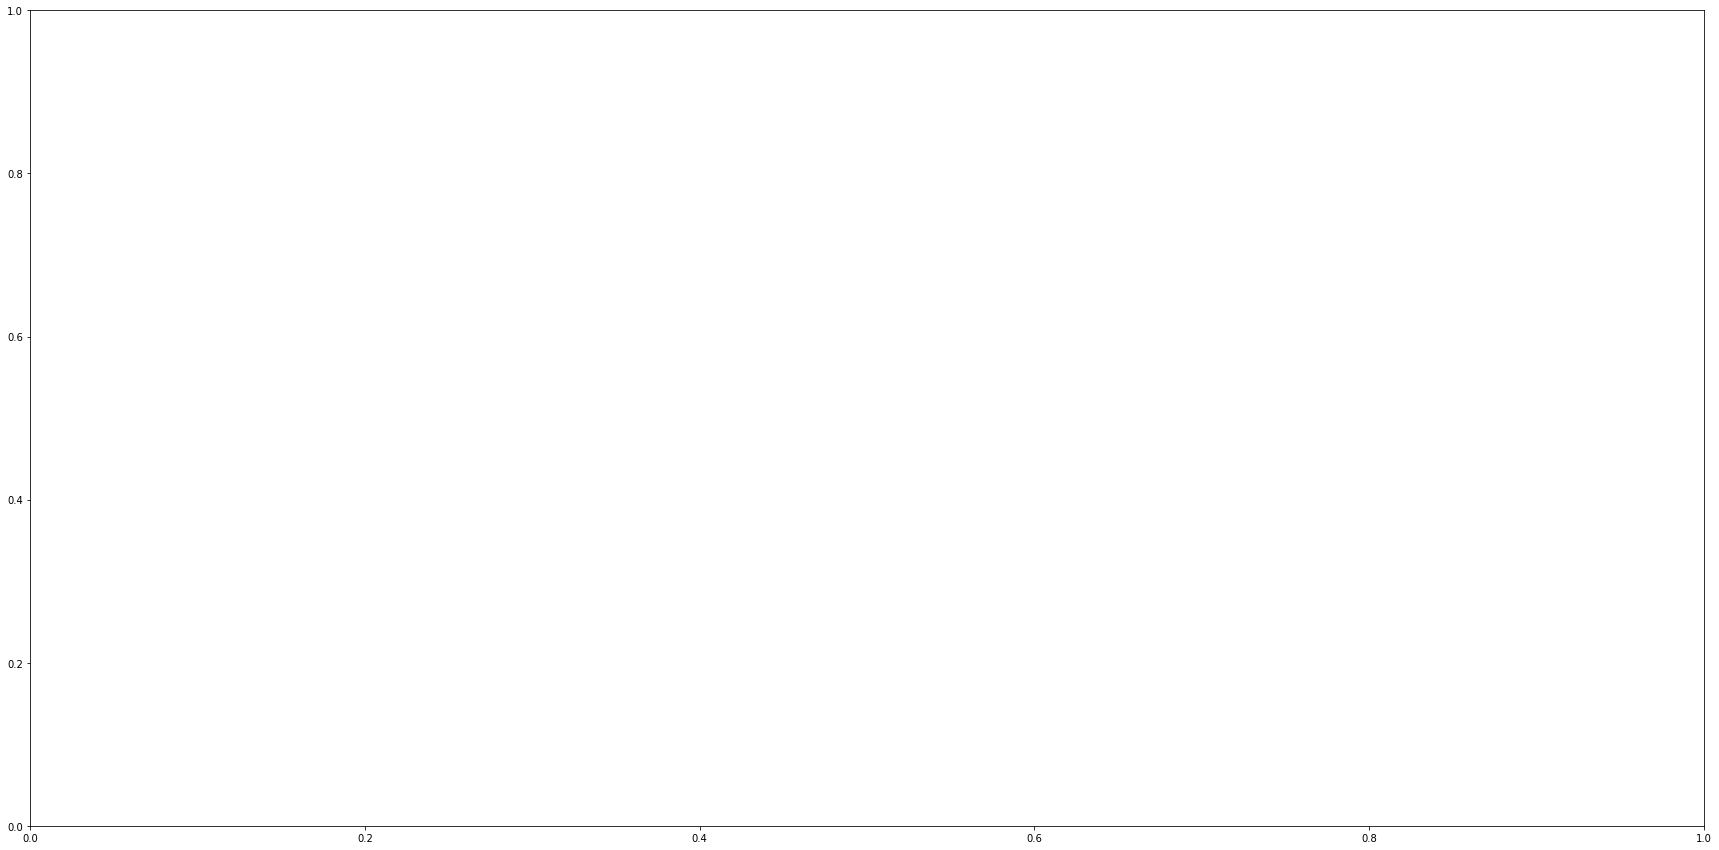

In [ ]:
# # 2-13 월별 신규 구매 데이터를 누적 막대 그래프로 시각화 하기

# labels = pd.read_csv('/content/labels.csv').astype(int)
# fecha_dato = pd.read_csv('/content/train.csv/train_ver2.csv', usecols=['fecha_dato'])

# # 데이터 크기를 줄인다
# fecha_dato = fecha_dato.sample(frac=frac, random_state=42)

# labels['date'] = fecha_dato.fecha_dato
# months = np.unique(fecha_dato.fecha_dato).tolist()
# label_cols = labels.columns.tolist()[:24]

# label_over_time = []
# for i in range(len(label_cols)):
#   label_over_time.append(labels.groupby(['date'])[label_cols[i]].agg('sum').tolist())

# label_sum_over_time = []
# for i in range(len(label_cols)):
#   label_sum_over_time.append(np.asarray(label_over_time[i:]).sum(axis=0))

# color_list = ['#F5B7B1', '#D2B4DE', '#AED6F1','#A2D9CE', '#ABEBC6', '#F9E79F', '#F5CBA7', '#CCD1D1']

# # 그림 크기를 사전에 정의한다.
# f , ax = plt.subplots(figsize=(30,15))
# for i in range(len(label_cols)):
#   sns.barplot(x=months, y=label_sum_over_time[i], color = color_list[i%8], alpha=0.7)

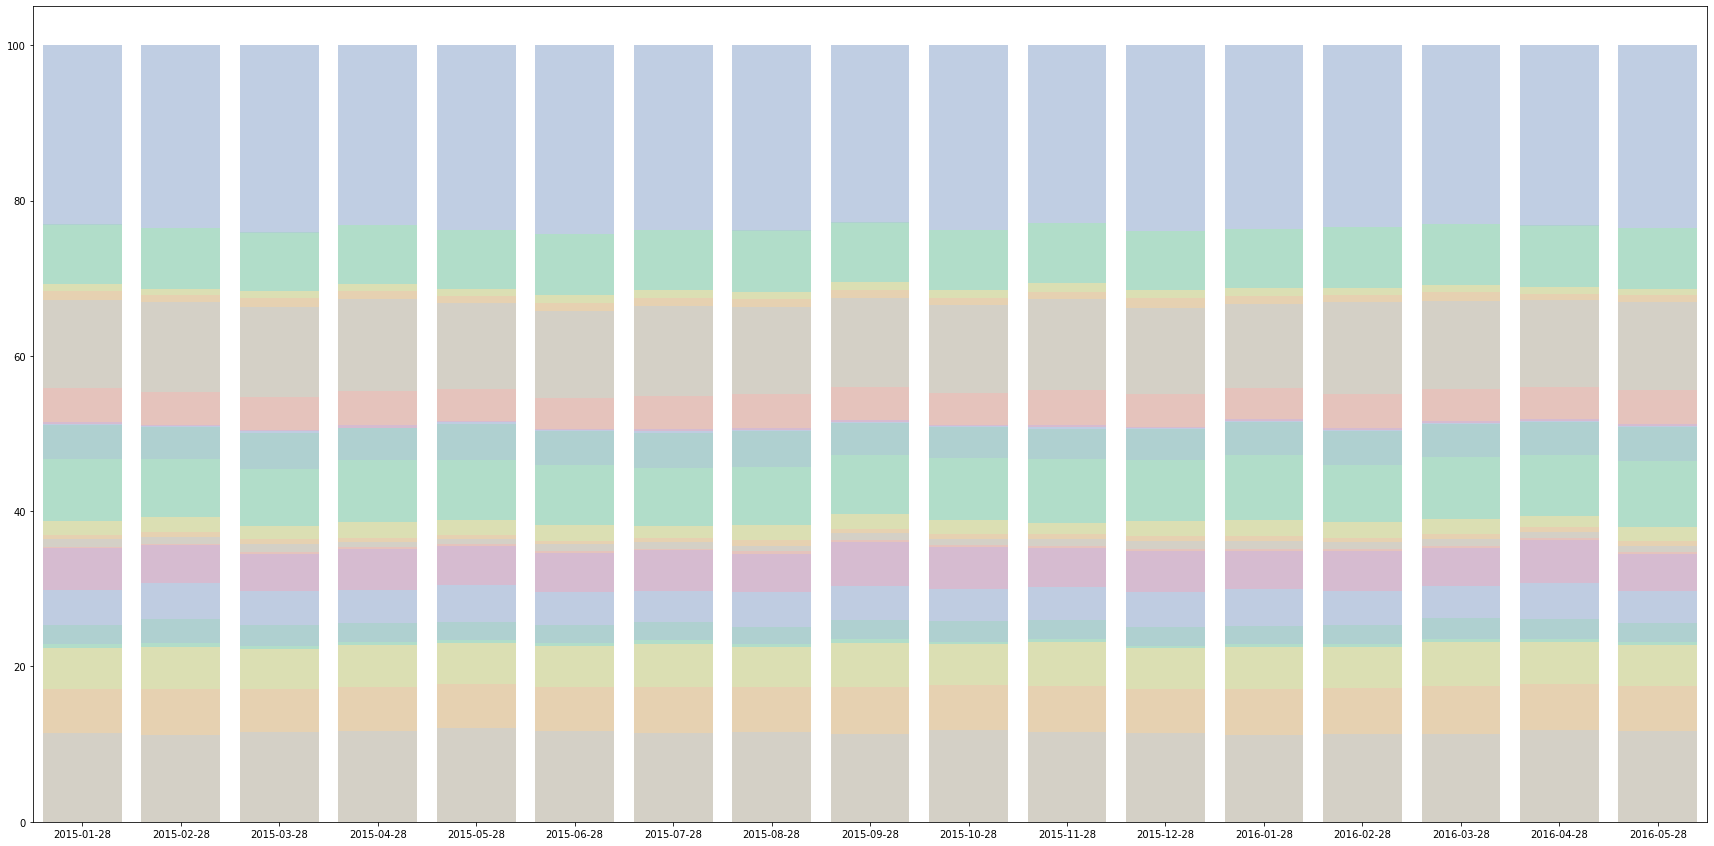

In [ ]:
#2-14 월별 신규 구매 데이터를 누적 막대 그래프로 시각화 하기 : 절댓값이 아닌 월별 상대값으로 시각화

#label time 을 퍼센트 단위로 변환한다. 월마다 최댓값으로 나누고 100을 곱해준다.

label_sum_percent = (label_sum_over_time / (1.*np.asarray(label_sum_over_time).max(axis=0)))*100

# 앞선 코드와 동일한 시각화 실행코드다.......
f , ax = plt.subplots(figsize=(30,15))
for i in range(len(label_cols)):
  sns.barplot(x=months, y=label_sum_percent[i], color = color_list[i%8], alpha=0.7)



*   당좌 예금은 8월 여름에가장 높은 값을 가지며, 겨울에는 축소한다.

*   단기 예금은 15-06-28에 특이하게 높은 값을 가지며 다른시기에는 매우 낮다.
*   급여, 연금은 당좌 에금과 반대로 8월에 가장 낮고 16-02-28에 가장 높았다.


*   신규 구매 빈도가 가장 높은 값은 당돠예금, 신용카다, 급여, 연금 그리고 직불카드 순이다.



데이터가 계절성을 띈다는ㄱ 서은 훈련 데이터를 몇월로 지정하는가에 따라 결과물이 달라질수있다. 계절 변동성을 모델링할것인지 선택해야한다.

### 탐색적 데이터 분석 요약



1.   기초통계를 통하여 Raw Data를 분석
2.   시각화를 통해서 Raw Data를 분석



pandas가 지원하는 기초 통계함수

*   .read_csv() : csv파일을 메모리에 불러온다

*   .head() : 첫 5줄을 미리보기한다.
*   .tail() : 마지막 5줄을 미리보기 한다.

*   .info() : 데이터 프레임에 대한 정보를 소개한다.

*   .shape() : 데이터 프레임 크기를 확인한다.
*   .mean() : 변수별 평균값을 구한다.


*   .std() : 변수별 표준편차값을 구한다.




*   .isnull : 결측값 여부를 확인한다.

*   .describe() : 변수별 기초통계 등을 확인한다.

*   .unique() : 변수의 고유값을 확인한다.
*   .value_counts() : 변수의 고유값들의 빈도 순위를 확인한다.

*   .dtype() : 변수의 data type을 확인한다.





시각화를 위한 기초 함수


*   .plot() : 1-D, 2-D 데이터 선 그래프를 시각화 한다.

*   .hist() : 막대 그래프를 시각화한다.

*   .scatter(x,y) : 산점도를 시각화 한다.

*   .matshow(array) : 2-D 데이터를 heatmap그래프로 시각화 한다.

*   DF.plot() : 변수를 선 그래프로 시각화 한다.
*   DF.plot.hist() : 막대그래프를 시각화 한다.


*   DF.plot.box() : Box그래프를 시각화 한다.


*   DF.plot.kde() : 밀도 그래프를 시각화 한다.

## Baseline 모델



1.   데이터 전처리
1.   피처 엔지니어링
2.   머신러닝 모델 학습
2.   테스트 데이터 예측 및 캐글 업로드



### 1) 데이터 전처리



*   제품 변수가 결측값을 0으로 대체한다. 제품 보유 여부에 대한 정보가 없다면 없음으로 가정한다.

*   훈련 데이터와 테스트 데이터를 통합한다. 두 데이터는 날짜 변수로 구분이 가능하다. 테스트 데이터에 없는 24개 제품 변수는 0으로 채운다.
*   범주형, 수치형 데이터를 전처리 한다. 범주형은 .factorize()를 통해 Label Encoding을 수행한다. 데이터 타입이 object로 표현되는 수치형 데이터에는 .unique()를 통해 특이값을 대체하거나 제거하고, 정수형 데이터로 변환한다.


*   추후, 모델 학습에 사용할 변수 이름을 features리스트에 미리 담는다.



In [ ]:
# 2-15 Baseline 모델의 데이터 전처리 코드

import pandas as pd
import numpy as np
import xgboost as xgb

np.random.seed(2018)

# 데이터를 불러온다.
trn = pd.read_csv('/content/train.csv/train_ver2.csv')
tst = pd.read_csv('/content/test.csv/test_ver2.csv')

## 데이터 전처리##

# 제품 변수를 별도로 저장해 놓는다.
prods = trn.columns[24:].tolist()

# 제품 변수 결측값을 미리 0으로 대체한다.
trn[prods] = trn[prods].fillna(0,0).astype(np.int8)

# 24개 제품 중 하나도 보유하지 않는 고객 데이터를 제거한다.
no_product = trn[prods].sum(axis=1) == 0
trn = trn[~no_product]

# 훈련 데이터와 테스트 데이터를 통합한다. 데이터 없는 부분은 0으로 채운다.
for col in trn.columns[24:]:
  tst[col] = 0
df = pd.concat([trn,tst], axis=0)

# 학습에 사용할 변수를 담는 list이다.
features = []

# 범주형 변수를 .factorize()함수를 통해 label encoding한다.
categorical_cols = ['ind_empleado', 'pais_residencia', 'sexo', 'tiprel_lmes', 'indresi', 'indext', 'conyuemp', 'canal_entrada', 'indfall','tipodom', 'nomprov', 'segmento']
for col in categorical_cols:
  df[col],_= df[col].factorize(na_setinel =-99)
fetures +=categorical_cols

# 수치형 변수의 특이값과 결측값을 -99로 대체하고, 정수형으로 변환한다.
df['age'].replace('NA', -99, inplace =True)
df['age'] = df['age'].astype(np.int8)

df['antiguedad'].replace('NA', -99, inplace=True)
df['aantiguedadge'] = df['antiguedad'].astype(np.int8)

df['renta'].replace('NA', -99, inplace=True)
df['renta'].fillna(-99,inplace = True)
df['renta'] = df['renta'].astype(np.int8)

df['indrel_lmes'].replace('NA', -99, inplace=True)
df['indrel_lmes'].fillna(-99,inplace = True)
df['indrel_lmes'] = df['indrel_lmes'].astype(float).astype(np.int8)

# 학습에 사용할 수치형 변수를 features에 추구한다.
features += [ 'age', 'antiguedad', 'renta', 'ind_nuevo', 'indrel', 'indrel_lmes', 'ind_actividad_cliente']


/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (5,8,11,15) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (15) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


ValueError: ignored

### 2)피처 엔지니어링

머신러닝 모델 학습에 사용할 파생 변수를 생성한다. Baseline 모델에서는 전체 24개의 고객 변수와 4개의 날짜 변수 기반 파생변수 그리고 24개의 lag-1변수를 사용한다.

시계열 데이터에서는 고객의 과거 데이터를 기반으로 다양한 파생 변수를 생성할 수있다. 고객의 나이가 최근 3개월간 변동이 있엇는질를 이진변수로 생성하거나 한달전 구매한 제품에 대한 정보를 변수로 사용할수있고 최근 6개월 평균 월급을 계산할수있다.

In [ ]:
# 2-16 Baseline 모델 피처 엔지니어링 코드

# (피처 엔지니어링)두 날짜 변수에서 연도와 월 정보를 추출한다.
df['fecha_alta_month'] = df['fecha_alta'].map(lambda x: 0.0 if x.__class__ is float else float(x.split('-')[1]))astype(np.int8)
df['fecha_alta_year'] = df['fecha_alta'].map(lambda x: 0.0 if x.__class__ is float else float(x.split('-')[0]))astype(np.int16)
features += ['fecha_alta_month', 'fecha_alta_year']

df['ult_fec_cli_it_month'] = df['ult_fec_cli_it'].map(lambda x: 0.0 if x.__class__ is float else float(x.split('-')[1]))astype(np.int8)
df['ult_fec_cli_it_year'] = df['ult_fec_cli_it'].map(lambda x: 0.0 if x.__class__ is float else float(x.split('-')[0]))astype(np.int16)
features += ['ult_fec_cli_it_month', 'ult_fec_cli_it_year']

# 그 외 변수의 결측값은 모두 -99로 대체한다.
df.fillna(-99, inplace=True)

#(피처 엔지니어링) lag-1 데이터를 생성한다.
# 코드 2-12와 유사한 코드 흐름이다.

# 날짜를 숫자로 변환하는 함수다. 15-01-28은 1, 16-06-28은 18로 변환한다.
def date_to_int(str_date):
  Y, M, D = [int(a) for a in str_date.strip().split("-")]
  int_date = (int(Y)- 2015)*12 +int(M)
  return int_date

# 날짜를 숫자로 변환하여 int_date에 저장한다.
df['int_date'] = df['fecha_dato'].map(date_to_int).astype(np.int8)

# 데이터를 복사하고, int_date 날짜에 1을 더해서 lag를 생성한다. 변수명에 _prev를 추가한다.
df_lag = df.copy()
df_lag.columns = [col + '_prev' if col not in ['ncodpers', 'int_date'] else col for col in df.columns]
df_lag['int_date'] +=1

# 원본 데이터와 lag데이터를 ncodper와 int_date 기준으로 합친다.
# lag 데이터의 int_date는 1밀려있기 때문에 저번달의 제품 정보가 삽입된다.
df_trn = trn.merge(trn_lag, on=['ncodpers', 'int_date'], how = 'left') #????

# 효율을 위해 불필요한 변수 제거
del df, df_lag

# 저번달의 제품 정보가 존재하지 않을 경우를 대비해 0으로 대체한다.
for prod in prods:
  prev = prod+'_prev'
  df_trn[prev].fillna(0, inplace = True)
df_trn.fillna(-99, inplace=True)

# lag-1 변수를 추가한다.
features += [feature + '_prev' for feature in features]
features += [prod + '_prev' for prod in prods]

###
### Baseline 모델 이후, 다양한 피처 엔지니어링을 여기에 추가한다

### 3) 머신러닝 모델 학습

총 1년 6개월치의 데이커가 훈련데이터로 제공이 되고 예측 데이터는 16-06-28 미래의 데이터이다.

In [ ]:
# 2-17 교차검증을 위해 데이터 분리하기 : 훈련 데이터 전체를 사용하지 않고 2016년도만 사용하도록 추출하는 부분은 피처 엔지니어링에 해당 될수 잇다.

## 모델 학습
# 학습을 위하여 데이터를 훈련, 테스트용으로 분리한다.
# 학습에는 16-01-28 - 16-04-28 데이터만 사용하고, 검증에는 16-05-28 데이터를 사용한다.
use_dates = ['2016-01-28', '2016-02-28', '2016-03-28', '2016-04-28', '2016-05-28']
trn = df_trn[df_trn['fecha_dato'].isin(use_dates)]
tst = df_trn[df_trn['fecha_dato']=='2016-06-28']
del df_trn

# 훈련 데이터에서 신규 구매 건수만 추출한다.
X=[]
Y= []
for i, prod in enmuerate(prods):
  prev = prod +'_prev'
  prX = trn[(trn[prod] == 1) & (trn[prev] == 0)]
  prY = np.zeros(prX.shape[0], dtype=np.int8) +i
  X.append(prX)
  Y.append(prY)
XY = pd.concat(X)
Y = np.hstack(y)
XY['y'] = Y

# 훈련, 검증 데이터로 분리한다.
vld_date = '2016-05-28'
XY_trn = XY[XY['fecha_dato']!= vld_date]
XY_vld = XY[XY['fecha_dato']== vld_date]

#### 모델

XGBoost 모델을 사용한다.


*   max_depth: 트리 모델의 최대 깊이를 의미한다. 값이 높을 수록 더 복잡한 트리 모델을 생헝하며 과적합의 원인이 될 수 있다.

*   eta : 딥러닝에서의 lr과 같은 개념이다. 0~1 사이의 값을 가진다.
*   colsample_bytree : 트리를 생성할 때 훈련 데이터에서 변수를 샘플링해주는 비율이다. 모든 트리는 전체 변수의 일부만을 학습하여 서로의 약점을 보완해준다. 0.6~0.9를 사용한다.

*   colsample_bylevel : 트리의 레벨 별로 훈련 데이터의 변수를 샘플링 해주는 비율이다. 0.6~0.9를 사용한다.




최적 파라미터 튜닝 보다는 피처 엔지니어링에 더 많은 시간을 투자해라

In [ ]:
# 2-18 XGBoost 모델을 훈련 데이터에 학습하는 코드

# XGBoost 모델 parameter를 설정한다.
param ={
    'booster' : 'gbtree',
    'max_depth' : 8 ,
    'nthread' : 4 ,
    'num_class' : len(prods)
    'objective' : 'multi:softprob',
    'silent' : 1,
    'eval_metric': 'mlogloss',
    'eta' : 0.1 ,
    'min_child_weight' : 10 ,
    'colsample_bytree' : 0.8 , 
    'colsample_bylevel' : 0.9 , 
    'seed' : 2018,
    }

# 훈련, 검증 데이터를 XGBoost 형대로 변환한다.
X_trn = XY_trn.as_matrix(columns = features)
Y_trn = XY_trn.as_matrix(columns=['y'])
dtrn = xgb.DMatrix(X_trn, label=Y_trn, feature_names=features)

X_vld = XY_trn.as_matrix(columns = features)
Y_vld = XY_trn.as_matrix(columns=['y'])
dvld = xgb.DMatrix(X_vld, label=Y_vld, feature_names=features)

#XGBoost 모델을 훈련데이터로 학습한다.
watch_list = [(dtrn, 'train'), (dvld, 'eval')]
model = xgb.train(param, dtrn, num_boost_round=1000, evals=watch_list, early_stopping_rounds=20)

# 학습한 모델을 저장한다.
import pickle
pickle.dump(model, open("model/xgb.baseline.pkl", 'wb'))
best_ntree_limit = model.best_ntree_limit

#### 교차검증

In [ ]:
# 2-19 검증 데이터에 대한 MAP@7 값을 구하는 코드

# MAP@7 평가척도를 위한 준비작업이다.
vld = trn[trn['fecha_dato'] == vld_date]
ncodpers_vld = vld.as_matrix(columns = ['ncodpers'])
# 검증 데이터에서 신규 구매를 구한다.
for pord in prods:
  prev = prod + '_prev'
  padd = prod + '_add'
  vld[padd] = vld[prod] - vld[prev]
add_vld = vld.as_matrix(columns=[prod + '_add' for prod in prods])
add_vld_list = [list() for i in range(len(ncodpers_vld))]

# 고객별 신규 구매 정답값을 add_vld_list에 저장하고, 총 count를 count_vld에 저장한다.
count_vld = 0
for ncodper in range(len(ncodper_vld)):
  for prod in range(len(prods)):
    if add_vld[ncodper,prod] > 0:
      add_vld_list[ncodper].append(prod)
      count_vld +=1
# 검증 데이터에서 얻을 수 있는 MAP@7 최고점을 미리 구한다.(0.042663)
print(mapk(add_vld-list, add_vld_list, 7,0,0))

# 검증 데이터에 대한 예측 값을 구한다.
X_vld = vld.as_matrix(columns = features)
Y_vld = vld.as_matrix(columns = ['y'])
dvld = xgb.DMatrix(X_vld, label=Y_vld, feature_names=features)
preds_vld = model.predict(dvld, ntree_limit=best_ntree_limit)

# 저번 달에 보유한 제품은 신규 구매가 불가하기 때문에, 확률값에서 미리 1을 빼준다
pred_vld = preds_vld - vld.as_matrix(columns=[prod+'_prev' for prod in prods])

# 검증 데이터 예측 상위 7개를 추출한다.
result_vld = []
for ncodper, pred in zip(ncodpers_vld, preds_vld):
  y_prods = [(y,p,ip) for y,p,ip in zip(pred, prods, range(len(prods)))]
  y_prods = sorted(y_prods, key=lambda a: a[0], reverse=True)[:7]
  result_vld.append([ip for y, p, ip in y_prods])

# 검증 데이터에서의 MAP@7점수를 구한다 (0.036466)
print(mapk(add_vld_list, result_vld, 7, 0.0))

## 2.8 승자의 지혜 - 8등 소스코드 분석

## 1)데이터 준비

In [ ]:
# 2-21 데이터를 준비하는 코드
def clean_data(fi, fo, header, suffix):

  #fi: 훈련/테스트 데이터를 읽어오는 file iterator
  #fo: 통합되는 데이터가 write되는 경로
  #header: 데이터의 header 줄을 추가 할것인지를 걸정하는 boolean
  #suffix: 훈련 데이터에는 48개의 변수가 있고, 테스트 데이터에는 24개의 변수만 있다. 부족한부분은 공백으로 채운다.
  #csv의 첫줄, 즉 header를 읽어온다.

  head = fi.readline().strip('\n'.split(','))
  head = [h.strip('"') for h in head]

  # 'nomprov' 변수의 위치를 ip에 저장한다.
  for i, h in enumerate(head):
    if h == 'nomprov':
      ip = i

  #heder가 True일 경우에는, 저장할 파일의 header를 write 한다.
  if header:
    fo.write('%s\n'% ','.join(head))

  # n은 읽어온 변수의 개수를 의미한다. (훈련 데이터 : 48, 테스트 데이터 : 24)
  n = len(head)
  for line in fi:
    # 파일의 내용을 한줄 씩 읽어와서, 줄바꿈(\n)과 ','으로 분리한다.
    fields = line.strip('\n').split(',')
    # 'nomprov'변수에 ','을 포함하는 데이터가 존재한다. ','으로 분리 된 데이터를 다시 조합한다.
    if len(fields)>n:
      prov = fields[ip + fields[ip+1]]
      del fields[ip]
      fields[ip] = prov

    # 데이터 개수가 n개와 동일한지 확인하고, 파일에 write한다. 테스트 데이터의 경우, suffix는 24개의 공백이다.
    assert len(fields) == n
    fields = [field.strip() for field in fields]
    fo.write('%s%s\n' % (','.join(fields), suffix))

# 하나의 데이터를 통합하는 코드를 실행한다. 먼저 훈련 데이터를 write하고, 그 다음으로 테스트 데이터를 write한다.
# 이제부터 하나의 dataframe만을 다루며 데이터 전처리를 진행한다.
with open('...', 'w') as f:
  clean_data(open('...'), f, True,'')
  comma24 = ''.join([',' for i in range(24)])
  clean_data(open('...'), f, False, comma24)

In [ ]:
#2-22 main.py에서 필요한 라이브러리를 불러오는 코드

import math    
import io    

# 파일 압축 용도
import gzip    
import pickle    
import zlib    

# 데이터, 배열을 다루기 위한 기본 라이브러리
import pandas as pd 
import numpy as np

# 범주형 데이터를 수치형으로 변환하기 위한 전처리 도구
from sklearn.preprocessing import LabelEncoder

import engines
from utils import *

np.random.seed(2016)
transformers = {}

### 1) 데이터 전처리 - 2) 피처 엔지니어링

make_data()에서는 데이터 전처리와 피처 엔지니어링을 굳이 별도의 파이프라인으로 분리하지 않고 동시에 수행하고있다.

In [ ]:
# 2-23 제품 변수에 대한 결측값을 대체하고, 데이터 전처리/ 피처 엔지니어링을 수행한다.

# “데이터 준비”에서 통합한 데이터를 읽어온다
fname = "..."
train_df = pd.read_csv(fname, dtype=dtypes)

# products는 util.py에서 정의한 24개의 금융 제품이름이다
 # 결측값을 0.0으로 대체하고, 정수형으로 변환한다
for prod in products:
  train_df[prod] = train_df[prod].fillna(0.0).astype(np.int8)

# 48개의 변수마다 전처리/피처 엔지니어링을 적용한다
train_df, features = apply_transforms(train_df)

통합 데이터에서 24개의 금융변수에 대하여 결측값을 대체하고, 정수형으로 변환한 후에는, apply_transform()를 사용하여 24개의 고격 변수에 대해 데이터 전처리 및 피처 엔지니어링을 1차적으로 수행한다.



1.   label_encode()함수는 데이터프레임 df에서 범주형 변수 name을 LabelEncoder()를 사용하여 수치형으로 변환한다. 사전에 정의한 dict()인 transformers에 label encoding을 수행한 변수명을 기록하여, 데이터 프레임 df에 동일한 변수를 label 




In [ ]:
# 2-24 범부형 변수를 수치형으로 변환하는 label_encode함수

def label_encode(df, features, name):
    # 데이터 프레임 df의 변수 name의 값을 모두 string으로 변환한다
    df[name] = df[name].astype('str')
    # 이미, label_encode 했던 변수일 경우, transformer[name]에 있는 LabelEncoder()를 재활용한다
    if name in transformers:
      df[name] = transformers[name].transform(df[name])
    # 처음 보는 변수일 경우, transformer에 LabelEncoder()를 저장하고, .fit_transform() 함수로 label encoding을 수행한다
    else: # train
      transformers[name] = LabelEncoder()
      df[name] = transformers[name].fit_transform(df[name])
    # label encoding한 변수는 features 리스트에 추가한다
    features.append(name

2.   encode_top(s, count=100. dtype=np.int8) 함수는 pd.Series에서 빈도가 가장 높은 100개의 고유값을 순위로 대체하고, 그 외 빈도가 낮은 값을 모두 0으로 변환한 새로운 시리즈를 반환한다. 전체가 아닌 고빈도 데이터를 추출한다.

In [ ]:
#2-25 빈도 상위 100개의 데이터에 대한 순휘를 변수로 추출하는 함수

def encode_top(s, count=100, dtype=np.int8):
    # 모든 고유값에 대한 빈도를 계산한다
    uniqs, freqs = np.unique(s, return_counts=True)
    # 빈도 Top 100을 추출한다
    top = sorted(zip(uniqs,freqs), key=lambda vk: vk[1], reverse = True)[:count]
    # { 기존 데이터 : 순위 } 를 나타내는 dict()를 생성한다
    top_map = {uf[0]: l+1 for uf, l in zip(top, range(len(top)))}
    # 고빈도 100개의 데이터는 순위로 대체하고, 그 외는 0으로 대체한다
    return s.map(lambda x: top_map.get(x, 0)).astype(dtype)



3.   문자열 형태의 날짜 데이터일 경우 [년도*12+월] 이라는 계산으로 날짜 데이터를 소수로 환산하여 반환한다. 1~18사이값으로 변환한다.




In [ ]:
# 2-26 날짜 데이터를 숫자로 변환하는 두 가지 함수

# 날짜 데이터를 월 단위 숫자로 변환하는 함수
def date_to_float(str_date):
    if str_date.__class__ is float and math.isnan(str_date) or str_date == "":
        return np.nan
    Y, M, D = [int(a) for a in str_date.strip().split("-")]
    float_date = float(Y) * 12 + float(M)
    return float_date

# 날짜 데이터를 월 단위 숫자로 변환하되 1~18 사이로 제한하는 함수
def date_to_int(str_date):
    Y, M, D = [int(a) for a in str_date.strip().split("-")] # "2016-05-28"
    int_date = (int(Y) - 2015) * 12 + int(M)
    assert 1 <= int_date <= 12 + 6
    return int_date



4.   범주형 데이터를 하나의 열에서 label encoding 하는 것보다 표현력이 높아지지만, 고유값의 숫자만큼 데이터의 열이 늘어나기 때문에 고유값이 적은 데이터에서 선호되는 피처 엔지니어링 기법이다.
2.   항목 추가



In [ ]:
# 2-27 자체 구현한 ont-hot-encoder

def custom_one_hot(df, features, name, names, dtype=np.int8, check=False):
    for n, val in names.items():
        # 신규 변수명을 “변수명_숫자”로 지정한다
        new_name = "%s_%s" % (name, n)
        # 기존 변수에서 해당 고유값을 가지면 1, 그 외는 0인 이진 변수를 생성한다
        df[new_name] = df[name].map(lambda x: 1 if x == val else 0).astype(dtype)
        features.append(new_name)

주된 전처리 내용


*   결측값 대체 : 0.0 혹은 1.0 등으로 대체

*   범주형 데이터 label encoding : 범주형으로 표현되는 도구를 이용해 수치형으로 변환

*   고빈도 top 100개를 빈도 순위로 변환 : 특정 변수에서 빈도가 높은 값을 순위로 변환하여 고빈도 데이터에 대한 선형 관계를 추출

*   수치형 변수 log transfomation : 데이터 내의 대소관계를 유지하면서 포함된 값들의 차이를 줄여주는 역할
*   날짜 데이터 간의 차이값으로 파생 변수 생성 : 2개의 날짜 데이터의 차이값을 통해 상대적 거리 변수를 생성


*   one-hot-encoding 변수 생성 : 범주형 데이터의 표현력을 높이기 위하여, 모든 고유값을 새로운 이진 변수로 생성

In [ ]:
# 2-28 데이터 전처리와 피처 엔지니어링 일부를 수행하는 apply_transform함수

def apply_transforms(train_df):
    # 학습에 사용할 변수를 저장할 features 리스트를 생성한다
    features = []

    # 두 변수를 label_encode() 한다
    label_encode(train_df, features, "canal_entrada")
    label_encode(train_df, features, "pais_residencia")

    # age의 결측값을 0.0으로 대체하고, 모든 값을 정수로 변환한다.
    train_df["age"] = train_df["age"].fillna(0.0).astype(np.int16)
    features.append("age")

    # renta의 결측값을 1.0으로 대체하고, log를 씌워 분포를 변형한다
    train_df["renta"].fillna(1.0, inplace=True)
    train_df["renta"] = train_df["renta"].map(math.log)
    features.append("renta")

    # 고빈도 100개의 순위를 추출한다
    train_df["renta_top"] = encode_top(train_df["renta"])
    features.append("renta_top")

    # 결측값 혹은 음수를 0으로 대체하고, 나머지 값은 +1.0 은 한 후에, 정수로 변환한다
    train_df["antiguedad"] = train_df["antiguedad"].map(lambda x: 0.0 if x < 0 or math.isnan(x) else x+1.0).astype(np.int16)
    features.append("antiguedad")

    # 결측값을 0.0으로 대체하고, 정수로 변환한다
    train_df["tipodom"] = train_df["tipodom"].fillna(0.0).astype(np.int8)
    features.append("tipodom")
    train_df["cod_prov"] = train_df["cod_prov"].fillna(0.0).astype(np.int8)
    features.append("cod_prov")

    # fecha_dato에서 월/년도를 추출하여 정수값으로 변환한다
    train_df["fecha_dato_month"] = train_df["fecha_dato"].map(lambda x: int(x.split("-")[1])).astype(np.int8)
    features.append("fecha_dato_month")
    train_df["fecha_dato_year"] = train_df["fecha_dato"].map(lambda x: float(x.split("-")[0])).astype(np.int16)
    features.append("fecha_dato_year")

    # 결측값을 0.0으로 대체하고, fecha_alta에서 월/년도를 추출하여 정수값으로 변환한다
    # x.__class__는 결측값일 경우 float를 반환하기 때문에, 결측값 탐지용으로 사용하고 있다
    train_df["fecha_alta_month"] = train_df["fecha_alta"].map(lambda x: 0.0 if x.__class__ is float else float(x.split("-")[1])).astype(np.int8)
    features.append("fecha_alta_month")
    train_df["fecha_alta_year"] = train_df["fecha_alta"].map(lambda x: 0.0 if x.__class__ is float else float(x.split("-")[0])).astype(np.int16)
    features.append("fecha_alta_year")

    # 날짜 데이터를 월 기준 수치형 변수로 변환한다
    train_df["fecha_dato_float"] = train_df["fecha_dato"].map(date_to_float)
    train_df["fecha_alta_float"] = train_df["fecha_alta"].map(date_to_float)

    # fecha_dato 와 fecha_alto의 월 기준 수치형 변수의 차이값을 파생 변수로 생성한다
    train_df["dato_minus_alta"] = train_df["fecha_dato_float"] - train_df["fecha_alta_float"]
    features.append("dato_minus_alta")

    # 날짜 데이터를 월 기준 수치형 변수로 변환한다 (1 ~ 18 사이 값으로 제한)
    train_df["int_date"] = train_df["fecha_dato"].map(date_to_int).astype(np.int8)

    # 자체 개발한 one-hot-encoding을 수행한다
    custom_one_hot(train_df, features, "indresi", {"n":"N"})
    custom_one_hot(train_df, features, "indext", {"s":"S"})
    custom_one_hot(train_df, features, "conyuemp", {"n":"N"})
    custom_one_hot(train_df, features, "sexo", {"h":"H", "v":"V"})
    custom_one_hot(train_df, features, "ind_empleado", {"a":"A", "b":"B", "f":"F", "n":"N"})
    custom_one_hot(train_df, features, "ind_nuevo", {"new":1})
    custom_one_hot(train_df, features, "segmento", {"top":"01 - TOP", "particulares":"02 - PARTICULARES", "universitario":"03 - UNIVERSITARIO"})
    custom_one_hot(train_df, features, "indfall", {"s":"S"})
    custom_one_hot(train_df, features, "tiprel_1mes", {"a":"A", "i":"I", "p":"P", "r":"R"}, check=True)
    custom_one_hot(train_df, features, "indrel", {"1":1, "99":99})

    # 결측값을 0.0으로 대체하고, 그 외는 +1.0을 더하고, 정수로 변환한다
    train_df["ind_actividad_cliente"] = train_df["ind_actividad_cliente"].map(lambda x: 0.0 if math.isnan(x) else x+1.0).astype(np.int8)
    features.append("ind_actividad_cliente")

    # 결측값을 0.0으로 대체하고, “P”를 5로 대체하고, 정수로 변환한다
    train_df["indrel_1mes"] = train_df["indrel_1mes"].map(lambda x: 5.0 if x == "P" else x).astype(float).fillna(0.0).astype(np.int8)
    features.append("indrel_1mes")
    
    # 데이터 전처리/피쳐 엔지니어링이 1차적으로 완료된 데이터 프레임 train_df와 학습에 사용할 변수 리스트 features를 tuple 형태로 반환한다
    return train_df, tuple(features)

금융 변수의 lag 데이터를 생성한다.



1.   make_prev_df()함수는 24개의 금융변수에 대한 lag데이터를 직접 생산하는 변수




In [ ]:
# 2-29 step 값 만큼의 lag 변수를 생성하는 make_pre_df 함수

def make_prev_df(train_df, step):
    # 새로운 데이터 프레임에 ncodpers를 추가하고, int_date를 step만큼 이동시킨 값을 넣는다
    prev_df = pd.DataFrame()
    prev_df["ncodpers"] = train_df["ncodpers"]
    prev_df["int_date"] = train_df["int_date"].map(lambda x: x+step).astype(np.int8)

    # “변수명_prev1” 형태의 lag 변수를 생성한다
    prod_features = ["%s_prev%s" % (prod, step) for prod in products]
    for prod, prev in zip(products, prod_features):
        prev_df[prev] = train_df[prod]

    return prev_df, tuple(prod_features)

2.   join_with_prev()함수는 기존의 train_df에 lag데이터르 ㄹ조인한 함수다.

In [ ]:
# 2-30 lag변수를 훈련 데이터에 통합하는 함수

def join_with_prev(df, prev_df, how):
    # pandas merge 함수를 통해 join
    df = df.merge(prev_df, on=["ncodpers", "int_date"], how=how)
    # 24개 금융 변수를 소수형으로 변환한다
    for f in set(prev_df.columns.values.tolist()) - set(["ncodpers", "int_date"]):
        df[f] = df[f].astype(np.float16)
    return df

In [ ]:
# 2-31 lag_5변수를 생성하는 코드

prev_dfs = []
prod_features = None

use_features = frozenset([1,2])
# 1 ~ 5까지의 step에 대하여 make_prev_df()를 통해 lag-n 데이터를 생성한다
for step in range(1,6):
    prev1_train_df, prod1_features = make_prev_df(train_df, step)
    # 생성한 lag 데이터는 prev_dfs 리스트에 저장한다
    prev_dfs.append(prev1_train_df)
    # features에는 lag-1,2만 추가한다
    if step in use_features:
        features += prod1_features
    # prod_features에는 lag-1의 변수명만 저장한다
    if step == 1:
        prod_features = prod1_features

lag-5 변수를 생성하면서도, features에는 lag-1,2내용만을 추가하고 prod_features에는 lag-1의 변수명만을 저장한다.

In [ ]:
# 2-32 lag-5변수를 통합하는 함수

for i, prev_df in enumerate(prev_dfs):
    with Timer("join train with prev%s" % (i+1)):
      how = "inner" if i == 0 else "left"
      train_df = join_with_prev(train_df, prev_df, how=how)

lag변수에서 파생 변수를 생성한다. lag구간별로 표준편차, 최댓값, 최솟값을 구하여 데이터에 추가한다. 변수의 기초 통계를 명시적으로 변수화 하여, 학습 모델이 lag 변수에 숨겨진 패턴을 더욱 찾기 쉽게 하도록 돕는다.

In [ ]:
# 2-33 lag-5 변수에서 파생 변수를 한 단계 더 생산하기

# 24개의 금융 변수에 대해서 for loop을 돈다
for prod in products:
  # [1~3], [1~5], [2~5] 의 3개 구간에 대해서 표준편차를 구한다
  for begin, end in [(1,3),(1,5),(2,5)]:
      prods = ["%s_prev%s" % (prod, i) for i in range(begin,end+1)]
      mp_df = train_df.as_matrix(columns=prods)
      stdf = "%s_std_%s_%s" % (prod,begin,end)

      # np.nanstd로 표준편차를 구하고, features에 신규 파생 변수 이름을 추가한다
      train_df[stdf] = np.nanstd(mp_df, axis=1)
      features += (stdf,)

  # [2~3], [2~5] 의 2개 구간에 대해서 최소값/최대값을 구한다
  for begin, end in [(2,3),(2,5)]:
       prods = ["%s_prev%s" % (prod, i) for i in range(begin,end+1)]
      mp_df = train_df.as_matrix(columns=prods)

      minf = "%s_min_%s_%s"%(prod,begin,end)
      train_df[minf] = np.nanmin(mp_df, axis=1).astype(np.int8)

      maxf = "%s_max_%s_%s"%(prod,begin,end)
      train_df[maxf] = np.nanmax(mp_df, axis=1).astype(np.int8)

      features += (minf,maxf,)

lag 변수에 대한 파생 변수를 모두 생성했다. train_df에는 실제로 학습에 사용하는 변수와 파생 변수를 생성하기 위해 임실 생성한 변수가 포함되있다.

In [ ]:
# 2-34 사용할 변수명의 중복 값 여부를 확인하고, 훈련 데이터 추리기

# 고객 고유 식별 번호(ncodpers), 정수로 표현한 날짜(int_date), 실제 날짜(fecha_dato), 24개의 금융 변수(products)와 학습에 사용하기 위해 전처리/피쳐 엔지니어링한 변수(features)가 주요 변수이다.
leave_columns = ["ncodpers", "int_date", "fecha_dato"] + list(products) + list(features)
# 중복값이 없는지 확인한다
assert len(leave_columns) == len(set(leave_columns))
# train_df에서 주요 변수만을 추출한다
train_df = train_df[leave_columns]

train_df, features, prod_features 세개의 변수를 만들어 낸다.

### 3) 머신러닝 모델 학습

In [ ]:
# 2-35 교차 검증과 모델 학습을 수행하는 train_predict 함수의 일부

def train_predict(all_df, features, prod_features, str_date, cv):
    # all_df : 통합 데이터
    # features : 학습에 사용할 변수
    # prod_features : 24개 금융 변수
    # str_date : 예측 결과물을 산출하는 날짜. 2016-05-28일 경우, 훈련 데이터의 일부이며 정답을 알고 있기에 교차 검증을 의미하고, 2016-06-28일 경우, 캐글에 업로드하기 위한 테스트 데이터 예측 결과물을 생성한다
    # cv : 교차 검증 실행 여부

    # str_date로 예측 결과물을 산출하는 날짜를 지정한다
    test_date = date_to_int(str_date)
    # 훈련 데이터는 test_date 이전의 모든 데이터를 사용한다
    train_df = all_df[all_df.int_date < test_date]
    # 테스트 데이터를 통합 데이터에서 분리한다
    test_df = pd.DataFrame(all_df[all_df.int_date == test_date])

    # 신규 구매 고객만을 훈련 데이터로 추출한다
    X = []
    Y = []
    for i, prod in enumerate(products):
        prev = prod + "_prev1"
        # 신규 구매 고객을 prX에 저장한다
        prX = train_df[(train_df[prod] == 1) & (train_df[prev] == 0)]
        # prY에는 신규 구매에 대한 label 값을 저장한다
        prY = np.zeros(prX.shape[0], dtype=np.int8) + i
        X.append(prX)
        Y.append(prY)

    XY = pd.concat(X)
    Y = np.hstack(Y)
    # XY는 신규 구매 데이터만 포함한다
    XY["y"] = Y

    # 메모리에서 변수 삭제
    del train_df
    del all_df

    # 데이터별 가중치를 계산하기 위해서 새로운 변수 (ncodpers + fecha_dato)를 생성한다
    XY["ncodepers_fecha_dato"] = XY["ncodpers"].astype(str) + XY["fecha_dato"]
    uniqs, counts = np.unique(XY["ncodepers_fecha_dato"], return_counts=True)
    # 자연 상수(e)를 통해서, count가 높은 데이터에 낮은 가중치를 준다
    weights = np.exp(1/counts - 1)

    # 가중치를 XY 데이터에 추가한다
    wdf = pd.DataFrame()
    wdf["ncodepers_fecha_dato"] = uniqs
    wdf["counts"] = counts
    wdf["weight"] = weights
    XY = XY.merge(wdf, on="ncodepers_fecha_dato")

In [ ]:
# 2-36 교차검증을 위해 데이터를 분리하고 모델 학습

# 교차 검증을 위하여 XY를 훈련:검증 (8:2)로 분리한다
    mask = np.random.rand(len(XY)) < 0.8
    XY_train = XY[mask]
    XY_validate = XY[~mask]

    # 테스트 데이터에서 가중치는 모두 1이다
    test_df["weight"] = np.ones(len(test_df), dtype=np.int8)

    # 테스트 데이터에서 “신규 구매” 정답값을 추출한다. 
    test_df["y"] = test_df["ncodpers"]
    Y_prev = test_df.as_matrix(columns=prod_features)
    for prod in products:
        prev = prod + "_prev1"
        padd = prod + "_add"
        # 신규 구매 여부를 구한다
        test_df[padd] = test_df[prod] - test_df[prev]

    test_add_mat = test_df.as_matrix(columns=[prod + "_add" for prod in products])
    C = test_df.as_matrix(columns=["ncodpers"])
    test_add_list = [list() for i in range(len(C))]
    # 평가 척도 MAP@7 계산을 위하여, 고객별 신규 구매 정답값을 test_add_list에 기록한다
    count = 0
    for c in range(len(C)):
        for p in range(len(products)):
            if test_add_mat[c,p] > 0:
                test_add_list[c].append(p)
                count += 1
    
    # 교차 검증에서, 테스트 데이터로 분리된 데이터가 얻을 수 있는 최대 MAP@7 값을 계산한다. 
    if cv:
        max_map7 = mapk(test_add_list, test_add_list, 7, 0.0)
        map7coef = float(len(test_add_list)) / float(sum([int(bool(a)) for a in test_add_list]))
        print("Max MAP@7", str_date, max_map7, max_map7*map7coef)

    # LightGBM 모델 학습 후, 예측 결과물을 저장한다
    Y_test_lgbm = engines.lightgbm(XY_train, XY_validate, test_df, features, XY_all = XY, restore = (str_date == "2016-06-28"))
    test_add_list_lightgbm = make_submission(io.BytesIO() if cv else gzip.open("tmp/%s.lightgbm.csv.gz" % str_date, "wb"), Y_test_lgbm - Y_prev, C)

    # 교차 검증일 경우, LightGBM 모델의 테스트 데이터 MAP@7 평가 척도를 출력한다
    if cv:
        map7lightgbm = mapk(test_add_list, test_add_list_lightgbm, 7, 0.0)
        print("LightGBMlib MAP@7", str_date, map7lightgbm, map7lightgbm*map7coef)

    # XGBoost 모델 학습 후, 예측 결과물을 저장한다
    Y_test_xgb = engines.xgboost(XY_train, XY_validate, test_df, features, XY_all = XY, restore = (str_date == "2016-06-28"))
    test_add_list_xgboost = make_submission(io.BytesIO() if cv else gzip.open("tmp/%s.xgboost.csv.gz" % str_date, "wb"), Y_test_xgb - Y_prev, C)

    # 교차 검증일 경우, XGBoost 모델의 테스트 데이터 MAP@7 평가 척도를 출력한다
    if cv:
        map7xgboost = mapk(test_add_list, test_add_list_xgboost, 7, 0.0)
        print("XGBoost MAP@7", str_date, map7xgboost, map7xgboost*map7coef)

    # 곱셈 후, 제곱근을 구하는 방식으로 앙상블을 수행한다
    Y_test = np.sqrt(np.multiply(Y_test_xgb, Y_test_lgbm))
    # 앙상블 결과물을 저장하고, 테스트 데이터에 대한 MAP@7 를 출력한다
    test_add_list_xl = make_submission(io.BytesIO() if cv else gzip.open("tmp/%s.xgboost-lightgbm.csv.gz" % str_date, "wb"), Y_test - Y_prev, C)

    # 정답값인 test_add_list와 앙상블 모델의 예측값을 mapk 함수에 넣어, 평가 척도 점수를 확인한다
    if cv:
        map7xl = mapk(test_add_list, test_add_list_xl, 7, 0.0)
        print("XGBoost+LightGBM MAP@7", str_date, map7xl, map7xl*map7coef)



1.   교차 검증에 사용되는 훈련 데이터와 검증 데이터를 기반으로 최적의 파라미터를 찾는다.
2.   전체 훈련 데이터에 최적의 파라미터를 기반으로 모델을 학습한후, 테스트 데이터에 대한 예측 결과물을 ㅜㄹ력한다.



In [ ]:
# 2-37 XGBoost와 LightGBM 모델을 학습하는 코드

import os
import pickle

import pandas as pd
import numpy as np

# xgboost, lightgbm 라이브러리
import xgboost as xgb
import lightgbm as lgbm

from utils import *

# XGBoost 모델을 학습하는 함수이다
def xgboost(XY_train, XY_validate, test_df, features, XY_all=None, restore=False):
    # 최적의 parameter를 지정한다
    param = {
        'objective': 'multi:softprob',
        'eta': 0.1,
        'min_child_weight': 10,
        'max_depth': 8,
        'silent': 1,
        # 'nthread': 16,
        'eval_metric': 'mlogloss',
        'colsample_bytree': 0.8,
        'colsample_bylevel': 0.9,
        'num_class': len(products),
    }

    if not restore:
        # 훈련 데이터에서 X, Y, weight를 추출한다. as_matrix를 통해 메모리 효율적으로 array만 저장한다
        X_train = XY_train.as_matrix(columns=features)
        Y_train = XY_train.as_matrix(columns=["y"])
        W_train = XY_train.as_matrix(columns=["weight"])
        # xgboost 전용 데이터형식으로 변환한다
        train = xgb.DMatrix(X_train, label=Y_train, feature_names=features, weight=W_train)

        # 검증 데이터에 대해서 동일한 작업을 진행한다
        X_validate = XY_validate.as_matrix(columns=features)
        Y_validate = XY_validate.as_matrix(columns=["y"])
        W_validate = XY_validate.as_matrix(columns=["weight"])
        validate = xgb.DMatrix(X_validate, label=Y_validate, feature_names=features, weight=W_validate)

        # XGBoost 모델을 학습한다. early_stop 조건은 20번이며, 최대 1000개의 트리를 학습한다
        evallist  = [(train,'train'), (validate,'eval')]
        model = xgb.train(param, train, 1000, evals=evallist, early_stopping_rounds=20)
        # 학습된 모델을 저장한다
        pickle.dump(model, open("next_multi.pickle", "wb"))
    else:
        # “2016-06-28” 테스트 데이터를 사용할 시에는, 사전에 학습된 모델을 불러온다
        model = pickle.load(open("next_multi.pickle", "rb"))
    # 교차 검증으로 최적의 트리 개수를 정한다
    best_ntree_limit = model.best_ntree_limit

    if XY_all is not None:
        # 전체 훈련 데이터에 대해서 X, Y, weight 를 추출하고, XGBoost 전용 데이터 형태로 변환한다
        X_all = XY_all.as_matrix(columns=features)
        Y_all = XY_all.as_matrix(columns=["y"])
        W_all = XY_all.as_matrix(columns=["weight"])
        all_data = xgb.DMatrix(X_all, label=Y_all, feature_names=features, weight=W_all)

        evallist  = [(all_data,'all_data')]
        # 학습할 트리 개수를 전체 훈련 데이터가 늘어난 만큼 조정한다
        best_ntree_limit = int(best_ntree_limit * (len(XY_train) + len(XY_validate)) / len(XY_train))
        # 모델 학습!
        model = xgb.train(param, all_data, best_ntree_limit, evals=evallist)

    # 변수 중요도를 출력한다. 학습된 XGBoost 모델에서 .get_fscore()를 통해 변수 중요도를 확인할 수 있다
    print("Feature importance:")
    for kv in sorted([(k,v) for k,v in model.get_fscore().items()], key=lambda kv: kv[1], reverse=True):
        print(kv)

    # 예측에 사용할 테스트 데이터를 XGBoost 전용 데이터로 변환한다. 이 때, weight는 모두 1이기에, 별도로 작업하지 않는다
    X_test = test_df.as_matrix(columns=features)
    test = xgb.DMatrix(X_test, feature_names=features)

    # 학습된 모델을 기반으로, best_ntree_limit개의 트리를 기반으로 예측한다
    return model.predict(test, ntree_limit=best_ntree_limit)


def lightgbm(XY_train, XY_validate, test_df, features, XY_all=None, restore=False):
    # 훈련 데이터, 검증 데이터 X, Y, weight 추출 후, LightGBM 전용 데이터로 변환한다
    train = lgbm.Dataset(XY_train[list(features)], label=XY_train["y"], weight=XY_train["weight"], feature_name=features)
    validate = lgbm.Dataset(XY_validate[list(features)], label=XY_validate["y"], weight=XY_validate["weight"], feature_name=features, reference=train)

    # 다양한 실험을 통해 얻은 최적의 학습 parameter
    params = {
        'task' : 'train',
        'boosting_type' : 'gbdt',
        'objective' : 'multiclass',
        'num_class': 24,
        'metric' : {'multi_logloss'},
        'is_training_metric': True,
        'max_bin': 255,
        'num_leaves' : 64,
        'learning_rate' : 0.1,
        'feature_fraction' : 0.8,
        'min_data_in_leaf': 10,
        'min_sum_hessian_in_leaf': 5,
        # 'num_threads': 16,
    }

    if not restore:
        # XGBoost와 동일하게 훈련/검증 데이터를 기반으로 최적의 트리 개수를 계산한다
        model = lgbm.train(params, train, num_boost_round=1000, valid_sets=validate, early_stopping_rounds=20)
        best_iteration = model.best_iteration
        # 학습된 모델과 최적의 트리 개수 정보를 저장한다
        model.save_model("tmp/lgbm.model.txt")
        pickle.dump(best_iteration, open("tmp/lgbm.model.meta", "wb"))
    else:
        model = lgbm.Booster(model_file="tmp/lgbm.model.txt")
        best_iteration = pickle.load(open("tmp/lgbm.model.meta", "rb"))

    if XY_all is not None:
        # 전체 훈련 데이터에는 늘어난 양만큼 트리 개수를 늘린다
        best_iteration = int(best_iteration * len(XY_all) / len(XY_train))
        # 전체 훈련 데이터에 대한 LightGBM 전용 데이터를 생성한다
        all_train = lgbm.Dataset(XY_all[list(features)], label=XY_all["y"], weight=XY_all["weight"], feature_name=features)
        # LightGBM 모델 학습!
        model = lgbm.train(params, all_train, num_boost_round=best_iteration)
        model.save_model("tmp/lgbm.all.model.txt")

    # LightGBM 모델이 제공하는 변수 중요도 기능을 통해 변수 중요도를 출력한다
    print("Feature importance by split:")
    for kv in sorted([(k,v) for k,v in zip(features, model.feature_importance("split"))], key=lambda kv: kv[1], reverse=True):
        print(kv)
    print("Feature importance by gain:")
    for kv in sorted([(k,v) for k,v in zip(features, model.feature_importance("gain"))], key=lambda kv: kv[1], reverse=True):
        print(kv)

    # 테스트 데이터에 대한 예측 결과물을 return한다
    return model.predict(test_df[list(features)], num_iteration=best_iteration)